In [181]:
import gensim
import pyLDAvis.gensim
import spacy
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

spacy.load('es')
from spacy.lang.es import Spanish
parser = Spanish()

In [182]:
import nltk
nltk.download('omw')
nltk.download('wordnet')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
nltk.download('stopwords')
es_stop = set(nltk.corpus.stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Paso 1:__
Se hará una serie de experimentos aplicando diferentes formas de preprocesar los tweets.
- Stemming
- Lemmatization usando Spacy
- Lemmatization usando https://github.com/michmech/lemmatization-lists

In [184]:
CSV = 'NormalAllMin.txt'
NUM_TOPICS = 4
CHUNKSIZE = 500
ITERATIONS = 100
PASSES = 2
EVAL_EVERY = 1

__Experimento 1:__ Preprocesando data usando Stemming

In [185]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        #elif token.orth_.startswith('@'):
        #    lda_tokens.append('USER')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def get_stem(word):    
    return stemmer.stem(word)

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in es_stop]
    tokens = [get_stem(token) for token in tokens]
    return tokens

In [186]:
text_data_stem = []
with open(CSV, encoding='utf8') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
        text_data_stem.append(tokens)

['@ilanegr', 'alegr', 'abog', 'defiend', 'divers', 'integr', 'fuerz', 'popul', 'cit', 'continu', 'decision', 'pronunciam']
['@monicayay', '@xauxalnild', '@minsa_peru', '@martinvizcarrac', '@jorgedcg', '@opsomsperu', 'jorg', 'nombr', 'ayer', 'embaj', 'mism', 'ceremoni']
['@choquehuancaan', '@larepublica_p', 'sujet', 'sig', 'mostr', 'despreci', 'haci', 'mujer', 'vergüenz']
['evident', 'indign', 'fiscal', 'nacion', 'prepar', 'camin', 'desmantel', 'equip', 'especial']
['@julioarbizu', '@oea_oficial', 'impresion', 'almagr', 'bas', 'posicion', 'frent', 'dictadur', 'venezolan', 'ined']
['@julioarbizu', '@oea_oficial', 'hol', 'juli', 'podr', 'pas', 'inform', 'graci']
['animens', 'ven', 'festival', 'internacional', 'innov', 'social', '@fiisorg', 'conversatori']
['ayer', '@tubinoc', 'dec', 'bloqu', 'dictam', 'salud', 'mental', 'aqu', 'cart', 'retir', 'firm']
['ayer', '@minsa_peru', 'nombr', 'embaj', 'salud', 'mental', 'ello', 'compromet', 'segu', 'luch', 'estigm']
['@solcn', 'histori', 'profesor

['@sofiacarrilloz', 'recomiend', 'ojos', 'azul', 'toni', 'morrison."l', 'histori', 'cuestion', 'parametr', 'bellez']
['@josefina_28', 'recomiend', 'aqu', 'icebergs', 'katy', 'adaui', 'doc', 'cuent', 'estruj', 'alma', 'oblig']
['@xgirald', 'recomiend', 'silent', 'spring', 'rachel', 'carson', 'libr', '1962', 'inici', 'luch']
['@larryporter', 'recomiend', 'cinturon', 'castid', 'maruj', 'barrig', 'bien', 'text', 'explor']
['@ceciliablum', 'recomiend', 'cas', 'espiritus', 'isabel', 'allend', 'mezcl', 'realid', 'magic']
['@taniaparion', 'recomiend', 'cuerp', 'poder', 'polit', 'mujer', 'may', 'intern', 'catol', 'emma', 'chirix']
['@dchavezd', 'recomiend', 'diari', 'bridget', 'jon', 'hel', 'fielding', 'hac', 'critic', 'social', 'buen', 'sarc']
['mujeresylibr', 'libr', '2018', 'sol', 'sid', 'escrit', 'muj', 'roch', 'ello', 'pued', 'debers']
['@congresoperu', 'congres', 'albert', 'belaund', 'ursul', 'leton', 'mostr', 'total', 'respald', 'coleg', 'palom', 'noced', 'tam', 'arimbor']
['@lauletr', '

['@enzochaparr', 'terribl', 'conoc', 'version', 'flyhostess', 'latam', 'vilment', 'manos', 'miser', 'congres', 'peor', 'sab']
['@chicharronpress', 'juan', 'pabl', 'leon', 'habl', 'campañ', 'notep', 'ultim', 'documental', 'brevet']
['@costagin', 'gregori', 'sant', 'quej', 'ausenci', 'medi', 'congres', 'rond', 'hab', 'dad', 'cuent', 'inacept']
['@ocram', 'espant', 'hil']
['@politeama_p', 'bienvenidxs', 'todxs', 'politeam', 'espaci', 'digital', 'colect', 'gratuit', 'plural', 'invit', 'analiz', 'realid']
['@canaln', 'ultim', 'embaj', 'unid', 'cad', 'peru', 'exist', 'independent', 'poder']
['@peru21notici', 'embaj', 'union', 'europe', 'peru', 'peru', 'pais', 'democrat', 'cab', 'menor', 'dud']
['@gcaballeror', 'patrici', 'balbuen', 'renunc', 'dias', 'despues', 'emit', 'inform', 'panoram', 'cambi', 'pas', 'dias', 'mois']
['lament', 'pas', 'much', 'graci', 'valent', 'ayud', 'gener', 'cambi']
['@franpetrozzi', 'jaran', 'armo', 'ciel', 'victor', 'lar', 'part', 'rumb', 'encuentr', 'amad', 'carmen

['muld', 'betet', 'bartr', 'mamani', 'vitoch', 'congres', 'moment']
['mañan', 'vizcarr', 'deb', 'usar', 'respald', 'dad', 'urnas', 'llev', 'alla', 'batall', 'anti']
['@rubybauti', 'enganchens', 'señal', 'red', '@larepublica_p', 'viv', 'conduccion']
['@angelpaezs', 'mañan', 'republ', 'quien', 'hombr', 'banc', 'priv', 'andorr', 'pag', 'ped', 'odebrecht', 'soborn']
['78.7', '76.7', '76.5', '73.8']
['encuest']
['@luchingd', 'abraz', 'luis', 'angel']
['transmision', 'instagram', 'empez', '8:00', 'vem', 'aqu']
['valient', 'testimoni', 'congres', '@palomanoced']
['sisisin']
['@dsalaverryv', 'salud', 'valient', 'denunci', 'congres', '@palomanoced', 'inform', 'procuradur', 'congres']
['@cocainadevenus', 'hil', 'comentari', 'alumn', 'alumn', 'pucp', 'respuest', 'asistent', 'social', 'pucp', 'deb']
['7:00', 'punt', 'har', 'transmision', 'especial', 'instagram', 'habl', 'referendum']
['@lauratarrill', 'alan', 'garc', 'gran', 'fot', 'michael', 'ramon']
['@_ju1', 'vide', 'cient', 'menor', 'edad', 'h

['@joseugazsm', 'justici', 'mediat', 'jos', 'ugaz', '@elcomercio_peru']
['@fujitrolls', 'laz', 'estrell', 'fuert', 'laz', 'puebl', 'quien', 'defiend', 'ped', '@tc_peru']
['primer', 'motors', 'ahor', 'farenet', 'dej', 'tranquil', '@mermebutters', 'favor']
['ahor', 'echan', 'culp', 'revision', 'tecnic', 'truch', 'rassmuss']
['@mermebutters', 'ampay', 'auspici', 'estrell', 'escapeimperfect']
['sisisin']
['@hurgamemoriap', 'dic', 'vot', 'vec', 'keik', 'fujimori', 'president', 'alan', 'castañed', 'sigu', 'rob']
['@juansheput', 'brom', 'gust', 'rodolf', 'orellan', 'denunci', 'juez', 'concepcion', 'carhuanch', 'fiscal', 'abre', 'inmediat', 'investig']
['@alonsogamarr', 'encant', 'escuch', 'cos', 'años', 'terror', 'pod', 'cin', 'fiest']
['despues', 'experient', 'cordeir', 'charl', 'inmortal', 'pas']
['@alvarezrodrich', 'buen', 'sab', 'column', 'import', 'acuerd', 'colabor', 'autor', 'peruan', 'odebr']
['buen', 'sab']
['@miriamroiz', 'sebusc', 'algui', 'vist', 'perd', 'noviembr']
['@trujiy', 'd

['indign', 'cuent', 'distrit', 'popular', 'muchis', 'men', 'seren']
['precis', 'alli', 'distrit', 'vec', 'men', 'proteccion', 'policial', 'habit', 'isidr', 'miraflor']
['lim', 'sufr', 'delincuent', 'igual', 'vecin', 'juan', 'luriganch', 'martin', 'porr']
['janeir', 'produjeron', '2,600', 'muert', 'despues', 'incorpor', 'ejercit', 'brasiler', 'tar']
['@agencia_andin', 'debatemunicipal', '@ggg_pe', 'trabaj', 'logr', 'ciud', 'mied']
['jovi', 'herrer', 'jorg', 'huaman', 'mur', 'asfixi', 'contain', 'malvin', 'detras', 'muert']
['detras', 'violenci', 'muj', 'machism', 'conserv', 'impid', 'ten', 'educ', 'enfoqu', 'gener']
['detras', 'mil', 'muert', 'accident', 'transit', 'mafi', 'transport', 'detras', 'mil']
['hij', 'sal', 'noch', 'sient', 'mied', 'mayor', 'anhel', 'lim', 'ciud', 'mied']
['@gggalcald', 'gustav', 'guerr', '@ggg_pe', 'lleg', 'debatemunicipal2018']
['lleg', 'debatemunicipal', 'mism', 'maner', 'tod', 'activ', 'transport', 'public']
['ahor', 'belmont', 'oblig', 'debat', 'moment', 

['marc', '5:30', 'debat', 'present', 'propuest', 'deb', 'eslojust']
['much', 'graci', 'confianz', 'envial', 'fuert', 'abraz', 'part']
['brevet', 'plane', 'ten', 'copilot', 'notep', 'explic', 'har', 'transport']
['@gabriel_floyd', 'entrev', '@mal_menor', '@ggg_pe', 'candidat', 'propuest', 'concret', 'solucion', 'transit', 'lim']
['bast', 'inmobiliari', 'abus', 'financi', 'oblig', 'empres', 'pag', 'dañ', 'acomp']
['hac', 'unas', 'seman', 'lom', 'lucum', 'lanzamient', 'salvemoslaslom']
['@ddintorg', '.@ggg_pe', 'vehicul', 'lim', 'tercer', 'plac', 'sistem', 'semaforiz', 'fortalec', 'resolv', 'brech']
['@maritz', '@saysaysays', 'biograf', 'public', 'sol', 'estudi', 'pucp']
['@ddintorg', 'sesion', 'plenari', 'agend', 'digital', 'candidat', 'lim', 'encuentr', 'nacional', 'democraci', 'digital', '@utecedu']
['4:30', 'expondr', 'agend', 'digital', 'encuentr']
['@elianacarlin', 'escuch', '@ggg_pe', 'pucp', 'ahor']
['@peru21notici', 'postul', 'alcald', 'lim', 'gustav', 'guerr', 'garc', '@ggg_pe',

['@madeleineoster3', 'crec', 'gast', 'corrient', 'exorbit', 'destin', 'planill', 'emple', 'nuev', 'mejor', 'pag', 'llen', 'prebend']
['@roque_benavid', 'hech', 'palabr', 'present', 'cade2018', 'accion', 'concret', 'implement', '@confiep', '@cpa_p']
['primer', 'pagin', 'plagi', 'articul', 'complet', '@lucidez_p', 'parec', 'form']
['@menesesdaniel', 'estudi', 'eeuu', 'particip', 'preferi', 'ceniz', 'mon', 'lis', 'copi', 'exact', 'exist']
['disculp', 'incident', 'jingoist', 'condorit', 'hac', 'dificil', 'tom', 'seri', 'dic', 'señor']
['@madeleineoster3', 'bien', 'ministr', 'oliv', 'pued', 'permit', 'ministr', 'trabaj', 'izquierd', 'imagin', 'desafortun']
['@peru21notici', 'dict', 'sentenci', 'miembr', 'movadef', 'apolog', 'terror']
['persecu', 'polit', 'interes']
[]
['@rollinthorn', 'refier', 'aprob', 'gestion', 'alcald', 'elect', 'gestion', 'alcald', 'gent', 'lamentab']
['nunc', 'deb', 'olvid', 'com', 'hac', 'años', 'veronik', 'mendoz', 'reaccion', 'muert', 'fidel', 'castr', 'llam', 'err

['@gonzaloramirezt', 'gracios', 'iron', 'llam', 'profamili', 'sol', 'defend', 'tip', 'famili', 'mientr', 'asegur']
['@c_irreverent', 'enfoqu', 'equid', 'gener', 'sencill', 'busc', 'destru', 'famili', 'homosexualiz', 'hij']
['desagrad', 'costumbr', 'escup', 'call']
['@padelriol', 'march', 'pid', 'met', 'hij', 'pid', 'niñ', 'niñ', 'trat', 'iguald']
['@menesesdaniel', 'escrib', '@elcomercio_peru', 'ciudadan', 'consider', 'inform', 'referendum', 'entiend']
['dur', 'vision', 'aquell', 'coment', 'latinobarometr', 'leerl']
['@alfredomtorr', 'encuest', 'ipsos', 'comerci', 'octubr', 'aprob', 'vizcarr', 'gobiern', 'juni']
['@rortegaoliver', 'fak', 'news', 'mod', 'band']
['@agildemeisterrh', '@ipsosperu', 'carec', 'fech', 'muestr', 'consign', 'seri']
['vam', 'alfred', 'person', 'trayectori', 'formacion', 'deb', 'preocup', 'leer', 'document']
['señor', 'gust', 'dec', 'usted', 'mient', 'sospech', 'siqu', 'preocup', 'verific', 'dic']
['dificil', 'pued', 'consider', 'insult', 'dich', 'doming', 'perez

['@sicariuspolitik', 'respons', 'compart']
['@solguerra2801', 'parec', 'ataqu', 'fuerz', 'popul']
['@solguerra2801', '@tamaritaklog', '@martinvizcarrac', '@poder_judicial', 'equivoc', 'tuits', 'ver']
['@jfmbl', 'impediment', 'sal', 'oblig', 'polici', 'captur', 'necesit', 'expedient', 'cong']
['@solguerra2801', '@tamaritaklog', '@martinvizcarrac', '@poder_judicial', 'odi', 'habl', 'conoc', 'aclar', 'punt', 'porfavor']
['@tamaritaklog', '@martinvizcarrac', '@poder_judicial', 'entiend', 'dolor', 'frustracion', 'deb', 'hac', 'perd']
['@tamaritaklog', '@martinvizcarrac', '@poder_judicial', 'respons', 'demor', 'congres']
['@edgard1307', 'retras', 'sufr', 'document', 'permit', 'solicit', 'dict', 'respect']
['@celendinsinmin', '@martinvizcarrac', 'disculp', 'entiend', 'indign', 'puebl', 'frent', 'actos', 'realment', 'ingenu']
['fug', 'hinostroz', 'españ', 'dej', 'carn', 'viv', 'com', 'corrupcion', 'impun', 'sostien', 'sistem']
['@jose_almaraz12', 'sab', 'probabl', 'cruz', 'fronter', 'ecuador']

['@joseluisgil1000', 'entram', 'infart', 'politico",pq', 'arteri', 'part', 'polit', 'colaps', 'corrupcion', 'interes', 'particular']
['@pucela211']
['@josecama10', 'cre', 'golp', 'promuev', 'tampoc', 'cre', 'señor', 'vizcarr', 'pretend', 'cuan']
['entram', 'infart', 'politico",pq', 'arteri', 'part', 'polit', 'colaps', 'corrupcion', 'interes', 'particular']
['ningun', 'grup', 'polit', 'grand', 'fuert', 'parezc', 'exent', 'cism', 'disident', 'fragment']
['@rospigli1', 'cuent', 'recien', 'sol', 'mencion', 'realid', 'graci', 'comentari']
['@cocooncach', 'centr']
['@rolandoarturo1', 'concuerd', 'deb']
['@rolandoarturo1', 'dificil', 'control', 'convers', 'deten', 'familiar', 'visit']
['@rolandoarturo1', 'posibl', 'dand', 'facil', 'cuent', 'conden', 'sol', 'investig']
['@rolandoarturo1', 'depend', 'med', 'total', 'restrict', 'pued', 'recib', 'visit', 'olvid']
['@rosalopez1304', '@vloayzasalaz', '@2018ntv', '@idl_r', '@canaln', 'deb', 'parec', 'pued']
['fond', 'bronc', 'grup', 'polit', 'cad', 

['@eudm', 'acuerd', '@juansheput', 'impresent', 'escuel', 'cienci', 'polit', 'gobiern', 'comport', 'academi']
['@larryporter', 'period', 'asesin', 'encarcel', 'persegu', 'person', '2018’', '@tim', 'guar']
['@canaln', 'juan', 'sheput', 'consider', 'rechaz', 'reeleccion', 'congres', 'castr', 'derech', 'polit']
['cicl', 'polit', 'public', 'intervien', 'involucr', 'escuel', 'cienci', 'polit']
['@camces', '@padelriol', 'proposit', 'debat', '@juansheput', 'academi', 'reform', 'polit', 'mir', 'siguient']
['patty', 'cas', 'result', 'punt', 'vist', 'dañin', 'pais', 'sirv', 'analiz', 'papel']
['fern', '@tuest', 'patty', '@padelriol', 'academi', 'pod', 'hac', 'limit', 'comentari', 'episod']
['@politica_lr', 'vide', 'alan', 'garc', 'secretari', 'dobl', 'version', 'inform', 'fiscal']
['@gatoroug', 'señal', 'falt', 'debat', 'pregunt', 'referendum']
['@dgclassics', 'razon', 'amar', 'bach', 'what', 'your', 'reasons', 'loving', 'bach333']
['rafael', 'agred', 'miembr', 'mes', 'llam', 'fujimor', 'vide']


['@patydonayr', 'calid', 'demand', 'ayer', 'present', '@juansheput', 'ofici', '@tc_peru', 'solicit', 'suprim', 'consult']
['@lopezobr', 'dic', 'primer', 'conferent', 'present', 'inici', 'sen', 'reform', 'constitu']
['anul', 'impediment', 'sal', 'pais', 'guid', 'aguil', 'sindic', 'part', 'cuell', 'blanc']
['@tuestadav', 'dim', 'respet', 'maestr', 'dir', 'com', 'sistem', 'educ', 'asi', 'respet', 'reverencial', 'alto', 'puntaj', 'pis']
['@elcomercio_peru', '.@mtc_gobperu', 'interpon', 'denunci', 'penal', 'gerent', 'farenet']
['@lauletr', 'primer', 'motors', 'ahor', 'farenet', 'auspici', 'butters', 'escandal', 'mal', 'manej', 'corrupcion', 'mal', 'suer']
['@noticias_tvperu', 'vivo|', 'entreg', 'tres', 'nuev', 'avion', '@fapperu', 'ensambl', 'sem', 'aeronav', 'utiliz', 'nuev']
['@claraeospinag', 'hac', 'años', 'abat', 'pabl', 'escob', 'trabaj', '@eltiempo\u2069', 'hic', 'edicion', 'extraordinari', 'gan', 'premi']
['@ibonpereztv', 'leon', 'rod', 'hien', 'hambrient', 'intencion', 'devor', 'pu

['@atownsendk', '@hugonop', '@javieralb', '@zacostarubi', '@mmolerosuarez', '@mzunigap', '@jgodoym', '@gzegarram', '@oswaldomolinac']
['@atownsendk', '@hugonop', '@javieralb', '@zacostarubi', '@mmolerosuarez', '@mzunigap', '@jgodoym', '@gzegarram', '@oswaldomolinac']
['@ilanegr', 'alegr', 'abog', 'defiend', 'divers', 'integr', 'fuerz', 'popul', 'cit', 'continu', 'decision', 'pronunciam']
['@rodrigosp82']
['@angelpaezs', 'giulian', 'loz', 'sid', 'comprend', 'cas', 'lav', 'testig', 'identific', 'abog', 'instru']
['@atownsendk', '@hugonop', '@javieralb', '@zacostarubi', '@mmolerosuarez', '@mzunigap', '@jgodoym', '@gzegarram', '@oswaldomolinac']
['@atownsendk', '@mariaguerrader2', '@hugonop', '@javieralb', '@zacostarubi', '@mmolerosuarez', '@mzunigap', '@jgodoym', '@gzegarram']
['ojal', 'huev', 'mand', 'grup', 'wasap', 'clas', 'hij']
['@atownsendk', '@hugonop', '@javieralb', '@zacostarubi', '@mmolerosuarez', '@mzunigap', '@jgodoym', '@gzegarram', '@oswaldomolinac']
['@alonso_gd', '@atownse

['@luisdestefan', 'sorprend', 'ingrat', 'vagb', 'afirm', 'incent', 'reeleccion', 'congres', 'dej', 'trabaj']
['@2018ntv', 'viv', 'palom', 'noced', 'testig', '@luchogalarret', 'consider', 'sabr', 'respond', 'verd', '2018n', '@can']
['@patriciagamarr']
['@pyz30', 'chil', 'pact', 'migracion', 'difusion', 'tranform', 'ciert', 'falsedad', 'opinion', 'deb', 'confront', 'hech']
['@tuestadav', 'dat', 'analysis', 'camp']
['iron', 'muert', 'mur', 'dispar', 'extingu', 'tigr', 'tasmani', 'persigu']
['@juliocarlos1969', 'informat', 'poquit']
['segur', 'sueld', 'profesor', 'colegi', 'sub', 'años', 'asegur']
['@gzegarram', '@manifiesto_p', '@elhigadodmarit', '@martinvizcarrac', 'habl', 'español', 'usan', 'man', 'ref']
['@idehpucp', 'mañan', 'pierd', 'inaugur', 'muestr', 'temporal', 'record', 'yuyanapaq', 'años', 'despues', '@lumoficial']
['@jfowks', 'acuerd', 'certez', 'empres', 'pued', 'segu', 'oper', 'pag', 'repar', 'civil', 'tribut', 'deud', 'acu']
['@jfowks', 'inform', 'entreg', 'empres', 'ejecut

['@ritterces', '@alangarciaperu', 'depend', 'congres', 'dej', 'trabaj', 'invent', 'chupone', 'quer', 'vac']
['@mavilahuertasc', 'nuev', 'ret', 'ide', 'anot', 'papel', 'compromis', '2019n', 'contribu', 'peru', 'pais']
['@luzsalgado_r', '@ejercitoperu', 'dud', 'congres', 'usted', 'buen', 'seman']
['column', 'peru21']
['much', 'graci', 'congres']
['@miguela06756026', '@ejercitoperu', 'mariscal']
['@pcaterianob', '@ejercitoperu', 'abraz', 'estim', 'pedr', 'felic', 'fiest']
['@ottoguibovich', 'felicit', 'segu', 'curs', 'oficial', 'reserv', 'ahor', 'conoc', 'ethos', 'milit', 'mir', 'fijament']
['firm', 'dign', 'tenient', 'infant', 'fuerz', 'especial', '@ejercitoperu', 'nunc']
['@serotoy', 'marz']
['@jo22_9739', 'import', 'señal', 'yepez', 'violenci', 'infantil', 'peru', 'simpl', 'lap', 'golp', 'traser', 'niñ']
['@karitomaricel', 'mart', 'doctor', '@migperezarroy', 'coment', '@contacton', '@mijaelglp', '@pucp', 'lav', 'activ']
['@orosalesk', 'egres', 'pucp', 'pued', 'indiferent', 'crisis', 'u

['@peru21notici', 'opinion', 'mijael', 'garr', 'lecc', '@mijaelglp', 'segund', 'reconstitu', 'fabric', 'alfiler']
['disculp', 'ultim', 'mes', 'entren', 'ejercit', 'oficial', 'reserv', 'pod', 'proteg']
['pen', 'quer', 'profesor']
['@jm_cesped', '@mijaelglp', 'excelent', 'articul']
['@bao_raul', 'exact', 'terrorismonuncam']
['sender', 'lumin', 'plen', 'proces', 'reconstitu', 'mientr', 'atencion', 'lej', 'mir', 'vigil']
['@dmacer', 'peru', 'hac', 'exact', 'años', 'miercol', 'noviembr', '1988', 'inflacion', 'terror', 'com']
['@plomomagic', 'graci', 'herman']
['termin', 'gran', 'honor', 'pertenent', 'benemerit', 'socied', 'fundador', 'independent', 'defens']
['honr', 'hab', 'sid', 'condecor', 'junt', 'gran', 'amig', 'valeri', 'val', 'legion', 'honor', 'infant']
['@oscarqug', 'juev', 'peru21', 'congres', '@pfuerzapopul', 'hector', 'becerril', 'aleg', 'fiscal', 'cas', 'wachiturr', 'tuman']
['graci']
['@peru21notici', 'edwinovied', 'diviert', 'part', 'peru', 'pes', 'ped', 'prision', 'prevent',

['@luissolarif', 'mijael', 'garr', 'lecc', 'contact', 'canal']
['@peru21notici', 'avance21', 'cual', 'institu', 'desacredit', 'peru', 'mañan', 'sab', 'pierd', 'encuest', 'obte']
['buen', 'chichi']
['@claraeospinag', '@twitroncagliol', 'envidi']
['@claraeospinag', '@eltiempodel', '@hayfestival_esp', '@salmanrushdi', '@canaln', 'entrev', 'especial', 'mañan', '@canaln']
['@peru21notici', 'peru21tvenv', 'pierd', 'entrev', 'ministr', 'agricultur', 'jos', 'manuel', 'hernandez', '@jomaherc']
['@jomaherc', '12:00pm', 'punt', '@peru21notici', '@mijaelglp', 'habl', 'limon', 'explic']
['@lorena_aon', 'fuert', 'tres', 'seman', 'renunci', 'banc', 'fuerzapopul', 'dij', 'apoy', 'inform', 'lavajat']
['@solcn', 'parec', 'ceos', 'banc', 'public', 'telefon', 'llam', 'tod', 'hor', 'interrump']
['bajez', 'escond', 'detras', 'tecl', 'abraz', 'gring']
['@peru21notici', 'jorg', 'muñoz', 'dic', 'luis', 'castañed', 'lossi', 'brind', 'inform', 'municipal', 'lim']
['@fabianasd', 'negat', '@manueldammert', 'retir'

['@larepublica_p', 'pedr', 'caterian', 'expresident', 'consej', 'ministr', 'congres', 'hech', 'avasall', 'pisot', 'const']
['@politica_lr', 'maritz', 'garc', 'acus', 'maurici', 'muld', 'agred', 'verbal', 'congres']
['@cancilleriacol', 'colombi', 'adopt', 'pact', 'migracion', 'orden', 'segur', 'regul', 'trat', 'sin', 'manifest']
['@vasquezi', '2008', 'libert', 'caid', 'pais', 'mientr', 'aument', 'freedomindex18', 'derechoshuman']
['sig', 'vent', 'edicion', 'pirat', 'cas', 'garc', '@indecopioficial']
['@heduardo50', 'heduardicidi', 'diciembr', '2018', '@larepublica_p', '-&gt']
['@abc_', 'bombarder', 'nuclear', 'rus', 'lleg', 'carac', 'defend', 'pais', 'amenaz', 'extranjer']
['@cnne', 'doctor', 'ricard', 'chong', 'medic', 'trat', 'sol', 'atend', 'pacient']
['pais', 'debat', 'algun', 'pact', 'migratori']
['@cancilleriacol', '.@iomchief', '@refugeeschief', 'confirm', 'cancill', '@carlosholmestru', 'viern', 'har', 'ginebr', 'llamam']
['@canaln', 'ademas', 'pedr', 'caterian', 'dij', 'congres'

['@dw_espanol', 'distrit', 'megantoni', 'cusc', 'peru', 'recib', 'millonari', 'ingres', 'extraccion', 'diner', 'parec']
['@elpais_amer', 'paraguay', 'cre', 'perfil', 'genet', 'precedent', 'pais', 'permit', 'avanz', 'identif', 'victim']
['@naval_peru', 'mgpahor', 'conferent', 'prens', 'bord', 'buqu', 'oceanograf', 'capac', 'pol', 'bapcarrasc', 'unid', 'mañ']
['@bustamantepao18', 'alert', 'mientr', 'acus', 'gobiern', 'chupone', '@congresoperu', 'aprueb', 'norm', 'restring', 'accion', 'fiscal', 'contr']
['@rmapalaci', 'deb', 'observ', 'congres', 'insist', 'president', 'pued', 'plant', 'inconstitucional', 'deb', 'resol']
['hum', 'rights', 'watch', 'negat', 'asil', 'alan', 'tab', 'vazquez', 'dej', 'engañ']
['@gestionp', 'argentin', 'present', 'quej', 'peru', 'disput', 'biodiesel']
['@rppnotici', 'ministr', 'interior', 'carl', 'moran', 'neg', 'rotund', 'gobiern', 'realic', 'practic', 'intercept', 'telefon']
['@politica_lr', 'vide', 'moran', 'vehicul', 'tactic', 'monitore', 'imagen', 'respond

['@mimpperu', '.@congresoperu', 'cumpl', 'sancion', 'denunci', 'presunt', 'tocamient', 'indeb', 'ahor', 'correspond', 'celer']
['@idl_r', 'ultim', 'lavajat', 'detall', 'acuerd', 'suscrit', 'odebrecht', 'equip', 'especial', 'fiscal', 'procuradu']
['congres', 'aprueb', 'suspension', 'mamani', 'bien', 'ahor', 'deb', 'proced', 'desafuer', 'juzg']
['seri', 'abog', 'congres', 'fujimor', 'moises', 'mamani', 'recurr', 'cienci', 'forens', 'explic', 'com']
['@ldavelouis', 'aqu', 'dej', 'text', 'constitucional', 'tras', 'referendum', 'reemplaz', 'existent', 'ademas', 'brev']
['@patydonayr', 'escuch', 'coleg', 'congres', 'cuestion', 'inmun', 'parlamentari', 'convert', 'mecan', 'pervers']
['@camces', 'conoc', 'nombr', 'parlamentari', 'sancion', 'maxim', 'rigor', 'pod', 'agrav', 'conduct']
['vot', 'inform']
['@marisaglav', 'vot', 'favor', 'suspension', 'dias', 'moises', 'mamani', 'esper', 'ademas', 'desafuer', 'inmun']
['@dsalaverryv', 'salud', 'valient', 'denunci', 'congres', '@palomanoced', 'infor

['@alonso_gd', 'cre', 'barat', 'blanque', 'plat', 'gan', 'eleccion', 'cambi', 'favorec', 'odebrecht', 'despues', 'cre']
['gracios', 'patet']
['manzan', 'mod', 'mark', 'vit']
['️exact']
['@angelpaezs', 'juli', 'mar', 'sanguinetti', 'hermanastr', 'andres', 'sanguinetti', 'oper', 'uruguay', 'banc', "d'andorr", 'odebrec']
['@danielfolivar', 'gust', '@danielfolivar']
['@danielfolivar', 'plac', 'convers', 'contig', 'coyuntur', 'pais', 'comun', 'graci', 'recib', 'program', '@verti']
['recom', 'leer', 'antecedent', 'neg', 'salvoconduct', 'otorg', 'asil', 'decu']
['@recuerdosperu', '1992', '@alangarciaperu', 'clandestin', 'golp', '@albertofujimori', 'dic', 'persegu']
['delici']
['apto', 'imbecil']
['polic', 'juec', 'fiscal', 'actu', 'lenid', 'victimiz', 'mujer', 'petronil']
['unanim', 'aprueb', 'autor', 'transport', 'urban', 'lim', 'calla']
['nuncaestard']
['@romy_chang', 'alan', 'garc', 'pued', 'envi', 'cart', 'hac', 'comentari', 'vincul', 'polit', 'intern', 'acord']
['@heduardo50', 'heduardic

['@manuelgenov', '@mylestring', 'especial', 'habl', 'trabaj', 'dias', 'orcas']
['@9mapax', 'pill', 'ahog']
['‼️atencion', 'peligr', 'bañist', 'nad', 'orcas', 'nuev', 'zeland', 'habl', 'expert']
['@quorev', 'tecnolog', 'dej', 'tont', 'cieg', 'mied', 'nuev', 'tradicion', 'antigu', 'soci']
['mientr', 'tind', 'fach']
['@daniel_puert', 'cambi', 'libr', 'geronim', 'stilton', 'libr', '@aberron', 'laur', 'pap', 'enchuf']
['@aberron', 'igual', 'escrib', 'cart', 'pap', 'noel', 'rey', 'ide', 'laur', 'dam']
['@omoloc', 'just', 'acab', 'verl']
['@cima_sl', 'termin', '@cop24', 'cre', 'buen', 'moment', 'record', 'interes', 'articul', '@aberron', '@voz_populi']
['@voz_populi', 'cienci', 'person', 'sient', 'dolor', '@next_cienci']
['variabil', 'toler', 'dolor', 'provien', 'factor', 'hereditari', 'genet']
['@next_cienci', 'person', 'sient', 'dolor', '@conversation_']
['@uriond', '@fchimen', '@angeljimenez', 'usted']
['wald', 'gam', 'fascinating', 'experiment', 'what', 'would', 'call', 'tactical', 'irony

['@aberron', 'ran', 'ciud', 'sexis’', '@next_cienci']
['@aberron', 'cienci', 'analiz', 'caus', 'frecuent', 'muert', 'jueg', 'tron', '@next_cienci']
['@carbayu']
['@jangobout', '@javideri', 'quiz', 'entend', 'quier', 'dec', 'vot', 'mal', 'hosti', 'part']
['@morecar89', 'habl', '@minipetit', '@gemmagaldon', 'ejempl']
['equip', 'cientif', 'analiz', 'diferent', 'cant', 'mach', 'ran', 'tung', 'bosqu']
['@mimesacoje', 'dich', 'nutricion', 'desayun']
[]
['@next_cienci', 'cienci', 'analiz', 'caus', 'frecuent', 'muert', 'jueg', 'tron']
['cienci', 'analiz', 'caus', 'frecuent', 'muert', 'jueg', 'tron', '@next_cienci']
['ran', 'ciud', 'sexis’', '@next_cienci']
['@aberron', 'cienci', 'analiz', 'caus', 'frecuent', 'muert', 'jueg', 'tron']
['@next_cienci', 'seis', 'tempor', 'muert', 'mit', 'personaj', 'mit', 'violent', 'caus', 'comun']
['@next_cienci', 'equip', 'cientif', 'realiz', 'detall', 'analisis', 'seri', 'jueg', 'tron', 'punt', 'vist', 'sociodem']
['@edu_snchzmlln', 'liberal', 'escuel', 'pelay

['@alevssi', 'cre', 'deb', 'cerr', 'congres', 'vot', 'reeleccion', 'segund', 'mejor']
['@gabriellaperu', '@anajarav', 'pregunt', 'reeleccion', 'clar', 'gent', 'sab', 'vot', 'decid']
['escuch', 'dec', 'vot', 'reeleccion', 'parlamentari', 'emocional', 'parec', 'subestim']
['@albertobelaund', 'tom', 'cuent', 'mensaj', 'ciudadan', 'ayer', 'urnas', 'solicit', 'president', 'congres', 'coordin']
['@rppnotici', 'inmunidadcongresal', 'cre', 'deb', 'elimin', 'inmun', 'parlamentari']
['pregunt', 'proposit', 'ped', 'convoc', 'legislatur', 'extraordinari', 'debat', 'elimin']
['@alonsomujica1', 'compart', 'articul', 'escrib', 'aptitus', 'experient', 'llev', '@silabuzcom', '@startupchil', '2018', 'sinc']
['todoempiezaaqu']
['todoempiezaaqu']
['todoempiezaaqu']
['@costagin', 'todoempiezaaqu', '@rppnotici']
['@rppnotici', 'todoempiezaaqu', '@aleja_puent', 'victor', 'andres', 'garc', 'belaund', 'gent', 'vot', 'parlament']
['@rppnotici', 'todoempiezaaqu', '@aleja_puent', 'victor', 'andres', 'garc', 'bela

['@rppnotici', 'inici', 'edicionmañan', '@aleja_puent', '@kikesitov67', 'mir', 'program', 'traves', 'canal']
['@suselpared', 'convers', 'conden']
['edwin', 'donayr', 'acus', 'constitucional', 'alianz', 'progres', 'dilat', 'cos']
['@rppnotici', 'todoempiezaaqu', 'salomon', 'lern', 'president', 'consej', 'ministr', 'president', '@martinvizcarrac', 'deb']
['@rppnotici', 'todoempiezaaqu', 'salomon', 'lern', 'president', 'consej', 'ministr', 'pregunt', 'fiscal']
['@rppnotici', 'todoempiezaaqu', 'salomon', 'lern', 'president', 'consej', 'ministr', 'disculp', 'roqu', 'benavid', 'cre']
['@rppnotici', 'todoempiezaaqu', 'salomon', 'lern', 'president', 'consej', 'ministr', 'viv', 'derech', 'cre']
['@rppnotici', 'todoempiezaaqu', 'salomon', 'lern', 'president', 'consej', 'ministr', 'cre', 'regim', 'politizaci']
['@rppnotici', 'todoempiezaaqu', 'congres', 'edwin', 'donayr', 'realiz', 'simul', 'vot', 'referendum', 'marc']
['@rppnotici', 'todoempiezaaqu', 'salomon', 'lern', 'president', 'consej', 'mi

['estudi', 'reclam', 'cobr', 'ilegal', 'pucp', 'reconoc', 'respet']
['viern', 'vehicul', 'petroler', 'registr', '2000', 'gasoliner', 'registr', '2006']
['inmun', 'regul', 'incent', 'pervers', 'entend', 'cuerp', 'llev']
['peru', 'cad', 'muer', '3mil', 'person', 'accident', 'transit', '2018', 'sol', 'lim', 'muert', 'casi']
['@jo22_9739', 'cieg', 'pued', 'manej', 'peru', '@augustoreyh', '@peru21notici']
['@ocasio2018', 'anyon', 'else', 'notic', 'that', 'scientist', 'clich', 'prelud', 'lobbyists', 'fossil', 'fuel', 'interests', 'slip']
['@mal_menor', 'peru', 'cieg', 'podr', 'ten', 'licenci', 'conduc', 'coim', 'soborn', 'hic', 'prueb', 'miop', 'sever']
['@ale_am', 'moment', 'union!.', 'graci', 'alexandr', 'cometari', 'compart', 'column']
['@pikz_ct', 'minut', 'isidr', 'univers', 'lim', 'mayor', 'gent', 'aut', 'sol', 'trafic', 'pued', 'resol']
['@carmenlozada_dg', 'hol', 'carm', 'pregunt', 'cajon', 'gobiern', 'indult', 'proces', 'sentenci']
['paniaguaz', 'ayer', 'hac', 'años', 'paniagu', 'as

['@polit', 'brett', 'kavanaugh', 'confirm', 'suprem', 'court', 'today', 'with', 'vot', 'her', 'every', 'senator', 'vot']
['@hugonop', 'vot', 'pens', 'gan', 'gan', 'situacion', 'vot', 'ganador', 'regi']
['eleccion', 'inevit', 'vuelv', 'releg', 'agend', 'nacional', 'probabl', 'lun', 'despertem']
['barranc', 'barbon', 'barranquin', 'cuent', 'necesari', 'ensay', 'nuev', 'formul', 'enfren']
['surc', 'pequeñ', 'charc', 'chic', 'independent', 'linc', 'chorrill', 'jesus', 'mar', 'sant', 'anit']
['debat', 'demostr', 'gravit', 'quien', 'ocurr', 'unic', 'debat', 'oficial', 'camp']
['@claroperu', 'buen', 'necesit', 'resolv', 'dud', 'veloz', 'usted', 'pued', 'activ', 'cuent', 'clar', 'pod']
['what', 'vizcarr', 'already', 'gain', 'thing', 'that', 'elud', 'predecessor', 'political', 'initiativ']
['@maralegr', 'aprovech', 'panic', 'debat', 'anunci', 'mañan', 'vuelv', 'ten', 'espaci', '@capital967', 'coment']
['lim', 'impos', 'buen', 'column', 'entend', 'com', 'capital', 'convirt', 'ciud', 'planific']


['exig', 'pasaport', 'venezolan', 'busc', 'ingres', 'peru', 'equival', 'practic', 'levant', 'mur']
['aisl', 'venezolan', 'ecuador', 'brasil', 'peru', 'comet', 'error', 'histor', 'tard', 'tempran']
['@caraujocarauj', '@peru21notici', 'cre', 'dej', 'ingres', 'peru', 'sol', 'ahor', 'arriesg']
['@favegas1', '@peru21notici', 'nieg', 'dificil', 'invit', 'leer', 'column', 'salud']
['exig', 'pasaport', 'venezolan', 'busc', 'ingres', 'peru', 'equival', 'practic', 'levant', 'mur']
['acab', 'agarr', 'juez', 'cobr', 'coim', 'piens', 'minut', 'situacion', 'podr']
['candidat', 'alcald', 'lim', 'propong', 'elimin', 'papelet', 'impuest', 'chofer', 'combis', 'respet', 'semaf']
['@dafairli', 'call', 'carreter', 'peru', 'cumpl', 'mism', 'estandar', 'segur', 'vial', 'aplic', 'eeuu']
['@peru21notici', 'opinion', 'august', '@augustoreyh', 'ciudad', 'mat', 'opina.21']
['poz', 'plaz', 'public', 'tap', 'tablit', 'sol', 'negligent', 'funcionari', 'respons']
['gracios', 'comerci', 'pag', 'tip', 'capacit', 'perio

['@inquilinatom', '️ultim', 'hor', 'juez', 'cas', 'pepisequed', 'exig', 'gobiern', 'desahuci', 'ejecut']
['@uultrabeb', '@meiermq', '@roncallamanuel', 'trist', 'brom', 'hac', 'muj', 'pondr', 'marth', 'mei', 'pierd']
['@etnocacer', 'celebran2', 'prim', 'tiendit', 'jxjx']
['@whimsley', 'most', 'experts', 'think', 'will', 'mak', 'world', 'bett', 'plac', 'unfortunately', 'that', 'experts', 'experts', 'what', 'mak']
['@_timbark', 'agre', 'howev', 'that', 'pinochet', 'villain', 'therein', 'lies', 'the', 'mistak', 'chil', 'pinochet', 'other', 'latin']
['@_timbark', 'only', 'took', 'lik', 'minut', 'find', 'thes', 'quot', 'rush', 'also', 'som', 'pictur', "they'r", 'everything']
['@_timbark', 'reparations', 'ide', 'becaus', 'whit', 'suffer', 'becaus', 'slavery']
['@_timbark', 'douthat', 'articl', 'teas', 'cov', 'fre', 'pinochet', 'back', 'cov', 'subsequent', 'issu', 'jokingly', 'announc']
['@pitucos_txt', 'puedez', 'komun', 'rojet', 'tuit', 'aifooon']
['@juanitocbuen', 'lucr', 'educ', 'punt', 'm

['@juanitocbuen', 'cre', 'peru', 'quier', 'necesit', 'moment', 'tel', 'candidat', 'vicepresident']
['@juanitocbuen', 'gust', 'invit', 'tel', 'algui', 'nunc', 'respald', 'popul', 'coment', 'respald', 'popul', 'teni']
['@alejandratuk', 'equip', 'videl', 'gan', 'estadi', 'equip', 'franc', 'hac']
['@64_stalin']
['@willmenak', 'perfect', 'shot', 'favourit', 'yorg', 'lanth', '2018', 'que', 'anne', 'princ', 'georg', 'denmark']
['@thomas_violenc', 'trying', 'best', 'imagin', 'homin', 'thre', 'million', 'years', 'doing', 'doubl', 'tak', 'after', 'seeing', 'this', 'rock', 'ground']
['empleador', 'nieg', 'pagart', 'derech', 'laboral']
['@mcdonaldsbair', 'empez', 'lleg', 'ayudaaaaaaaaaaaa']
['@iaiest', 'algui', 'piens', 'nadi', 'cultur', 'banaliz', 'extrem', 'derech', 'libr', 'salv', 'barb']
['@omar17052980', 'trabaj', 'supermerc', 'asturi', 'huelg', 'visper', 'navid', 'nocheviej', 'fuerz', 'presion', 'patr']
['@polonradon', 'nobody', 'arian', 'grand']
['@missfi', 'niñ', 'pobr', 'accesori', 'fot']

['millennials', 'descubr', 'roommat']
['mar', 'jos', 'cumpl', '@baradit', 'festival', 'autor']
['mejor', 'entrev', 'tam', 'falc', 'entrev', 'mari', 'varg', 'llos', '@youtub']
['@pierovasquez', '@joaquinreyh', '@alosegur', '@sofiagarci', '@pitucos_txt']
['@joaquinreyh', '@pierovasquez', '@alosegur', '@sofiagarci', '@pitucos_txt']
['@sboteroc', '@theeconomist', 'siempr', 'oportun', 'tips', 'boler']
['@sboteroc', '@theeconomist']
['leyeron', 'ultim', '@theeconomist']
['@miguelmiguelr55', 'graciel']
['@orosalesk', 'elizabeth', 'jelin', 'pued', 'cre', 'dej', 'entrar', 'pucp', 'pasaport', 'universidad']
['@miguelmiguelr55', 'segur', 'windsor']
['algui', 'acuerd', 'bañ', 'turc', 'recomend', 'august', 'ferr', 'peru']
['@carloslozadawp', 'nothing', 'lik', 'flying', 'into', 'south', 'bend', 'passing', 'over', 'notr', 'dam', 'stadium', 'descent', 'goirish']
['@elmors', 'bienven']
['@goodreads', 'word', 'tumblr']
['sab', 'pued', 'compr', 'elinformechinochet', 'version', 'electron', 'amazon']
['@at

['@gatoencerrado2', 'juan', 'rassmuss', 'echecop', 'millonari', 'empresari', 'aport', 'campañ', 'keik', 'fujimori', '2011', 'segun', 'fuent']
['@defensoria_peru', 'encarg', 'vel', 'derech', 'ciudadan', 'acab', 'emit', 'comunic', 'pid']
['@ensustrec', 'edicion', 'especial', 'hildebrandt', 'trec', 'alan', 'garc', 'orig', 'mied', 'papel', 'secret', 'señor']
['peor', 'alcald', 'lim', '@luchocastanedal', 'termin', 'gestion', 'condecor', 'asesin']
['volv', 'ment', 'fiscal', 'pabl', 'sanchez', 'nunc', 'limp', 'investig', 'enriquec', 'ilicit']
['may', 'diciembr', '2017', 'period', 'tiemp', 'testig', 'cas', 'coctel', 'desfil']
['@alangarciaperu', 'entra', 'embaj', 'inteligent', '@policiaperu', 'enter', 'com', 'sab', 'fiscal', 'jos']
['bastant', 'predec', 'cart', '@alangarciaperu', 'pid', 'asil', 'president', 'uruguay', 'tab', 'vasquez', 'resum']
['@alangarciaperu', 'escog', 'uruguay', 'ped', 'asil', 'aqu', 'posibl', 'respuest', 'boc', 'propi', 'presi']
['plan', 'clar', 'quier', 'repet', 'hiz', 

['@otravezandr', 'cinc', 'tenedor', 'public', '@politica_ecp']
['@smartbetet', 'empat', 'sol', 'morb']
['@ensustrec', 'nuev', 'edicion', '@ensustrec', 'call']
['@nytimes', 'opinion', 'funcionari', 'compromet', 'frustr', 'impuls', 'errone', 'trump', 'dej', 'carg']
['oper', 'fujimor', 'congres', '@alearamayogaon', 'acab', 'denunci', 'etic', 'marc', 'aran']
['@uterop', 'exclus', 'testimoni', 'toñit', 'camay', 'confirm', 'phillip', 'butters', 'director', 'motors']
['@idl_r', 'lavajat', 'exclus', 'marcel', 'odebrecht', 'entreg', 'nuev', 'prueb', 'ollant', 'humal', 'aport', 'campañ', 'presidencial']
['@raeinform', '@mmarlon_g', 'raeconsult', 'sustant', 'señor', 'nombr', 'comun', 'inclus', 'tratamient', 'respet', 'minuscul']
['comerci', 'sig', 'campañ', 'period', '@dianasemi', '@jdealthaus', 'pid', 'president', '@martinvizcarrac']
['ultim', 'tuit', '@keikofujimori', 'hiz', 'pregunt', 'algui', 'compart', 'entrev', 'sal', 'bien', 'par']
['@ensustrec', 'nuev', 'edicion', '@ensustrec', 'call']
['

['@daguirre177', 'sinvergüenz', 'vocal', 'cort', 'suprem', 'wald', 'jauregui', 'amenaz', 'efect', '@policiaperu', 'dej', 'estacion']
['@lamul', 'colm', 'montañ', 'siet', 'color', 'concesion', 'empres', 'miner', 'canadiens', '--&gt']
['@recuerdosperu', 'plen', 'huelg', 'friaj', 'debat', 'muld', 'encontr', 'walt', 'gutierrez', '@defensoria_peru', 'quer', 'pas']
['increibl', 'gobiern', '@martinvizcarrac', 'recien', 'nombr', 'viceministr', 'orden', 'intern', 'puest']
['@joscarcastill', 'cas', 'peru', 'moscu', 'organiz', '@promperu', 'are', 'dej', 'ingres', 'peruan', 'vay', 'sab']
['hac', 'años', '@ensustrec', 'cuent', 'grup', 'colin', 'red', 'social', '@keikofujimori', 'reportaj']
['jef', 'unid', 'investig', 'comerci', 'ultim', 'anda', 'mod', 'naranj', 'atac', 'reportaj']
['@eltankeari', 'quer', 'mundial', 'mundial', 'aprend', 'jug', 'aprend', 'viv', 'volv', 'años', 'despues', 'ahor']
['@mecozam', 'president', '@congresoperu', 'luis', 'galarret', 'pid', 'ministr', 'interior', 'sub', 'punta

['@danielurresti1', 'equip', 'usan', 'monitor', 'activ', 'march', 'represent', 'conflict', 'social', 'conozc']
['@ferllan', 'sorprend', '@ocram', 'dij', 'anoch', 'man', 'detall', 'equip', 'cad', 'aparat']
['@nelsonmanriqu', 'fujimor', 'micky', 'torr', 'impuls', 'exoner', 'impuest', 'casin', 'maquin', 'tragamoned']
['@jfowks', 'president', '@martinvizcarrac', 'anunci', 'observ', 'aprob', 'anoch', 'aprist', 'fujimor', 'disminu']
['@lauletr', 'president', '@martinvizcarrac', 'funcion', '@mininterperu', 'gobiern', 'delivery', 'expresident', 'investig']
['@fujitrolls', 'cost', 'ric', 'chil', 'colombi', 'mexic', 'uruguay', 'repit', 'conmig', 'cost', 'ric', 'chil', 'colombi', 'mexic', 'uruguay']
['@ojo_publ', 'dineroleaks', 'fiscal', 'scotiabank', 'recib', 'millon', 'testaferr', 'keik', 'fujimori', 'traves', 'oper']
['@gmtavarac', 'todav', 'congres', 'deb', 'envi', 'autograf', 'president', 'republ', 'pued', 'promulg', 'observ']
['@ronaldgamarr', 'fiscal', 'roci', 'sanchez', 'plen', 'diligent'

['@pcaterianob', 'peru', 'indign', 'nacional', 'cas', 'alan', 'garc', 'dic', 'ciert', 'gobi', 'manch']
['@disalch', 'pais', 'social', 'medi', 'manag', 'gan', 'dolar', 'sol', 'manag', 'peru']
['@alonso_gd', 'sector', 'priv', 'quier', 'ped', 'asil', 'uruguay']
['quien', 'ahor', 'candidat', 'cad', 'confieps', '2021', 'candidat', 'tradicional', 'keik']
['segun', 'datum']
['@larepublica_p', 'pierd', 'heduardicidi', '@heduardo50']
['heduardicidi', 'noviembr', '2018', '@larepublica_p', '-&gt']
['@adrianzeneduard', 'sorprend', 'cad', 'siempr', 'disneylandi', 'cre', 'pais', 'chacr', 'tiemp', 'inmemorial']
['@eloymarch', 'fot', 'dav', 'cornej', 'alcald', 'chiclay', 'deten', 'integr', 'band', 'temerari', 'crim', 'fot']
['@alainsalri', '@larepublica_p', 'deb', 'entreg', 'dibuj', 'tard', 'pas', 'despues', 'almuerz']
['@alonsogamarr', 'deysi', 'cori', 'tres', 'vec', 'campeon', 'mund', 'tetracampeon', 'continental', 'unic', 'gran', 'maestr', 'femenin', 'peru', 'herman']
['heduardicidi', 'noviembr', '

['@pacosansevier', 'novedad', 'peruan', 'compet', 'pirat', 'nadi', 'combat', 'cas']
['@pacosansevier', 'much', 'vec', 'intent', 'ten', 'novedad', 'tiemp', 'hac', 'import', 'aer', 'elev', 'cost']
['@pacosansevier', 'ciert', 'libr', 'siempr', 'car']
['@pacosansevier', 'libr', 'produccion', 'nacional', 'car', 'region', 'import', 'gran', 'decepcion']
['@pacosansevier', 'ampliaciondenotici', 'ministr', 'econom', 'carl', 'oliv', 'pregunt', 'libr', 'car', 'peru']
['imaginari', 'libr', 'peru', 'car', 'pais', 'vecin', 'aqu']
['@pata__suci', 'libr', 'buen', 'ide', 'panace', 'clar', 'exist']
['@jgodoym', 'trabaj', 'fact', 'checking', '@ojo_publ', 'deb', 'mejor', 'esfuerz', 'periodist', '2018']
['@rossopgb', '@kadaui', 'leyend']
['@rossopgb', 'entend', 'demas', 'entend', 'mism', 'esencial', 'personal', 'polit', 'public', 'list']
['@oitandin', 'philipp', '@vanhuynegem', 'for', 'brechasalarial', 'mund', 'mujer', 'gan', 'promedi']
['@paolobenz', 'ciert', 'trat', 'regular', 'global', 'sueld', 'adminis

['@hugonop', 'calid', 'futbol', 'vist', 'final', 'boc', 'riv']
['@cristhianrs', 'señor', 'buen', 'congres', 'hac', 'veran', 'necesit', 'un(a', 'congres', 'bueno(', 'necesit', 'tod']
['result', 'error', 'funcion', 'democraci', 'cuan', 'percept', 'impact', 'tiemp']
['@smarting25', 'buen', 'ide', 'lanz', 'pregunt', 'ahor', 'recall', 'bias', 'cual', 'buen', 'moment', 'hac', 'pregunt']
['calid', 'futbol', 'vist', 'final', 'boc', 'riv']
['@migueluccelli', 'christin', '@lagard', 'explic', 'ventaj', 'econom', 'inclusion', 'gener', 'mayor', 'pens']
['@rfuentesniev', 'group', 'thom', 'piketty', 'presents', 'plan', 'fair', 'europe’', 'haven’t', 'read', 'whol', 'manifest', 'ide']
['cuartit', 'hotel', 'cuelg', 'alto', 'par', 'diplom', 'arquitect', 'banderin']
['@zebaztian7', 'cad', 'eleccion', 'sol', 'record', 'exist', 'verb', 'apertur']
['@javierleyva66', '@jorge_jdt', '@rmapalaci', 'clar', 'nadi', 'hac', 'seguidor', 'bienintencion', 'señal']
['@mnaranjol', 'singl', 'comput', 'today', 'conv', 'sen

['@jibetet', 'infograf', '@elcomercio_peru', 'cuant', 'demor', 'aprob', 'pon', 'air', 'acondicion', 'sal', 'aeropuert']
['@jibetet', 'robert', 'abus', 'reconstruccion', 'fracas', 'quer', 'casi', 'ejecu', 'gobi', 'municipal']
['@jibetet', 'forocontribuyente2018', 'forocontribuyent', 'ramon', 'galvez', 'proces', 'fiscaliz', '@sunatoficial', 'deb', 'exact']
['javiercoron', 'gerent', 'general', '@indecopioficial', 'explic', 'import', 'proteg', 'derech', 'propi']
['@lorenzmontanari', 'segun', 'international', 'property', 'right', 'index', 'ipri', 'peru', 'ubic', 'puest', 'relac']
['@lorenzmontanari', 'director', 'ejecut', '@prallianc', 'for', 'regional', 'contribuyent', 'habl', 'inter']
['for', 'regional', 'contribuyent', '2018', '@contribuye_peru', '@jibetet']
['@danielah75']
['@mediolegal', 'quier', 'politic', 'justici', 'molest', 'com', 'actu', 'hinostroz', 'chavarry', 'entonc', 'empiec', 'leer', 'sent']
['@psec', 'fall', 'busti', 'aberr', 'hug', 'period', 'caret', 'viv', 'cerc', 'huant'

['@mediolegal', 'convers', 'congres', 'hector', 'becerril', 'real', 'fak', 'lean', 'final']
['acuerd']
['@peru21notici', 'opinion', 'juan', 'jos', 'garc', '@jjgchau', 'libert', 'campesin', 'opina.21']
['derech', 'propied', 'bien', 'defin', 'facil', 'transfer', 'pilar', 'principal', 'explic']
['@mzunigap', 'bien', '@jjgchau', 'total', 'acuerd']
['@alonso_gd', 'apuest', 'promperu', 'pon', 'sol', 'bañ', 'bañ', 'gener', 'neutr', 'ningun', 'conserv', 'import']
['@cpr_pe', 'reform', 'laboral', 'debat', 'favor', '@jibetet', '@gestionp']
['@dmacer', 'empres', 'formal', 'necesit', 'cumpl', 'casi', '1,400', 'pagin', 'regul', 'laboral', 'norm', 'vigent', 'vien']
['@alonso_gd', 'congres', 'oblig', 'malls', 'cobr', 'estacion', 'defend', 'bolsill', 'peruan', 'malls', 'sub']
['@cpr_pe', 'recomend', 'editorial', '@altavozp', 'salari', 'amas', 'cas', 'mencion', '@jjgchau', '@yonhy_lescan', 'http']
['@cpr_pe', 'interrog', 'justific', '@jibetet', '@elmontonero_p', 'señal', 'dad', 'president', 'relacion']

['@caret', '@jorgedcg', 'amig', '@caret', 'cre', 'error', 'castill', 'eleg', 'period', '2011', '2016']
['vizcarr', 'necesit', 'desprestigi', 'congres', 'propi', 'parlament', 'hech', 'merit', 'sobr', 'lleg']
['mamani', 'buen', 'ejempl', 'deb', 'reduc', 'influenci', 'diner', 'polit', 'unic', 'merit']
['buen', 'anunci', 'vizcarr', 'ayer', 'intencion', 'elimin', 'vot', 'preferencial', 'ayud', 'fortalec', 'part']
['mensaj', 'president', '@martinvizcarrac', 'potent', 'cort', 'cre']
['palabr', 'rolling', 'ston', 'definit', 'alan', 'garc', 'loosing', 'touch']
['ciudad', 'londr', 'impuest', 'congestion', 'pag', 'carr', 'entrar', 'zon', 'trafic']
['@andresroe2', 'hol', 'andres', 'definit', 'ayud', 'baj', 'fluj', 'cre', 'mal', 'sistem']
['entiend', 'inmun', 'sirv', 'gobiern', 'autoritari', 'tom', 'represali', 'congres', 'invest']
['fiscal', 'public', 'vide', 'hech', 'mism', 'tir', 'flor', 'agradec', 'gent']
['mejor', 'maner', 'evit', 'astronom', 'cobr', 'play', 'estacion', 'usar', 'carr']
['@elia

['numer', 'donald', 'trump', 'jueg', 'golf', 'asum', 'president', 'deb']
['arjon', 'result', 'mark', 'vit']
['@jimedyl', 'balbi', 'escrib', 'humal', 'escrib', 'garc']
['@angelml10', '@midisperu', 'acuerd']
['bien', 'allan', 'wagn', 'lealt', 'principi', 'import', 'lealt', 'person']
['@nataliardc', '@perupresstv', 'townsend', 'met', 'knockout', 'perr', 'chacr']
['dig', 'dig', 'public', '@midisperu', 'parec', 'genial', 'baj', 'cost', 'logr', 'objet']
['acuerd', 'tradicion', 'thanksgiving', 'president', 'derech', 'indult', 'pav']
['@agencia_andin', 'york', 'tim', 'escog', 'novel', 'varg', 'llos', 'mejor']
['@caborca_news', 'clar', 'hillary', 'import', 'hiz', 'principi', 'mism']
['@meiermq', '@ivankatrump', 'principi', 'mism', 'emple', 'gobiern', 'mail', 'personal', 'trabaj', 'viol']
['campañ', '2016', 'trump', 'par', 'atac', 'hillary', 'usar', 'mail', 'personal', 'secretari', 'acab']
['@morganavll', 'mvll', 'llam', 'president', 'tab', 'vazquez', 'hac', 'comentari', 'alan', 'garc', 'quier',

['electionday2018', 'confirm', 'democrat', 'recuper', 'mayor', 'cam', 'represent', 'despues']
['electionday2018', 'confirm', 'republican', 'mantendran', 'mayor', 'sen', 'prox', 'años']
['@fiorefn', 'todav', 'centr', 'votacion', 'recien', 'empiez', 'cerr', 'hor', 'lim', 'cierr']
['ahor', 'ponc', 'denunci', 'golp', 'vizcarr', 'argoll', 'caviar', 'roj']
['todav', 'inici', 'gobiern', 'bolsonar', 'socav', 'libert', 'prens', 'brasil', 'asist', 'sesi']
['@betoasaberatv', 'noch', 'betoasab', 'explot', 'infantil', 'pucallp', 'respir', 'hum', 'toxic', 'condicion']
['electionday/', 'staceyabrams', 'podr', 'convert', 'primer', 'gobern', 'afroamerican', 'postul', 'geor']
['ayer', 'entrevist', 'not', 'eleccion', '@peru21notici']
['@hernan', 'apra', 'derech', 'quer', 'cambi', 'cuestion', 'confianz', 'hag', 'respet', 'regl']
['maurici', 'muld', 'romp', 'record', 'congres', 'inici', 'inconstitucional', 'promov', 'todav']
['@granaoficial', 'document', 'public', 'red', 'apoy', 'institucional', 'period', 

['@pilar51', 'teolog', 'sufr', 'años', 'abus', 'vicari', 'general', 'sodalici', 'tiemp', 'descubr', 'denunc', 'tram']
['@jgodoym', 'archiv', 'cas', 'sodalici', 'pes', 'evident']
['@palzag', 'iglesi', 'persigu', 'grup', 'period', 'peruan', 'denunci', 'supuest', 'cas', 'abus', 'sexual', 'person']
['@onuperu', 'tod', 'aport', 'hac', 'derechoshuman', 'realid', 'tod', 'person', 'daniel', 'sanchez']
['@ojo_publ', 'diadelosderechoshuman', 'prend', 'exhum', 'rest', 'desaparec', 'asesin', 'cabitos83', 'memori']
['@monich16', 'hac', 'años', 'promulg', 'declar', 'universal', 'derech', 'human', 'consagr', 'iguald', 'person']
['diadelosderechoshuman', 'congres', '@albertobelaund', 'pronunci', 'demand', 'obisp', 'sodalic']
['@cesarromeroc', 'reeleccion', 'congres', 'premi', 'mejor', 'norm', 'import', 'record', 'tant', 'vec', 'reel']
['@erreleon', 'investig', 'polit', 'cuestion', 'expresident', 'arrog', 'coronel', 'harvey', 'colch', '-hoy', 'mir', 'cong']
['dimension', 'desconoc', '@alvarezrodrich', 

['@jaimeabell', 'viv', 'belisari', 'gran', 'colombian', 'alla', 'contradiccion', 'nunc', 'olvid']
['@efenotici', 'muer', 'expresident', 'colombian', 'belisari', 'betancur', 'efeurgent']
['agend', '5.30', 'gustav', 'gorriti', '@rmapalaci', 'respond', 'pregunt', 'avanc', 'investi']
['@pcaterianob', 'lament', 'declar', 'president', 'elect', '@poder_judicial', 'comienz', 'fatal']
['¯\\_(ツ)_/¯']
['¯\\_(ツ)_/¯', '¯\\_(ツ)_/¯', '¯\\_(ツ)_/¯']
['@jccruzchellew', 'victim', 'diferent', 'clas', 'segun', 'grad', 'resistent', 'pong', 'escrib', 'errazuriz', 'ezzati']
['@jeannettellaj', 'siet', 'vot', 'blanc', 'eleccion', 'president', 'pod', 'judicial', 'ayer', 'llam']
['@dsalaverryv', 'financi', 'ilegal', 'part', 'nefast', 'sol', 'hac', 'dañ', 'terribl', 'pais', 'sin', 'afect', 'neg']
['@vertizpamel', 'exacto!']
['@socioperiod', 'congres', 'client', 'estudi', 'abog', 'empres', 'casin', 'tragamoned', 'mism', 'tiemp', 'util']
['@yachay_dc', 'ecuador', 'says', 'giv', 'guarantees’', 'assang', 'leav', 'emba

['@el667', '@chicharronpress', 'pod', 'imagin', 'tip', 'invit', 'comentar']
['@chicharronpress', 'panoram', 'gust', 'result']
['feri', 'opinolog', 'med']
['@dennysvirhuez', '@litolob', 'callens', 'calles', 'viej', 'piruj', 'din', 'romp']
['@martind67464191', '@litolob', 'hic', 'bailecit', 'hij', 'edad', 'olvid']
['@luckydarkey', '@litolob']
['@2014montesflor1', '@litolob']
['@gerardopc2905', '@litolob', 'pod', 'leer', 'cedul', 'buen', 'bien', 'tiranosauri']
['cuant', 'tarar', 'solap', 'calles', 'viej', 'lesbian', 'record', 'vot']
['@lusalvati', '@litolob', 'vend', 'pol', 'nuev', 'segur', 'poblacion', 'compr']
['@psiharl', 'sentimient']
['@dennysvirhuez', '@chicharronpress', 'excelent', 'inici', 'falt', 'lector', 'val', 'oyent']
['peru']
['@yoshimi_77', '@chicharronpress', 'excelent', 'siempr', 'ces']
['@ramosaugust', '@chicharronpress', 'asunt', 'ahor', 'viv', 'contraofens', 'mafi', 'hic', 'polit', 'esterc']
['@spaceman005', 'leyeron', 'escuchenl', 'poquis', 'period', 'mayuscul', 'llam

['@clarensar2', '@litolob', '@juanalvarezm', '@chechechacon', '@cidh', '@chicharronpress', 'sal', 'cidh', 'import', 'jef']
['@_luissan53', '@116stcu', '@litolob', 'fujimor', 'dobl', 'moral']
['@mobec']
['@chechechacon', 'hag', 'pued', 'romp']
['@116stcu']
['@diariodecurw', 'hol', '@scotiabankp', 'quier', 'servici', 'podr', 'dej', 'llam', 'perd', 'cuent', 'vec']
['@matuk', '@ale_am', '@chicharronpress', '@manray_ok', '@ldavelouis', '@litolob']
['@ale_am', '@chicharronpress', '@manray_ok', '@ldavelouis', 'graci']
['@bobsparz', '@ilmaes', 'usted', 'ofert', 'dolar']
['@patriciagamarr', 'duel', 'sab', 'amig', 'quier', 'pued', 'camin', 'tranquil', 'person', 'quier', 'duel', 'sab']
['@juanrassmuss', 'dec', 'volv', 'form', 'astral', 'pulul', 'equinocci', 'etern', 'jaim', 'dej', 'habl']
['@juanrassmuss', 'cos', 'yoshiyam', 'dic', 'aport', '2016', 'jajaj', '2016', 'muert', 'conchatumadr', 'cre']
['@juanrassmuss', 'jamas', 'ped', 'guard', 'secret', 'nunc', 'exist', 'secret', 'sid', 'chuch', 'ocul

['polit', 'van', 'vicepresident', 'siguient', 'referendum', 'solicit', 'congres', 'prorrog']
['@angelpaezs', 'giulian', 'loz', 'sid', 'comprend', 'cas', 'lav', 'testig', 'identific', 'abog', 'instru']
['@naynat', '@katarsisyt', 'muj', 'deb', 'dart', 'respet', 'tont', 'respet', 'pid', 'basic']
['@jeannettellaj', 'increible!.', 'señor', 'moises', 'mamani', 'asist', 'audienci', 'pod', 'judicial', 'ver', 'solicitud']
['@marisaglav', 'alert', 'ped', 'fiscal', 'perez', 'castañed', 'har', 'audienci', 'levant', 'inmun', 'parlamentari']
['economi', '9:30', 'radi', '@exitosap', 'habl', '@pedroparvel', 'rueg', 'envi', 'comentari']
['@andoenp', '@wayk', 'refier', 'exist', 'respuest', 'institucional']
['lueg', 'logr', 'aprob', 'presupuest', 'noviembr', 'dias', 'solicit', 'caract', 'urgent']
['@jesusher0', '@ojo_publ', '@elizabsalaz', 'aliment', 'deb', 'permanent', 'modific', 'prefi']
['detall', 'exoner', 'articul', 'public', '@ojo_publ', 'escrit', '@elizabsalaz']
['presupuest', 'aprob', 'noviembr',

['@jude_webb', '@lopezobr', 'amlo', 'looks', 'south', 'will', 'lov', 'back', 'when', 'mexic', 'kingston', 'centr']
['@patareval', 'aplic', 'mism', 'ejercici', 'eleccion', '2016', 'sol', '19,3', 'elector', 'vot', 'congres', 'naranj']
['@carlosbasombri', 'alert', 'clar', 'pedr', 'chavarry', 'esper', 'fiest', 'sac', 'equip', 'dirij']
['@josefina_28', 'vim', 'poz', 'arrastr', 'arlett', 'suel', 'jal', 'pel', 'cosific', 'despreci', 'pud', 'escap']
['@epatriau', 'econom', 'exist', 'discurs', 'ayer']
['@patriciagamarr', 'pur', 'polit', 'cer', 'econom', 'nuev']
['@arlettecontrers', 'mañan', 'sabr', 'acus', 'adrian', 'manuel', 'poz', 'ari', 'conden', 'continu', 'impun', 'delit', 'violacion']
['@ionebelarr', 'mujer', 'exig', 'demostr', 'viol', 'pregunt', 'cerr', 'bien', 'piern', 'cans']
['@fbelmat', '@ldavelouis', 'aprend', 'ten', 'mied', 'dej', 'atras', 'omnipotent', 'infantil']
['@ldavelouis', 'reirs', 'final', 'madur', 'cuent', 'error']
['@dchavezd', 'prim', 'bes', 'pequeñ', 'prim', 'mayor', '

['@claraeospinag', '-fak', 'news', 'vam', 'dej', 'pas', 'calet', 'notici', 'fals', 'propal', 'portal', 'trabaj', 'congres', 'http']
['@cangrejoermita1', 'fascin', 'personaj', 'neurot', 'atorment', 'maravill', 'humor', 'pod', 'reirs']
['@magnet_', 'grup', 'investig', 'correlacion', 'ten', 'men', 'habil', 'social', 'menor', 'toler', 'casi', 'ejem', 'nazi']
['@juliamacfarlan', 'this', 'scorses', 'shot', 'dominating', 'news', 'today', 'masterfully', 'captur', 'cameram', 'whilst', 'being', 'escort']
['@tvconchi', 'dat', 'seri', 'netflix', 'vist', 'usuari', 'tim', 'mund', 'tres', 'español', 'laschicasd']
['@reuters', 'most', 'popul', 'vide', '2018', 'official', 'sesam', 'street', 'bert', 'erni', 'straight', 'does', 'matt']
['@be_herrer', 'period', 'italian', 'antoni', 'megalizzi', 'sol', 'años', 'fallec', 'victim', 'atent', 'mart', 'despl']
['@lauletr', '@uterop', 'sac', 'vari', 'not', 'acerc', 'chongaz', '@pucp', 'graci', 'excelent', 'trabaj', 'corroborac']
['@contracultural', 'medi', 'chol

['@teloresum', 'monton', 'youtubers', 'instagramers', 'mantuv', 'tibi', 'neutral', 'tod', 'carrer', 'perd', 'seguidor']
['@hcoy', 'ultim', 'bastion', 'mejor', 'prim', 'capitul']
['@aberron', 'fogonaz', 'tramp', 'map', 'mercator', 'descubiert']
['@dan_lernerp', 'compart', 'cart', 'renunci', 'madr', 'pepi', 'patron', 'vicerrector', 'investig', 'pucp', 'pen']
['nadi', 'quier', 'pens', 'suriel']
['@uterop', 'aqu', 'cart', 'renunci', 'vicerrector', 'pepi', 'patron', 'tras', 'escandal', 'cobr', 'ilegal', 'pucp']
['@gloriamonteneg', '.@congresoperu', 'urgent', 'fiscal', 'pid', 'congres', 'suspension', 'pedr', 'chavarry', '@elcomerci']
['just', 'hac', 'seman', 'indecopi', 'mult', 'martin', 'restring', 'derech', 'estudi']
['@picturesfoid']
['@elianacarlin', 'heterogen', 'antifujimor', 'anti', 'posit', 'conozc', 'interes', 'aproxim', '@hchmel']
['@ocram', 'friendly', 'remind', 'porcentaj', 'elector', 'habil', 'aprob', 'constitu', 'referendum', 'dig']
['@ricardojhp', 'part']
['@ricardojhp', 'than

['@lucianolopez27', 'felicit', 'congres', '@albertobelaund', 'gran', 'trabaj', 'cuent', 'apoy', 'trincher', 'gran']
['@ovejanegra021', 'cuant', 'descar', 'mezquind', 'institu', 'corromp', 'persona:#chavarry', '@fiscaliaperu', 'atac']
['@paromujeresperu', 'increibl', 'insensibil', '@milagrosleivag', 'encuest', 'ranking', 'dolor', 'tod', 'niñ', 'mujer', 'victim']
['@sigridbaz', 'chavarry', 'molest', 'disimul', 'despreci', 'equip', 'lav', 'jat', 'pod', 'obvi', 'pon', 'encim', 'inter']
['@solcn', 'proposit', 'buen', 'comunic', 'tampoc', 'vergüenz', 'fiscal', 'nacion', 'oscurezc', 'dificult']
['@maralvam', 'fiscal', 'rafael', 'vel', 'chat', 'botik', 'sol', 'expresion', 'polit', 'dec', 'destru', 'fiscal', 'jos']
['@albertobelaund', 'ayer', '@minsa_peru', 'nombr', 'embaj', 'salud', 'mental', 'ello', 'compromet', 'segu', 'luch', 'estigm']
['@patareval', 'pregunt', 'gan', 'chavarry', 'gan', 'public', 'tuit', 'vide', 'respald', 'mism', 'mand', 'hac']
['@ronaldgamarr', 'chavarry']
['@albertobelau

['@jsudak', 'ministr', 'justici', 'vicent', 'zeball', 'pid', 'perdon', 'l.c.', 'niñ', 'victim', 'violacion', 'sexual', 'neg']
['@jotabruc', 'castañed', 'equip', 'lleg', 'sol', 'pens', 'benefici', 'cubr', 'trapac']
['@monich16', 'bien', 'tem', 'pod', 'qued', 'air', 'usted', 'ademas', 'cont', 'asesor', 'secretari', 'pas', 'ojal']
['@palomanoced', 'acab', 'formaliz', 'denunci', 'comision', 'etic', '@congresoperu', 'tras', 'testimoni', 'brind']
['graci']
['@sigridbaz', 'mism', 'defend', 'mamani', 'aleg', 'cientif', 'tocamient', 'indeb', 'abaj', 'arrib', 'arrib']
['@leeporgust', 'revuelt', 'editor', 'caricatur', 'omar', 'zevall', 'acab', 'lanz', 'calendari', 'literari', '2019', 'inclu', 'ilustrac']
['@zalill', 'abog', 'moises', 'mamani', 'denunci', 'sobrin', 'supuest', 'tocamient', 'indeb', 'niñ']
['@manriquesports', 'consult', 'info', '@melgaroficial', '@bernicuest', 'segu', 'rojinegr', 'proxim', 'viaj']
['@cluzc', 'sobrin', 'eduard', 'piaggi', 'abog', 'mamani', 'cuent', '@milagrosleivag',

['@larryporter', 'plen', '@congresoperu', 'legisl', '@palomanoced', 'denunc', 'tocamient', 'indeb', 'congres', 'hiz', 'mas']
['@arlettecontrers', 'admir', 'valent', 'congres', '@palomanoced', 'denunci', 'primer', 'person', 'suced']
['@pacofloresc', 'valient', 'crud', 'testimoni', 'congres', '@palomanoced', 'parlamentari', 'merc', 'parlamentari']
['@malissnu', 'ahor', 'pen', 'carcel', 'acos', 'valient', 'testimoni', '@palomanoced', 'apoy', 'congres']
['@ebelinortiz', 'despues', 'declar', 'señor', 'congres', '@palomanoced', 'hombr', 'pregunt', 'com', 'pued', 'toc']
['@larryporter', 'cad', 'hac', 'denunci', 'acos', 'maltrat', 'fisic', 'psicolog', 'sexual', 'surg', 'avalanch', 'critic', 'denun']
['@chicharronpress', 'descubr', 'enigm', 'jojolet']
['@angelpaezs', 'mañan', 'republ', 'quien', 'hombr', 'banc', 'priv', 'andorr', 'pag', 'ped', 'odebrecht', 'soborn']
['@salitasin', 'ciert', 'chavarry', 'tom', 'decision', 'remov', 'jos', 'doming', 'perez', 'deb', 'sal', 'call', 'rescat']
['@ialvar

['pens', 'tod', 'mañan', 'hac', 'llam', 'jefcit', 'dig', 'mism']
['@misssorquide']
['@pocovici', 'unic', 'tres', 'razon', 'deb', 'hab', 'reeleccion', 'inmediat']
['@la_fuert', 'llev', 'mared', 'chosic', 'caos']
['@misssorquide', 'compact', 'lagun', 'negr', 'shimb']
['put', 'vide', 'represent', 'absolut', 'tod', 'vid']
['@williamchavez', 'abog', 'alan', 'garc', 'admit', 'pid', 'segur', 'expresident']
['pod', 'viaj', 'valeri', 'piur', 'quier', 'llor']
['tiend', 'dic', 'tern', 'azul', 'pondran', 'mod', 'agu', 'marin', '2016', 'respond', 'holi']
['@cremoness', 'futbol', 'papi', 'club', 'asum', 'deud', 'ningun', 'coron', 'habl', 'pais']
['premi', 'sol', 'abarc', 'music', 'sin', 'productor', 'sonor', 'audiovisual', 'distribuidor', 'local']
['amig', 'amig', 'decid', 'cre', 'premi', 'makuk', 'music', 'peruan', 'reconoc', 'mejor', 'industri']
['salg', 'tom', 'corredor', 'verd', 'aparec', 'ningun', 'lug', 'tem', 'peor', 'dec', 'googl', 'encuentr']
['pas', 'conchud', 'acumul', 'deud', 'tributari'

['algui', 'pued', 'dec', 'lug', 'minimic', 'zootecni', 'geolog']
['much', 'graci', '@concytecperu', 'tomart', 'tiemp', 'respond', 'esper', 'entiend', 'incomod', 'larg']
['gent', 'quier', 'mark', 'vit', 'enseñ', 'manzanit']
['raz', 'exist', 'amix', 'blanc', 'refier', 'poblacion', 'clas', 'medi', 'tradicional', 'entorn', 'metropolitan']
['hol', '@concytecperu', 'graci', 'exclu', 'antropolog', 'camp', 'conoc', 'asum', 'equip', 'alucin']
['@estriadem', 'olle', 'trankil', 'biej']
['ide', 'cancion', 'suen', 'patet', 'absurd', 'conteng', 'element', 'real', 'pension']
['rob', 'llev', 'gan', 'protest', 'fot', 'tangar', 'rob', 'fum']
['contempl', 'pobr', 'trist', 'sustent', 'rias', 'implor', 'sanmarquin', 'corr', 'amad']
['2012', 'escrib', 'cancion', 'clav', 'vals', 'amig', 'grab', 'perd', 'vuelt', 'encontr']
['feliz', 'mam', 'yend', 'tierr', 'despues', 'conozc', 'tod', 'rut']
['amig', 'hij', 'acuñ', 'person', 'inteligent', 'profesional', 'conozc', 'entorn']
['pens', 'principal', 'centr', 'innov

['@andreap2308', 'despues', 'conversatori', '@rmapalaci', '@alvarezrodrich', 'despues', 'funcion', 'entrad']
['@politica_lr', 'urgente|', 'cas', 'odebrecht', 'seis', 'abog', 'inclu', 'investig', 'keik', 'fujimori']
['@jotabruc', 'imprescind', 'mejor', 'exposicion', 'fotograf', 'vist', 'vid', 'vist', 'much']
['@amtaw', 'public', 'episodi', 'ivoox', 'pens', 'ros', 'mar', 'palaci', '13/12/18', 'podcast']
['@larepublica_p', 'habl', 'president', 'guion', 'ros', 'mar', 'palaci', '@youtub']
['@radio_santar', 'carl', 'bruc', 'banc', 'fuerz', 'popul', 'pud', 'hab', 'hech', 'extraordinari', 'cos', 'pais', 'sol', 'dedic']
['@stevencaldern9', 'carl', 'bruc', '@rmapalaci', 'gent', 'vot', 'vizcarr', 'vot', 'reform', 'escuch']
['@radio_santar', 'ahor', 'congres', 'carl', 'bruc', 'quien', 'coment', 'mensaj', 'nacion', 'brind', 'pres']
['@idl_r', 'ultim', 'lavajat', 'solicitud', 'procuradur', 'pod', 'judicial', 'incorpor', 'empres', 'tercer', 'civil', 'resp']
['@soythelmafardin', 'graci', 'alcanz', 'va

['@radio_santar', 'ahor', 'apensarmas', 'ros', 'mar', 'palaci', 'dialog', 'cruz', 'silv', 'abog', 'reporter']
['lament', 'basur', 'sol', 'problem', 'quien', 'gener', 'foc', 'infecci', 'pued', 'afect', 'salud']
['@cnddhh', 'gustav', 'gorriti', 'ayer', 'sid', 'referendum', 'apoy', 'democraci', 'valor', 'republican', 'sid', 'graci']
['@sandromarcon', 'referendum', 'mayor', 'particip', 'dec', 'men', 'ausent', 'blanc', 'nul', 'eleccion', 'presidenci']
['magnif', 'histori', 'intelectual', 'estup', 'dej', 'ridicul', 'insult', 'sufr', 'logr']
['buen', 'articul', 'explic', 'bien', 'orig', 'legal', 'problem', 'consecuent']
['@elianacarlin', 'ocurr', 'pucp', 'product', 'aplic', 'mal', 'polit', 'obvi', 'promov', 'apañ', 'aut']
['cos', 'emergent', 'sanitari', 'ojal', 'brig', '@ejercitoperu', 'auxili', 'social', 'pued', 'limpi']
['larg', 'disculp', 'esper', 'aprend', 'experient']
['@miguelmartin40', 'clar', 'apra', '@pfuerzapopul', 'busc', 'cabez', 'colch', 'castig', 'polic', 'pus']
['@onu_', 'corru

['sac', 'vel', 'salg', 'march', 'abuelit', 'camill', 'oxigen', 'pedrochavarry', 'atrevet', 'nom']
['@imapax', 'triunf', 'sisisin', 'mañan', 'mensaj', 'nacion', 'vizcarr', 'anunci', 'cambi', 'gabinet', 'convoc', 'congres', 'legislatur']
['@yonhy_lescan', 'congres', 'fuerz', 'popul', 'habl', 'ningun', 'conden', 'sever', 'mois', 'mamani', 'sol', 'alud', 'cas']
['@pcaterianob', 'saldr', 'cuart', 'edicion', 'cas', 'garc', '@planetalibrosp', 'graci', 'amig', 'lector']
['comic', 'ambul']
['@ritterces', '@ursulaletonap', 'demagogi', 'popul', 'barat', 'usted', 'part', 'congres', 'vergonz', 'histori', 'usted']
['@heduardo50', 'congres', 'peruan', 'kambi', 'vot', 'favor', 'lav', 'activ', 'gilbert', 'violet', 'carl']
['@joaco_ldr', 'lament', 'list', 'aprist', 'fujimor', 'esper', 'distint', 'rat', 'alcantarill', 'quier']
[]
['@whuacasi', 'ultim', 'peruan', 'aqu', 'list', 'congres', 'vot', 'favor', 'benefici', 'investig', 'lav']
['vizcarraaaaaaaaa']
['@pauletaparke7', 'nos', 'ingles', 'chuls']
['@ma

['@ilanegr', 'alegr', 'abog', 'defiend', 'divers', 'integr', 'fuerz', 'popul', 'cit', 'continu', 'decision', 'pronunciam']
['@larepublica_p', 'enport', 'fiscal', 'chavarry', 'entromet', 'crisis', 'pucp', 'estudi', 'deslind']
['@maralvam', 'giulian', 'loz', 'dic', 'testig', 'proteg', 'declar', 'keik', 'fujimori', 'dad', 'version', 'fals', 'sustent', 'apel']
['-2001', '2006', 'period', 'mayor', 'aprob', '-2006', '2011(reeleccion', 'ambos', 'archiv', '-2011', '2016']
['videocolumn', 'peru', 'vot', 'dij', 'tres', 'reform', 'ahor', 'sig', 'aqu', 'cuent']
['deb', 'sorprend', 'mism', 'banc', 'sal', 'interes', 'perjudic', 'diez', 'cien']
['fuert', 'cinc', 'congres', 'implic', 'cas', 'corchin', 'corrupcion', 'colabor', 'eficaz', 'señal']
['@poder_judicial', 'conclu', 'audienci', 'colegi', 'anunci', 'comunic', 'decision', 'part', 'procesal', 'plaz']
['corr', 'estrategi', 'moises', 'mamani', 'bastant', 'conoc', 'cons', 'dilat', 'pet', 'cas', 'abog']
['mesi', 'guev', 'tiemp', 'cajamarc', 'gestion'

['moisesmamani', 'dic', 'vari', 'congres', 'dich', 'hech', 'facil', 'vot']
['ahor', 'pas', '10:15', 'arranc', 'sesion', 'extraordinari', 'plen', 'decid', 'suspend']
['part', 'viv', '@capital967', 'esper']
['segun', 'señor', 'ovied', 'trabaj', 'protest', 'pag', 'competent', 'person']
['urgent', 'orden', 'mes', 'prision', 'prevent', 'edwin', 'ovied', 'señal', 'presunt', 'cabecill', 'organiz']
['teor', 'legislatur', 'acab', 'dig', 'teor', 'porq', 'adelant', 'seman', 'represent']
['@jimmychinchay', 'document', 'congres', '@yenivilcatoma2', 'licenci', 'vot', 'financi', 'ilicit', 'organizaci']
['ahor', 'sig']
['@politica_lr', 'sheput', 'fuerz', 'popul', 'pued', 'hac', 'ridicul', 'fuerz', 'censur', 'salaverry']
['segun', 'sheput', 'fujimor', 'podr', 'evalu', 'censur', 'pas']
['miercol', 'daniel', 'salaverry', 'retir', 'sesion', 'fujimor', 'apra', 'aprob', 'tramp']
['@recisner', 'peru', 'novent', 'congres', 'aprob', 'ley', 'benefici', 'corrupt', 'nadi', 'reaccion', 'pud']
['info', 'aqu']
['-¿q

['alan', 'garc', 'domicili', 'disposicion', 'tod', 'investig', 'ahor']
['@aironnelson', 'declar', 'president', 'alan', 'garc', 'lueg', 'gobiern', 'uruguay', 'neg', 'asil', '@peru21notici']
['uruguay', 'neg', 'asil', 'alan', 'garc', 'facil', 'tab', 'vazquez', 'reconoc', 'peru']
['@larepublica_p', 'palom', 'noced', 'congres', 'republ', 'salud', 'decision', 'gobiern', 'uruguay', 'sigridp', 'mir', 'program']
['@larepublica_p', 'palom', 'noced', 'congres', 'republ', 'yoshiyam', 'deb', 'retorn', 'peru', 'explic', 'porqu', 'tod', 'version']
['@politica_lr', 'ahor', 'alan', 'garc', 'lleg', 'domicili', 'miraflor', 'lueg', 'uruguay', 'neg', 'asil', 'diplomat']
['viv', 'sigridp', 'convers', '-eduard', 'ferrer', 'asil', 'neg', 'alan', 'garc']
['asil', 'neg', 'alan', 'garc', 'part', 'uruguay', 'confirm', 'peru', 'persecu', 'polit']
['@whuacasi', 'cancill', 'nestor', 'popolizi', 'inform', '@canaln', '7:20', 'recib', 'llam', 'uruguay', 'decision', 'otorg']
['urgent', 'president', 'uruguay', 'tab', 'v

In [187]:
from gensim import corpora
dictionary_stem = corpora.Dictionary(text_data_stem)
corpus_stem = [dictionary_stem.doc2bow(text) for text in text_data_stem]

import pickle
pickle.dump(corpus_stem, open('corpus_stem.pkl', 'wb'))
dictionary_stem.save('dictionary_stem.gensim')

In [188]:
ldamodel = gensim.models.LdaModel(corpus_stem, num_topics=NUM_TOPICS, id2word=dictionary_stem, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_stem.gensim')

In [189]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.012*"@larepublica_p" + 0.010*"pucp" + 0.008*"convers" + 0.006*"lav"')
(1, '0.017*"congres" + 0.013*"garc" + 0.010*"alan" + 0.008*"ahor"')
(2, '0.006*"sol" + 0.006*"nacional" + 0.005*"urgent" + 0.005*"public"')
(3, '0.007*"sol" + 0.006*"congres" + 0.006*"nuev" + 0.006*"edwin"')


In [190]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary_stem.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(247, 1), (623, 1), (725, 1)]
[(0, 0.07145476), (1, 0.5152911), (2, 0.3310804), (3, 0.08217374)]


In [191]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=text_data_stem, dictionary=dictionary_stem, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4479745168295725


__pyLDAvis__

In [192]:
dictionary_stem = gensim.corpora.Dictionary.load('dictionary_stem.gensim')
corpus_stem = pickle.load(open('corpus_stem.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_stem.gensim')

In [193]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus_stem, dictionary_stem, sort_topics=False)
pyLDAvis.display(lda_display)

__Experimento 2:__ Preprocesando data usando Lemmatization (spacy)

In [194]:
def tokenize_and_lemmatize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        #elif token.orth_.startswith('@'):
        #    lda_tokens.append('USER')
        else:
            lda_tokens.append(token.lemma_)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = tokenize_and_lemmatize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in es_stop]
    return tokens

In [195]:
text_data_lemma = []
with open(CSV, encoding='utf8') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
        text_data_lemma.append(tokens)

['@ilanegra', 'alegrar', 'abogar', 'defender', 'diverso', 'integrante', 'Fuerza', 'Popular', 'citar', 'continuamente', 'decisión', 'pronunciam']
['@MonicaYaya', '@XauxalNilda', '@Minsa_Peru', '@MartinVizcarraC', '@JorgeDCG', '@OPSOMSPeru', 'Jorge', 'nombrar', 'ayer', 'embajador', 'mismo', 'ceremonia']
['@ChoquehuancaAna', '@larepublica_pe', 'sujetar', 'seguir', 'mostrar', 'despreciar', 'hacia', 'mujer', 'vergüenza', 'haber']
['Esto', 'evidenciar', 'indignar', 'fiscal', 'Nación', 'preparar', 'caminar', 'parir', 'desmantelar', 'equipar', 'especial']
['@julioarbizu', '@OEA_oficial', 'impresión', 'Almagro', 'basar', 'posición', 'frente', 'dictadura', 'venezolano', 'inéd']
['@julioarbizu', '@OEA_oficial', 'Hola', 'Julio', 'poder', 'pasar', 'información', 'Gracias']
['Anímense', 'venir', 'Festival', 'Internacional', 'Innovación', 'Social', '@fiiSorg', 'conversatorio', 'sobrar']
['Ayer', '@TubinoCarlos', 'decir', 'haber', 'bloquear', 'dictamen', 'salud', 'mental', 'Aquí', 'carta', 'retirar', 

['@menesesdaniela', '@AlbertoBelaunde', 'bueno', 'iniciativo', 'Alberto', 'alguno', '@sallyrooney', 'particular', 'chico', 'súper', 'joven', 'irlan']
['@diosespansexual', 'Hilo', 'libro', 'escrito', 'mujer', 'recomendar', 'mujer', 'parir', 'planificar', 'lectura', '2019']
['Cierro', 'hilar', 'invitar', 'tuiteras', 'poder', 'hacer', 'recomendación', 'asir', 'llenar', 'Twitter', 'bueno']
['@ElianaCarlin', 'recomendar', 'Mecanismos', 'posverdad",de', '@jfowks', 'Fowks', 'analizar', 'problema', 'actual', 'comprar']
['@MiliCampos', 'recomendar', 'ciudadano', 'comer', 'protagonista', 'Adela', 'Cortina', 'Cortina', 'filósofo', 'catedrático']
['@gabrielawiener', 'recomendar', 'domesticación', 'mujer', 'Mariemma', 'Mannarelli."Imprescindible', 'lectura', 'Traz']
['@gorjeda', 'recomendar', 'happy', 'when', 'could', 'normal', 'Jeannette', 'Winterson', 'librar', 'retratar']
['@MMissCupcakes', 'recomendar', 'Club', 'Lucha', 'Feminista', 'Jessica', 'Bennett', 'Relata', 'didácticamente', 'situación']

['Rocío', 'Sanchez', 'Fiscal', 'crimen', 'organizar', 'descubrir', 'mafia', 'cuello', 'blanco', 'puerto', 'trabar']
['Beatriz', 'Boza', 'Profesora', 'reformar', 'enseñanza', 'ético', 'abogar', 'cursar', 'PUCP', 'Lideró', 'inic']
['Antonia', 'Saquicuray', 'Jueza', 'pleno', 'dictadura', 'muestra', 'independencia', 'coraje', 'declarar', 'inaplicable']
['Marisol', 'Agüero', 'Abogada', 'diplomático', 'carrera', 'Persona', 'clavar', 'exitoso', 'equipar', 'peruano', 'llevar', 'diferendo']
['Ibañez', 'Primera', 'juez', 'peruano', 'Corte', 'Penal', 'Internacional', 'Como', 'fiscal', 'antiterrorista', 'lograr', 'sentenciar']
['Cecilia', 'Magallanes', 'fiscal', 'respetar', 'ganador', 'Premio', 'Integridad', 'Transparency', 'Interna']
['Inés', 'Villa', 'Bonilla', 'Preside', 'actualmente', 'Sala', 'Penal', 'Nacional', 'tener', 'trayectoria', 'treinta']
['MujeresyJusticia', 'profesional', 'derecho', 'peruano', 'haber', 'clave', 'parir', 'justicia', 'últim']
['@danegamez', '@gaston_acurio', '@Oceana_

['@GloriaMonteneg', '.@arlettecontrers', 'mujer', 'querer', 'justicia', 'fallir', 'salar', 'penal', 'hacer', 'nuevamente', 'pasar', 'tortur']
['@Maricarmen_Cix', 'saber', 'Tienes', 'razón', 'merecer', 'revictimizada']
['Buenas', 'noticiar']
['@patriciagamarra', 'PARAO', 'POLO']
[]
['Cuando', 'morder', 'paso', 'panetón']
['conmovedor']
['@vanessasaba75', 'Amigos', 'Este', 'perrito', 'vivir', 'parque', 'Barranco', 'Necesita', 'hogar', 'lindar', 'Tiene', 'oreja', 'gracioso']
['@yenivilcatopa1', 'cagar', 'Vizcarra']
['@IDL_R', 'ÚLTIMO', 'LavaJato', 'solicitud', 'Procuraduría', 'Poder', 'Judicial', 'incorporar', 'empresa', 'comer', 'tercero', 'civilmente', 'resp']
['Jajajajajajajaja']
['Ahora', 'empezar', 'gobernar', 'Martín', 'Vizcarra']
['haber', 'vestir', 'tipo', 'comunícate', 'Ministerio', 'Interior', 'presunto', 'feminicida', 'Marisol', 'Estela']
['Maravilloso']
['Keiko', 'descubrir', 'alguno', 'tener', 'coronar', 'tener']
['Keiko', 'experimentar', 'primero', 'vida', 'pasar', 'procesar

['@julioguzmanperu', 'Llegó', 'momento', 'participar', 'cambiar', 'referéndum', 'votar', 'iniciar', 'renovación', 'institucional']
['@SUTEP_Peru', 'político', 'peruano', 'cátedra', 'cómo', 'sacarle', 'volver', 'aprofujimorismo', 'aprobar', 'impi']
['@vozdelatierra', 'Vergonzoso', 'congresista', 'votar', 'juntar', 'fujimorismo', 'Apra', 'parir', 'impedir', 'regresar', 'comisionar']
['@Lauletras', 'buenaza', 'explicación', 'Andy', 'Livise', '@Elcholaco', 'sobrar', 'VERDADERA', 'noticiar', 'Congreso', 'nuevamente', 'maño']
['@ocram', 'mientras', 'Donayre', 'Mamani', 'Chávarry', 'blindar', 'Chávarry', 'punto', 'cortar', 'cabeza', 'Vela', 'José', 'Domingo', 'Pérez']
['Señores', '@MininterPeru', 'sábado', 'cumpleaños', 'vecino', 'loco', 'Chicharito', 'tono', 'siempre', 'terminar']
['comer', 'pedir', 'pizza', 'teléfono', 'llamar', 'ministro', 'Interior', 'parir', 'pedir', 'resguardar', 'perseguir', 'Jajaja']
['@jsudaka', 'Grandes', 'casino', 'cliente', 'estudiar', 'abogar', 'familia', 'fujimo

['malinterpretación', 'bromar', 'chacota', 'picardía', 'palomillada', 'importar']
['@ronaldgamarra', 'animador', 'orquestar', 'Zaperoko', 'resistencia', 'salsera', 'Callao', 'típico', 'acto', 'homofobia']
['@julio_Darioalva']
['Inaceptable', 'suceder', 'Zaperoko', 'Inaceptable', 'indignante', 'disculpar', 'solucionar', 'nadar', 'absoluto']
['@jujags', 'seguro', 'subir', 'video', 'aquí', 'enfrentar', 'continuar', 'burlar', '@LATAMAirlines']
['@larepublica_pe', 'Fernando', 'Olivera', 'Debemos', 'hacer', 'cercar', 'humanar', 'rededor', 'embajada', 'Uruguay', '@DiarioDeCurwen', 'mirar']
['@JoseUgazSM', 'José', 'Carlos', 'Ugaz', 'mayoría', 'investigar', 'corrupción', 'alegar', 'siempre', 'persecución', 'político']
['Grande', 'Carrillo', 'inmenso', 'Advíncula', 'Pedro', 'Aquino', 'lucir', 'minuto', 'jugar']
['Guerrero', 'Farfán', 'mudar', 'Perú', 'gran', 'partir', 'comer', 'Chile', 'Hard', 'Rock', 'Stadium', 'Miami']
['Quiero', 'agradecer', 'votar', 'convicción', 'causar', 'justo', 'hemo', '

['Lima', 'sufrir', 'delincuencia', 'igual', 'vecino', 'Juan', 'Lurigancho', 'Martín', 'Porras']
['Janeiro', 'producir', '2,600', 'muerto', 'después', 'incorporar', 'ejército', 'brasilero', 'tarea']
['@Agencia_Andina', 'DebateMunicipal', '@GGG_pe', 'trabajar', 'parir', 'lograr', 'ciudad', 'miedo']
['Jovi', 'Herrera', 'Jorge', 'Huamán', 'morir', 'asfixiar', 'container', 'Malvinas', 'detrás', 'muerte']
['Detrás', 'violencia', 'mujer', 'machismo', 'conservador', 'impedir', 'tener', 'educación', 'enfocar', 'género']
['Detrás', 'muerto', 'accidente', 'tránsito', 'mafia', 'transportar', 'Detrás']
['Cuando', 'hijo', 'salir', 'noche', 'sentir', 'miedo', 'mayor', 'anhelar', 'Lima', 'ciudad', 'miedo', 'Pero']
['@GGGalcalde', 'Gustavo', 'Guerra', '@GGG_pe', 'llegar', 'DebateMunicipal2018']
['Llegamos', 'DebateMunicipal', 'mismo', 'manera', 'hemo', 'actividad', 'transportar', 'público']
['Ahora', 'Belmont', 'obligar', 'debatir', 'momento', 'quién', 'tener', 'mejor', 'plan', 'parir', 'Lima']
['@Vagu

['tocar', 'quedo', 'plan', 'tener', 'plan', 'casar', 'refugiar', 'parir', 'cariño', 'sino', 'protección']
['Renzo', 'Reggiardo', 'plan', 'fantasma', 'seguridad']
['preguntar', 'debatir', 'separar', 'candidato', 'grupo', 'unir', 'debatir']
['Porque', 'tocar', 'próximo', 'semana', 'debatir', 'domingo', 'distinto']
['tocar', 'próximo', 'semana']
['tocar', 'próximo', 'domingo', 'debatir']
['Este', 'minutar', 'silenciar', 'bueno', 'resumir', 'propuesta', 'Reggiardo']
['Castañeda', 'Pardo', 'decir', 'Lima', 'riesgo', 'Tiene', 'razón', 'gracia', 'padre', 'partir']
['@suselparedes', 'Hacer', 'campaña', 'atacar', 'hijo', 'colmar', 'falto', 'propuesta']
['Estaré', 'comentar', 'DebateMunicipal', 'aquí', 'apenar', 'empezar']
['amor', 'discriminar', 'Estado', 'tampoco', 'Derechos', 'parir', 'comunidad', 'LGTBIQ', 'EsLoJusto']
['Gustavo', 'tipo', 'político', 'Perú', 'requerir', 'grito', 'cualquiera', 'lugar', 'sector', 'público', 'Incluyendo']
['Perú.21', 'acompañar', 'Margen', 'Izquierda', 'Rímac',

['general', 'referéndum', 'convocar', 'gobernar', 'hacer', 'nadar', 'solucionar', 'problema', 'país', 'segundo']
['bicameralidad', 'comer', 'haber', 'debilitar', 'figurar', 'cuestión', 'confianza', 'consecuencia', 'equi']
['prohibir', 'reelección', 'congresista', 'Medida', 'populista', 'Ciudadano', 'votar', 'cada', '5años', 'decidir', 'quién']
['regulación', 'financiamiento', 'partir', 'Está', 'lejos', 'solución', 'definitivo', 'bueno', 'comienz']
['reformar', 'ahora', 'Junta', 'Nacional', 'Justicia', 'escándalo', 'desatar', 'audio', 'hermanitos']
['votar', 'domingo', 'referéndum', 'Estas', 'razonar', 'HILO']
['@rollinthorne', 'culpar', 'ahora', 'tener', 'EEUU']
['@MadeleineOster3', 'gente', 'haber', 'olvidar', 'Gregorio', 'Santos', 'Responsable', 'mayor', 'pobreza', 'Cajamarca', 'seguir']
['Conclusiones', 'pedir', 'asilar', 'Alan', 'García', 'perseguir', 'político', 'excelente', 'extranjero']
['persecución', 'político', 'aseverar', 'Tabaré', 'Vasquez', 'sobrar', 'pedir', 'asilar', 'Al

['tener', 'cuidar', 'casar', 'hablar', 'país', 'asilar', 'mano', 'Tabaré', 'Vasquez', 'indecencia']
['@Politica_ECpe', 'Selección', 'uruguayo', 'caricaturar', '@otravezandres']
['@GonzaloRamirezT', 'Mucho', 'hablar', 'aceptar', 'personar', 'diferente', 'Pero', 'nadie', 'deber', 'interesarse', 'aceptar', 'important']
['@IngenieroEnPeru', 'hacer', 'transgredir', 'derecho', 'demás', 'Ellos', 'vulnerar', 'libertar', 'individuo']
['Recuerde', 'mismo', 'encuestar', 'lideresa', 'delantero', 'elección', 'tiempo']
['@elcomercio_peru', 'Selección', 'uruguayo', 'caricaturar', '@otravezandres', 'Comercio', 'Revisa', 'trabajo', 'aquí']
['@rollinthorne', 'Reducir', 'complejidad', 'político', 'peruano', 'simple', 'enfrentamiento', 'entrar', 'comunista', 'derecho', 'argumentar']
['Ciertamente', 'justificar', 'agarrar', 'golpear', 'Este', 'twit', 'parecer', 'sugerir', 'provocar', 'Faltaría']
['decir', 'dictadura', 'Vizcarra', 'perseguir']
['@rortegaolivera', 'inocente', 'demuéstralo', 'pues', 'imbécil'

['comisión', 'conocer', 'acto', 'flagrante', 'omisión', 'informar', 'final']
['@SamameGuido', 'Calla']
['@otravezandres', 'Excelencia', 'académico', 'publicar', '@Politica_ECpe']
['problema', 'peruano', 'haber', 'votar', 'partir', 'tipificar', 'propio', 'país', 'comer', 'corrupto']
['@luisfaresyunis']
['@MuroDeLima', '@dabugattas16', '@MininterPeru', 'raro', 'encontrar', 'prueba', 'poder', 'juzgar', 'nadie', 'restar', 'segundo']
['@JoseLuisGil1000', 'Lamentable', '@dabugattas16', 'ocaso', 'vida', 'político', 'pretender', 'desacreditar', '@MininterPeru', 'Carlos', 'MORAN']
['@JorgeLuis2205', 'ciudadano', 'deber', 'apoyar', 'proyectar', 'SEGURIDAD', 'LUCHA', 'CONTRA', 'CORRUPCIÓN']
['@JoseLuisGil1000', 'Inescrupulosos', 'frustrar', 'denunciar', 'hacer', 'Inspectoría', 'efectivo', 'policial', '2012']
['Inescrupulosos', 'frustrar', 'denunciar', 'hacer', 'Inspectoría', 'efectivo', 'policial', '2012']
['@16091959', '@dabugattas16', '@MininterPeru', 'Moran', 'poner', 'sitiar', 'Ollanta', 'Hum

['@JBCPERU', 'igual', 'parir', 'Hasta', 'enemigo', 'acérrimo', 'Keiko', 'reconocer', 'tratar', 'burlar']
['@Richard70464712', 'JAJAJAJ']
['@PacitaGuerra', 'Parece', 'leer', 'bien', 'twiter', 'hacer', 'entonces', 'entender']
['Recuerdan', 'almorzar', 'HINOSTROZA', 'Congreso', 'gustar', 'saber', 'urdir', 'aquel']
['@adrianaglch', '@Rossana_Enciso', '@PacitaGuerra', 'recinto', 'judicial', 'seguridad', 'suficiente', 'custodio']
['@Rossana_Enciso', '@PacitaGuerra', 'mecanismo', 'parir', 'seguridad']
['@manologalvanxxx', 'Nadie', 'deber', 'usarlo', 'audiencia', 'judicial']
['@rospigli1', 'Acaso', 'ultimar', 'audiencia', 'Abimael', 'letrero', 'decir', 'Condenado', 'pues']
['@PacitaGuerra', 'Mortal', 'hacer', 'odiar', 'inmortal', 'sabio', 'palabra']
['@VVelazco10', 'Mortal', 'hacer', 'odiar', 'inmortal', 'sabio', 'palabra']
['@PacitaGuerra', 'coser', 'chaleco', 'poner', 'momento', 'detención', 'audiencia', 'judicial', 'innecesario']
['@karlaramirezc', 'Gracias', 'palabra', 'creer', 'decir', 'p

['@JoseLuisGil1000', 'Entramos', 'infartar', 'político",pq', 'arteria', 'partir', 'político', 'colapsar', 'corrupción', 'interesar', 'particular', 'unir']
['@Pucela211', '-PRON-']
['@Josecama10', 'creer', 'golpe', 'promover', 'tampoco', 'creer', 'señor', 'Vizcarra', 'pretender', 'cuan']
['Entramos', 'infartar', 'político",pq', 'arteria', 'partir', 'político', 'colapsar', 'corrupción', 'interesar', 'particular']
['Ningún', 'grupo', 'político', 'grande', 'fuerte', 'parecer', 'exentar', 'CISMA', 'DISIDENCIA', 'FRAGMENTACIÓN']
['@rospigli1', 'contar', 'recién', 'solo', 'mencionar', 'realidad', 'gracia', 'comentario']
['@cocooncacho', 'centrar']
['@rolandoarturo1', 'Concuerdo', '-PRON-', 'asir', 'deber']
['@rolandoarturo1', 'difícil', 'controlar', 'conversación', 'entrar', 'detener', 'familiar', 'visitante']
['@rolandoarturo1', 'posible', 'facilidad', 'haber', 'contar', 'condenar', 'solo', 'investigar']
['@rolandoarturo1', 'Depende', 'medir', 'totalmente', 'restrictivo', 'poder', 'recibir',

['@aolivac', 'Comisión', '@JusticiayDHPeru', 'haber', 'cumplir', 'dictaminar', 'aprobar', 'siete', 'Proyectos', 'presentar', 'Presidente']
['@SoniaCeMe', 'simplemente', 'recordar', 'efecto', 'emocional', 'referéndum', 'durar']
['Siempre', 'haber', 'impresionar', 'manifestación', 'religioso', 'importante', 'mundo', 'religiosidad']
['@exitosape', 'Miedo', 'pistar', 'revisión', 'técnico', 'vehículares', 'irregular']
['Cosas', 'político', 'emocional', 'Theresa', 'llegar', 'primero', 'ministro', 'Gran', 'Bretaña', 'aupar', 'referéndum']
['@bbcmundo', 'agenciar', 'inteligencia', 'trabajar', 'junto']
['@MavilaHuertasC', 'Esta', 'noche', '@2018Ntv', '@canalN', 'acordar', 'detallar', 'Odebrecht', 'fiscal', 'Vela', 'confirmar', 'Jorge', 'Barata']
['@JuanSheput', 'Buena', 'medir', 'presidente', 'Congreso', 'ampliar', 'legislatura', 'enero', '2019', 'parir', 'tratar', 'orgánico']
['Buena', 'medir', 'presidente', 'Congreso', 'ampliar', 'legislatura', 'enero', '2019', 'parir', 'tratar']
['comentario

['@catiquinto', 'Debería', 'revisar', 'mejor', 'antecedente']
['favor', 'haber', 'hacer', 'Ministro', 'Interior', 'Alan', 'García', 'obviar', 'llegar', 'nivel', 'ridiculo']
['Continúan', 'mentira', 'aprismo', 'Alan', 'García', 'saber', 'Seguridad', 'Estado', 'seguridad', 'expresidentes', 'Vehícul']
['@monvalpa', 'Todo', 'indicar', 'alistar', 'golpe', 'parir', 'fiesta', 'blindaje', 'Chavarry', 'puntería', 'dirigir', 'fiscal', 'Vela']
['@Politica_LR', 'URGENTE', 'Alan', 'García', 'ahora', 'admitir', 'Perú', 'haber', 'persecución', 'político']
['@diariocorreo', 'URGENTE', 'Congreso', 'aprobar', 'parir', 'bajar', 'penar', 'investigar', 'financiamiento', 'ilegal', 'partir']
['@MarisaGlave', 'fujimorismo', 'contrabandear', 'temer', 'Aprovecha', 'demandar', 'ciudadano', 'luchar', 'anticorrupción', 'aprobar']
['@PatyDonayre', 'Congresista', 'Velasquez', 'decir', 'financiamiento', 'ilicito', 'pretender', 'aprobar', 'tener', 'preguntar']
['@noticias_tvperu', 'VIVO|', 'Canciller', '@NestorPopoliz

['@JJMarth', 'haber', 'recomendar', 'Julito', 'declarar', 'reputación', 'haber', 'cuidarla', 'penar', 'perder', 'distanciar']
['@JJMarth', 'cierto', 'liderar', 'campaña', 'destrucción', 'sector', 'privar', 'mismo', 'Debemos', 'cambiar']
['@PPKbancada', 'Nuestro', 'congresista', '@JuanSheput', 'manifestar', 'favor', 'bicameralidad', 'decir', 'país', 'poder', 'seguir', 'Congr']
['datar', 'parir', 'presidente', 'Julio', 'Velarde', 'decir', 'corrupción', 'afecto', 'economía', 'Desde', 'impo']
['país', 'presidente', 'poder', 'decir', 'corrupción', 'afecto', 'Economía', 'Increíble']
['@RadioNacionalFM', 'Congresista', 'Peruanos', 'Kambio', 'Juan', 'Sheput', '@JuanSheput', 'cambiar', 'escenografía', 'poder', 'fiscal']
['@RadioNacionalFM', 'Congresista', 'Peruanos', 'Kambio', 'Juan', 'Sheput', '@JuanSheput', 'creer', 'existir', 'posibilidad', 'cambiar']
['@2018Ntv', 'VIVO', 'Gustavo', 'Gorriti', 'Uruguay', 'paraíso', 'fiscal', 'competir', 'Panamá', '2018N', '@canalN']
['@gcaballeror', 'Úrsula'

['@gvillasis', 'juez', 'Elizabeth', 'Arias', 'deber', 'pronunciarse', 'hora', 'después', 'pedir', 'prisión', 'preventivo', 'Félix', 'Moreno']
['@gvillasis', 'Escandalosa', 'resolución', 'juez', 'Elizabeth', 'Arias', 'ordenar', 'impedimento', 'salir', 'país', 'Félix', 'Moreno', 'pesar', 'litro']
['@pacosanseviero', 'AmpliaciónDeNoticias', 'ministro', 'economía', 'Carlos', 'Oliva', 'preguntar', 'libro', 'caro', 'Perú']
['@gvillasis', 'Estos', 'cincar', 'aportante', 'campaña', 'Apra', '2006', 'negar', 'haber', 'contribuir', 'candidatura', 'pesar', 'segundo']
['@ricardovlago', 'lozadal', 'amarrar', 'corrupcion', 'mafia', 'narcos', 'polticos', 'empresario', 'corrupto']
['@julio_reategui', '@MaraVas20232040', '@CesarNakazaki', 'coser', 'usar', 'profesión', 'abogar', 'parir', 'defenderte', 'delito', 'haber', 'cometer']
['@ManchanaMan', '@CesarNakazaki', 'Doctor', 'creer', 'deber', 'cauto', 'colega', 'prestar', 'jugar', 'cliente', 'razón']
['@Senior__Lawyer', '@CesarNakazaki', 'Lima', 'Liberta

['@Josefina_28', '@elcomercio_peru', 'Felicitaciones']
['@PomaGuaman', '@patriciagamarra', '@BeingoleaA', 'único', 'votar']
['@juanmanuelbx', '@patriciagamarra', '@BeingoleaA', 'informar', 'votar']
['@cevalenzuelav', 'trol', 'patético', 'retas?Crees', 'polemizar', 'contigo', 'decir', 'mentira', 'encargo?Por', 'suponer', 'desmentir']
['@Feli_Oli', '@hugonopo', 'aquel', 'generar', 'retornar', 'gt;=', 'costo', 'capital', 'proveer', 'generar', 'beneficio', 'encimar', 'costo']
['@sustiwa', 'Desde', 'hacer', 'semana', 'tener', 'nuevo', 'audífono-', 'tratar', 'Siya', 'marcar', 'Oticon', 'realmente', 'alucinar']
[]
['Oish']
['@patriciov', 'SORTEO', 'MOCHILA', 'EMERGENCIA', 'Sígueme', 'Twitter', 'Instagram', 'hacer', 'tuit', 'MochilaDePatricio', 'Comienza', '2019']
['@tuesta', 'incomprendido', 'fugar', 'investigar', 'justicia', 'reclamar', 'impericia', 'servicio', 'inteligencia']
['@tuesta', '@BeingoleaA', 'Alberto', 'coser', 'tener', 'contrario', 'elección', 'interesante', 'deber', 'mantenerse

['@karitomaricel', 'Martes', 'doctor', '@Migperezarroyo', 'comentar', '@ContactoN', '@MijaelGLP', '@pucp', 'haber', 'lavar', 'activo']
['@orosalesk', 'Como', 'egresar', 'PUCP', 'poder', 'indiferente', 'crisis', 'universidad', 'renunciar', 'Marcial', 'Rubio', 'equipar']
['@EnsenaPeru', 'Gracias', 'compartir', 'chico', '@MijaelGLP', 'quién', 'gustar', 'invitar', 'vivir', 'próximo', 'ProfePorUnDía']
['@altavozpe', 'AHORA', 'Algunos', 'Aquí', 'listo', 'congresista', 'tiempo', 'Pode']
['@CNNEE', 'ÚLTIMA', 'HORA', 'doctor', 'peruano', 'Ricardo', 'Chong', 'Héroe', '2018', 'Medicina', 'amor', 'filosofía']
['@ContactoN', 'Envíanos', 'denunciar', 'reporte', 'jornada', 'electoral', 'mantente', 'conectar', 'redar', '4:00']
['perpetuarse', 'poder', 'señor', 'Morales']
['olvidar', 'punto', 'Federico', 'Salazar', '@MavilaHuertasC', 'tener', 'parir', 'FlashAméricaIpsos']
['@andoenpando', 'tenebris', 'lucet']
['Estamos', 'vivir', 'mejor', 'información', '@canalN', '@noticiAmerica', 'Volvemos', 'acompañ

['@ppmarino', 'NOVIEMBRE', '1983', 'terrorista', 'senderista', 'dinamitar', 'SAIS', 'Martín', 'Libertad', 'Matan', 'trabajador', 'Dinamitan']
['@rmonzonk', 'Perú21', 'Paracas', 'parir', 'cubrir', 'jornada', 'CADE2018', '@peru21noticias']
['@peru21noticias', 'LOÚLTIMO', 'Úrsula', 'Letona', 'presentar', 'renunciar', 'bancada', 'Fuerza', 'Popular']
['desgraciar']
['@rollerpress', 'gran', 'Chema']
['@bao_raul', 'nadar', 'irresponsable', '@MijaelGLP', 'advertir', 'haber', 'hacer', 'preocupar', 'pasivi']
['cómo', 'saber', 'haber']
['@peru21noticias', 'OPINIÓN', 'Mijael', 'Garrido', 'Lecca', '@MijaelGLP', 'segundar', 'reconstitución', 'fábrica', 'alfiler']
['disculpar', 'último', 'mesar', 'entrenar', 'Ejército', 'parir', 'oficial', 'reservar', 'poder', 'proteger']
['penar', 'querer', 'profesor']
['@jm_cespedes', '@MijaelGLP', 'Excelente', 'artículo']
['@bao_raul', 'Exacto', 'TerrorismoNuncaMas']
['Sendero', 'Luminoso', 'pleno', 'procesar', 'reconstitución', 'mientras', 'atención', 'lejos', 'm

['@peru21noticias', 'Perú21TvEnVivo', 'perder', 'entrevistar', 'congresista', 'Roberto', 'Vieira', '@RobertoVieiraP', 'CómoEsLaNuez', 'Mija']
['tragedia']
['@Jomaherc', 'Entrevista', 'José', 'Manuel', 'Hernández', 'ritmar', 'reconstrucción', 'norte', 'demorar', 'Programa', '@MijaelGLP']
['@angeluvaldes', 'LoUltimo', 'Abren', 'procesar', 'José', 'Domingo', 'Pérez', 'llamar', 'guerrilla', 'Sendero', 'Luminoso', 'MRTA', 'Fiscal', 'Landa', 'reclamar', 'gast']
['@Pedro_Olaechea', 'modelar', 'económico', 'haber', 'tomar', 'comer', 'especie', 'pelota', 'parir', 'patear', 'Puedes', 'libertar', 'error']
['@Lorena_AON', 'Mujer', 'infancia']
['@Loo_JiaLi', '@Jimmychinchay', '@CarlaTello_R', '@XtianOv', '@kikesitov67', '@gerardoreynaPe', '@ppmarino', 'Gracias']
['@peru21noticias', 'Avance21', 'perder', 'entrevistar', 'Salvador', 'Heresi', 'revelar', 'razonar', 'parir', 'renunciar', 'bancada', 'Peruano']
['@peru21noticias', 'Mercedes', 'Aráoz', 'decir', 'vocería', 'Gilbert', 'Violeta', 'haber', 'pe

['Cámara', 'Senadores', 'aprobar', 'informar', 'comisión', 'investigador', 'sobrar', 'espionaje', 'telefónico']
['diverso', 'convenio', 'internacional', 'suscribir', '@A_Espacial_Peru', 'país', 'optimizar', 'usar', 'satélit']
['@Caretas', 'puerta', 'cumplir', '100años', 'LuisBedoyaReyes', 'entrevistar', 'CARETAS', 'recordar', 'propio', 'hito', 'describir']
['@pablocateriano', 'Hola', 'Bienvenidos', 'contar', 'Twitter', 'llamar', 'Pablo', 'Cateriano', 'periodista', 'socio', 'Métrica', 'agenci']
['@CarlosAMontaner', 'Cómo', 'cuándo', 'terminar', 'experimentar', 'cubano', 'Fidel', 'Alejandro', 'Magno', '@firmaspress']
['@Gestionpe', 'José', 'Domingo', 'Pérez', 'solicitar', 'medir', 'cautelar', 'CIDH', 'interferencia', 'labor']
['@Gestionpe', 'María', 'empezar', 'producir', 'cobrar', 'primero', 'mitad', '2021']
['@FiscaliaPeru', 'Ministerio', 'Público', '@A_Espacial_Peru', 'Ministerio', 'Defensa', 'inaugurar', 'exposición', 'itinerante', 'sobrar', 'Sistema']
['Además', 'congresista', 'dese

['@IDL_R', 'EXCLUSIVO', 'especial', 'sobrar', 'investigación', 'CNMAudios', 'encontrar', 'nuevo', 'parir', 'buscar', 'manera', 'rápido']
['salir', 'cuartar', 'edición', 'Caso', 'García', '@PlanetaLibrosPE', 'Gracias', 'amigo', 'lector']
[]
['@ONU_es', 'corrupción', 'perjudicar', 'tener', 'menos', 'Desvía', 'fondo', 'destinar', 'servicio', 'básico', 'alimentar', 'desigualdad']
['@CesarRomeroC', 'resolución', 'prisión', 'preventivo', 'juez', 'Carlos', 'Chanamé', 'señalar', 'Edwin', 'Oviedo', 'recibir', 'protección', 'político', 'litro']
['@IDL_R', 'ENVIVO', 'Gustavo', 'Gorriti', 'Rosa', 'María', 'Palacios', 'responder', 'preguntar', 'sobrar', 'último', 'avanzar', 'investigación']
['@rmapalacios', 'Guerra', 'avisar', 'tarjeta', 'presentación', 'hermanitos']
['Ojalá', 'ministro', 'Defensa', 'José', 'Huerta', '@MindefPeru', 'divulgar', 'conclusión', 'informar', '1030', '2018-CG']
['Memorex', 'espionaje', 'telefónico', 'Perú']
['Lamentable', 'declaración', 'presidente', 'electo', '@Poder_Jud

['@tutoquiroga', '4-Dic', '@soyfdelrincon', 'CNNE', 'denunciar', 'golpe', 'Judicial', 'Institucional', '@evoespueblo', 'Ahora', 'deber', 'actuar', '@OEA']
['@tutoquiroga', 'Ayer', 'consumar', 'golpe', 'judicial', 'institucional', '@evoespueblo', '2016', 'prometer', 'ganar', 'callar']
['@PlanetaLibrosPE', 'acercar', 'Navidad', 'saber', 'librar', 'pedir', 'comer', 'regalar', 'creemosenloslibros']
['@JMaSanguinetti', 'obligar', 'realizar', 'siguiente', 'aclaración']
['Sanguinetti', 'negar', 'haber', 'intervenir', 'gobernar', 'asilar', 'García']
['@noticias_tvperu', 'importante', 'respaldar', 'presidente', 'Vizcarra', 'Referéndum2018', 'sostener', '@PCaterianoB']
['@ObservadorUY', 'informar', 'según', 'pdte', 'Sanguinetti', 'recibir', 'llamar', 'canciller', 'amigar']
['@ObservadorUY', 'decisión', 'gobernar', 'uruguayo', 'rechazar', 'pedir', 'asilar', 'expresidente', 'Perú', 'Alan', 'García', 'reconciliar', 'nuestr']
['Vídeo', 'Referéndum', '2018', 'importante', 'respaldar', 'Vizcarra', 'in

['Hacen', 'ademar', 'vinculante', 'informar', 'oficial', 'cumplimiento', 'entender', 'grosero', 'interferencia']
['....', 'naranja', 'agrio']
['@PlanetaLibrosPE']
['Mickey', 'Mouse', 'magia', 'creador', 'DISNEY', 'Hermosa', 'edición', 'rendir', 'homenaje', 'icono', 'mundial', 'GRACIAS']
['@kampueromeza', 'Razonable', 'observación', 'atenuar', 'penar', 'exonerar', 'sanción', 'conducta']
['inmunidad', 'parlamentario', 'usar', 'aquí', 'Peru', 'comer', 'herramienta', 'perverso', 'IMPUNIDAD', 'blindaje']
['@VertizPamela', '@jradzinsky', 'Totalmente', 'acordar', 'Garcia', 'luego', 'durar', 'reves', 'asilar', 'denegar', 'conseguir', 'ponerse', 'nuevamente', 'refle']
['@jradzinsky', 'Totalmente', 'acordar', 'Garcia', 'luego', 'durar', 'reves', 'asilar', 'denegar', 'conseguir', 'ponerse', 'nuevamente']
['@ACTransparencia', 'Presidente', 'Martín', 'Vizcarra', 'anunciar', 'observar', 'polémico', 'financiamiento', 'ilegal', 'partir', 'aprobar', 'Cong']
['@JuaJimenezMayor', 'peor', 'hiperinflación'

['UNANIMIDAD', 'APRUEBA', 'AUTORIDAD', 'TRANSPORTE', 'URBANO', 'PARA', 'LIMA', 'CALLAO']
['NUNCAESTARDE']
['@romy_chang', 'Alan', 'García', 'poder', 'enviar', 'carta', 'hacer', 'comentario', 'vincular', 'político', 'interno', 'acordar', 'entrar']
['@heduardo50', 'Heduardicidios', 'noviembre', '2018', '@larepublica_pe', '-&gt']
['elegir', 'ponerme', 'minifalda', 'usar', 'escotar', 'pronunciar', 'FALTÁNDOLE', 'RESPETO', 'HOMBRES']
['@eloymarchan', 'VOLVIÓ', 'MENTIR', 'Fiscal', 'Pablo', 'Sánchez', 'NUNCA', 'limpiar', 'investigación', 'Enriquecimiento', 'Ilícito', 'sino']
['@heduardo50', 'Observador', 'Uruguay', 'García', 'perseguir', 'político', 'datar', 'realidad', 'coser', 'utilizar', 'noble']
['@larryportera', 'editorial', 'mercurio', 'Chile', 'advertir', 'gobernar', 'Tabaré', 'Vazquez', 'deber', 'cuidadoso', 'interve']
['@lucianolopez27', 'preguntar', 'Uruguay', 'obligar', 'razonar', 'otorgar', 'Asilo', 'AlanGarcia', 'negar']
['MALDITO', 'masacrar', 'patada', 'frente', 'hijo', '2años'

['@QuoRevista', 'Cuando', 'tecnología', 'dejar', 'tonto', 'ciego', 'miedo', 'nuevo', 'tradición', 'antiguo', 'soci']
['@aberron', '‼️ATENCIÓN', 'Estuvo', 'peligrar', 'bañista', 'nadar', 'entrar', 'orca', 'Nueva', 'Zelanda', 'hablar', 'experto', 'resp']
['@jm_allue', '@kurioso', 'montón', 'campo', 'fútbol', 'segundar']
['@voz_populi', 'peligroso', 'nadar', 'entrar', 'orca', '@next_ciencia']
['peligroso', 'nadar', 'entrar', 'orca', '@next_ciencia']
['bueno']
['Zuckerberg', 'amar']
['@manuelgodinezg', 'peligroso', 'nadar', 'entrar', 'orca', '@next_ciencia']
['@aberron', 'variabilidad', 'tolerancia', 'dolor', 'provenir', 'factor', 'hereditario', 'genético']
['Obra', 'maestro']
['@Manuelgenoves', '@Mylestring', 'especialista', 'haber', 'hablar', 'trabajar', 'orca']
['@9mapaxes', 'pillar', 'ahogar']
['‼️ATENCIÓN', 'Estuvo', 'peligrar', 'bañista', 'nadar', 'entrar', 'orca', 'Nueva', 'Zelanda', 'hablar', 'experto']
['@QuoRevista', 'Cuando', 'tecnología', 'dejar', 'tonto', 'ciego', 'miedo', 'nu

['@CienciaKanija', 'Buenísimo', 'Proyección', 'Mercator', 'ajustar', 'tamaño', 'real', 'país', 'geografía', 'mapa']
['@next_ciencia', 'mundo', 'hundir', 'permafrost', '@agencia_sinc']
['@QuoRevista', 'Comienza', 'GalaCienciaQuo', 'reglar', 'Gracias', '@magomore', 'aportación', 'ayudar', 'SelecciónCienc']
['@aberron', 'favor', 'leer']
['@aberron', 'Cuando', 'creer', 'haber', 'vestir', '--&gt', 'Pagar', 'llorar', 'hombre', 'guapo', 'VÍDEO', '@fogonazos']
['GalaCienciaQuo']
['@gemmagaldon', 'Francia', 'querer', 'autoridad', 'acceder', 'dato', 'vehículo', 'conectar', 'coche', 'delatar', 'velocidad', 'página']
['@CRCiencia', 'Mola', 'ciencia', 'tener', 'punto', 'friki', 'divertir', 'ciencia', 'analizar', 'causar', 'frecuente', 'muerte']
['@ClaraGrima', 'Esta', 'noche', '00:30', '@lab24_tve', '@24h_tve', 'hablar', 'belleza', 'matemático']
['@QuoRevista', 'gran', 'parir', 'ciencia', '@QuoRevista', 'Celebramos', 'Quinta', 'GalaCienciaQuo', 'Selección', 'Ciencia']
['@La_SER', 'ÚLTIMA', 'HORA', 

['@RPPNoticias', 'MensajePresidencial', 'Crees', 'Mensaje', 'Nación', 'presidente', 'Martín', 'Vizcarra', 'haber', 'muestra', 'confrontación']
['@pablocateriano', 'Hola', 'Bienvenidos', 'contar', 'Twitter', 'llamar', 'Pablo', 'Cateriano', 'periodista', 'socio', 'Métrica', 'agenci']
['@JoseAre77', '@FotografiaPais', '@smoda']
['@FotografiaPais', 'Fotos', 'preguntar', 'machista', '2018', 'nunca', 'deber', 'hacer', 'sentir', 'interpretar', 'metro']
['Trabajadores', 'RENIEC', 'protestar', 'exterior', '@MEF_Peru', 'presunto', 'recortar', 'presupuestar', 'Carlos']
['@Seix_Barral', 'ElAsesinoTímido', 'Clara', 'Usón', 'premiar', 'Juana', 'Inés', 'Cruz', 'entrar', 'libro', 'ficción', 'según', '@nytimeses']
['@L5R1LML', '@RPPNoticias', 'actual', 'norma', 'considerar', 'finar', 'semana', 'feriar']
['Ministro', 'Economía', 'Carlos', 'Oliva', 'reiterar', 'pronóstico', 'crecimiento', 'parir', '2018', 'parir', '2019']
['decirlo', 'letra', 'emitir', 'Estudio', 'Impacto', 'Ambiental', 'parir', 'favorec

['@gmtavarac', 'Todavía', 'Congreso', 'deber', 'enviar', 'autógrafo', 'Presidente', 'República', 'poder', 'promulgarla', 'observ']
['@gmtavarac', 'Dictamen', 'aprobar', 'Congreso', 'tener', 'varios', 'deficiencia', 'preocupante', 'disposición', 'complementario']
['@requenajc', 'semana', 'ministro', 'cultura', 'parir', 'encontrar', 'reemplazar', 'Tuesta', 'tomar', 'tiempo']
['@Politica_ECpe', 'OcurreAhora', 'Junta', 'Portavoces', 'acordar', 'mayoría', 'citar', 'pleno', 'extraordinario', 'parir', 'sábado', 'parir']
['@martinhidalgo', 'decir', 'evaluar', 'artículo', 'sobrar', 'cuestión', 'confianza', 'corresponder', '@elcomercio_pe']
['@dsalaverryv', 'Agenda', 'pleno', 'deber', 'publicarse', 'hora', 'sesión', 'Informe', 'ético', 'sobrar', 'casar', 'Mamani', 'llegar', 'hora', 'después']
['@YamilRPP', 'Capturado', 'alcalde', 'Lunahuaná', 'Felix', 'Vicente', 'además', 'funcionario', 'municipio', 'gerente', 'varios', 'constructor']
['@martinhidalgo', 'Janet', 'Sánchez', 'presidente', 'Comisió

['@pedroacuna', 'Edwin', 'Donayre', 'gravísima', 'acusación', 'Presidente', 'Poder', 'Judicial', 'haber', 'conversar', 'nadie', 'Congreso']
['@pedroacuna', 'Edwin', 'Donayre', 'acusación', 'absurdo', '@RPPNoticias', '@aleja_puente']
['Esto', 'sonar']
['@majoune', 'Cuando', 'entero', 'meme', '@AlbertoBelaunde']
['@clinaresb', '@AlonsoMujica1', '@hugonopo', '@aleja_puente', 'Además', 'info', 'confiable', 'expo', 'colocar', 'fuente', '....', 'glassdoor']
['@ritter_patricia', '@AlonsoMujica1', '@hugonopo', 'Totalmente', 'acordar']
['@La_SER', 'Muere', 'expresidente', 'Estados', 'Unidos', 'George', 'H.W.', 'Bush']
['@jesusverdeL', 'despedir', '@RPPNoticias', 'casar', 'quedo', 'agradecimiento', 'infinito', 'grande', 'profesional']
['@larepublica_pe', 'Debaten', 'candidato', 'región', 'Cajamarca', 'REFERENDUM2018']
['@catiquinto', 'Debate', 'candidato', 'región', 'Cajamarca', 'Modera', '@aleja_puente']
['Sigue', 'importante', 'debatir', 'entrar', 'candidato', 'gobernar', 'regional', 'Cajamarc

['@petterllanosv', '@jesusnoriega', '@BDPTV', 'frente', 'dudar', 'rumorar', 'mejor', 'claridad', 'dinero']
['mayoría', 'fierro', 'innecesario', 'además', 'Chorrillos', 'mejor', 'ejemplo', 'dinero', 'público', 'despilfarrar']
['@NanoMD', 'Gran', 'columna', '@augustoreyh', 'Profetas', 'tierra']
['@jimedylan', 'Hace', 'casi', 'simultáneo', 'dedicar', 'hora', 'ideo', 'Aníbal', 'Quijano', 'mejorar', 'universidad']
['@peru21noticias', 'Opinión', 'Augusto', '@augustoreyh', 'Profetas', 'tierra', 'deje', 'leer', 'Opina.21']
['@NanoMD', 'Gracias']
['mismo', 'Matos', 'decir', 'constituir', 'gran', 'procesar', 'nacional', 'articulación', 'participación', 'inte']
['legalidad', 'discursar', 'oficial', 'reconocer', 'necesidad', 'realidad', 'nuevo', 'Perú', 'emergente', 'asir']
['Ante', 'marginalización', 'migrante', 'limeño', 'hacer', 'forzar', 'conjunto', 'parir', 'diseñar', 'propio', 'mecanismo']
['Argumenta', 'verdara', 'identidad', 'nacional', 'expresar', 'cultura', 'formal', 'cultura', 'formal']

['Going', 'going', 'gone', 'Banksy', 'vender', 'stencil', 'famoso', 'Girl', 'With', 'Baloon', 'millón', 'librar', 'destruir']
['Histórico', 'NobelDeLaPaz', 'parir', 'activista', 'luchar', 'violencia', 'sexual', 'ginecólogo']
['@politico', 'Brett', 'Kavanaugh', 'confirmed', 'Supreme', 'Court', 'today', 'with', 'votar', 'Here', 'every', 'senator', 'voted']
['@hugonopo', 'Antes', 'votar', 'pensar', 'Gane', 'ganar', 'tener', 'situación', 'asir', 'votar', 'ganador', 'tener', 'regi']
['elección', 'inevitablemente', 'volver', 'relegar', 'agenda', 'nacional', 'probable', 'lunes', 'despertemo']
['Barranco', 'Barbón', 'barranquinos', 'contar', 'necesario', 'ensayar', 'nuevo', 'fórmula', 'parir', 'enfren']
['Surco', 'pequeño', 'charco', 'chico', 'Independencia', 'Lince', 'Chorrillos', 'Jesus', 'María', 'Santa', 'Anita']
['debatir', 'haber', 'demostrar', 'gravitantes', 'quién', 'ocurrir', 'único', 'debatir', 'oficial', 'campar']
['@ClaroPeru', 'bueno', 'necesitar', 'resolver', 'dudar', 'veloz', 'v

['Este', 'Parque', 'Zonal', '14-A', 'terreno', 'tener', 'zonificación', '1990', 'aportar', 'legal', 'Lima']
['Alerta', 'urbano', 'Comienza', 'embestir', 'parir', 'cambiar', 'zonificación', 'parir', 'parque', 'zonal', 'Hace', 'reci']
['columna', '@peru21noticias', 'sobrar', 'cómo', 'haber', 'retroceder', 'paso', 'agigantar', 'intentar', 'forjar', 'movimient']
['tapar', 'buzón', 'deber', 'redondo', 'cuadrar', 'Gracias', '@dafairlie', 'link', 'llevar']
['Perú', 'avanzar', 'ritmar', 'cola', 'hacer', 'Banco', 'Nación', 'hora', 'almorzar']
['@JooozepT', '@peru21noticias', 'padre', 'tener', 'posición', 'personal', 'invitar', 'leer', 'declaracion']
['Cuando', 'querer', 'explotar', 'ansiedad', 'antiinmigrante', 'derecho', 'izquierdo', 'extremo', 'reconciliar']
['@larryportera', 'unir', 'obispo', 'pensar', 'distinto', 'entrar', 'comer', '@CabrejosMons', 'Juan', 'Luis', 'Cipriani', '@CardenalBarreto', 'Javier']
['pequeño', 'recomendación', 'brujo', 'Lima', 'relatar', 'ligero', 'irónico', 'diverti

['@grancomboclub', 'intensar', 'denunciar', 'bono', 'irregular', 'planilla', 'dorar', 'camuflar', 'caja', 'Tenemos', 'tres']
['merfi']
['@adamkotsko', 'problem', 'with', 'debating', 'racists', 'sexists', 'homophobes', 'transphobes', 'etcétera', 'that', 'debatir', 'invitation', 'them']
['@fideosrojoss', 'extrañar']
['@pokmon_facts', 'POKÉMON', 'FACT', 'NO.18373', 'Stop', 'sending', 'pictures', 'your', 'penis', 'girls', 'online', 'they', 'never', 'like', 'won’t', 'well']
['@jbouie', 'amazon', 'primar', 'racism']
['@mcnees', 'original', 'headline', 'this', 'story', 'read', 'Missed', 'which', 'tells', 'everything', 'need', 'know', 'about']
['@mcnees', '@nytimes', "didn't", 'miss', 'rise', 'right', 'wing', 'extremism', 'they', 'profiled', 'They', 'fell', 'over', 'themselves', 'give', 'extremists']
['@OpineSesame', 'excusar', 'have', 'heard', 'good', 'news', 'about', 'death', 'capitalism']
['@JordanUhl', 'fucking', 'voted', 'bill']
['@sadgirlkms', 'google', 'searches', 'while', 'bawling', 'e

['@eisingerj', 'there', 'journalism', 'thing', "I've", 'learned', 'that', 'people', 'really', 'like', 'True', 'Crime', 'here', 'pitch', 'This', 'true']
['@littlestwayne', 'last', 'thing', 'want', 'sending', 'memes', 'first', 'live', 'twitter', 'second', 'funnier', 'than', 'that']
['@jacobinmag', 'Yellow', 'Vests', 'movement', 'France', 'raising', 'vital', 'message', 'corporations', 'rich', 'should', 'climate']
['@cremoness']
['@LaSandunga7', 'pequeñita', 'cargar', 'premiar', 'dignar', 'uniformar', 'mujer', 'luchar']
['@Ojo_Publico', 'OjoAlDato', 'cerrar', '2018', 'Gobierno', 'dejar', 'recaudar', 'S/16.498', 'millón', 'aplicación', 'privilegio', 'tribut']
['@FrankPasquale', 'Privacy', 'commodity', 'colonialist', 'value', 'chain', 'Zimbabwe', 'will', 'export', 'database', 'their', 'citizens’', 'China']
['@estoy_gorditoo', '@etnocacerismos', '@duermalok', 'More', 'like']
['@satariano', 'HUGE', 'investigation', 'about', 'location', 'datar', 'Your', 'whereabouts', 'home', 'school', 'church'

['@leggiere', 'peor', 'momento', 'cualquiera', 'evento', 'deportivo', 'poner', 'canción', 'Fito', 'Páez']
['mitad', 'arequipeños', 'cusqueños', 'votar', 'ninguno', 'candidato', 'gobernador', 'regional']
['@50mas1', 'distrito', 'usar', 'votar', 'electrónico', 'actual', 'referéndum', 'proporción', 'voto', 'blanco', 'nulo', 'signi']
['Pésimo', 'parir', '@pucp', 'caso', 'acosar', 'sexual', 'alumno', 'ahora', 'develamiento', 'cobro']
['Mesa', 'Bolivia']
['bueno', 'liberal', 'siempre', 'liberal', 'amigo', 'liberal']
['cholo', 'tener', 'pyme', 'tener', 'pretensión', 'clasista', 'start', 'pretensión', 'intelectual', 'tener']
['@GonzaloTamayoF', 'Estoy', 'riéndome', 'liberal']
['Esta', 'mañana', 'mientras', 'conducir', 'pasar', 'límite', 'velocidad', '5kms', 'sentir', 'poquito', 'liberal']
['pasar', 'duty', 'free', 'sentir', 'poquito', 'liberal']
['@AlonsoMujica1', 'gobernar', 'conjuntar']
['elección', 'inconstitucional', 'pesar', 'poblar', 'boliviano', 'votar', 'parir', 'poder', 'haber']
['pri

['Moraleja', 'morir', 'fujimorismo', 'hacer', '2000', 'recordar', 'Decir', 'hacer', 'fujimorista']
['sobrar', 'iniciar', 'actual', 'gobernar', 'menos', 'auspicioso', 'sostener', 'emocionar', 'analista']
['sobrar', 'contar', 'juzgar', 'inoperancia', 'aplauso', 'generalizar', 'haber', 'despertar']
['Junio', '2016', 'construir', 'partir', 'populista', 'comer', 'estrategia', 'parir', 'representar', 'mundo', 'popular', 'informaliza']
['Mayo', '2006', 'volver', 'naturaleza', 'populista', 'hacer', 'prescindir', 'pilar', 'fundamental', 'organización']
['Diciembre', '2016', 'fujimorismo', '-desde', 'Alberto', 'Keiko-', 'haber', 'mantener', 'composición', 'molecular', 'ascendencia', 'perso']
['Febrero', '2016', 'futuro', 'fujimorismo)', 'paso', 'generar', 'proceso', 'alterar', 'cultura', 'político', 'anti', 'institu']
['continuación', 'linkearé', 'alguno', 'artículo', 'EDITAR', 'referir', 'fujimorismo', 'Juzgue']
['Interrumpo', 'feriar', 'Bostón', 'reunión', 'académico', 'parir', 'responder', 'p

['@AlanGarciaPeru', 'escoger', 'Uruguay', 'parir', 'pedir', 'asilar', 'Aquí', 'posible', 'respuesta', 'boca', 'propio', 'presi']
['plan', 'claro', 'Quiere', 'repetir', 'hacer', '1992', 'vender', 'ideo', 'perseguir', 'político']
['@piahildebrandt', 'columna', 'Matices', 'César', 'Hildebrandt', '@ensustrece', 'edición']
['@ensustrece', 'nuevo', 'edición', 'Hildebrandt', 'trece', 'calle', 'Hildebrandt', 'Peru', 'AlanGarcia', 'Odebrecht', 'KeikoF']
['@Politica_LR', 'LOÚLTIMO', 'Mamani', 'bajar', 'avión', 'realizar', 'tocamiento', 'indebido', 'según', 'aerolínea']
['@IDL_R', 'ÚLTIMO', 'Fiscalía', 'pedir', 'Poder', 'Judicial', 'impedimento', 'salir', 'país', 'AlanGarcía', 'casar', 'MetroDeLima']
['@el_pais', 'periodista', 'lastrar', 'motor', 'periodista', 'necesitar', 'calmo', 'calmo', 'tomarse', 'tiempo']
['hecho', 'concreto', 'haber', 'motivar', 'renunciar', '@GuidoLombardiE', '@PPKbancada', 'votar', '@MecheAF', 'blindar']
['Vicepresidenta', 'República', '@MecheAF', 'votar', 'ROJO', 'decir

['ÚLTIMO', 'MINUTO', 'dictamen', 'Reforma', 'Comisión', 'Constitución', 'dirigir', 'fujimorista', 'Rosa', 'Bartra']
['KEIKO', 'FUJIMORI', 'ACTOS', 'Primero', 'traicionar', 'madre', 'luego', 'negar', 'defender', 'padre', 'mentor', 'hacer']
['@otravezandres', 'Cinco', 'tenedor', 'publicar', '@Politica_ECpe']
['@smartbeteta', 'Esto', 'empatía', 'Solo', 'morbo']
['@ensustrece', 'nuevo', 'edición', '@ensustrece', 'calle']
['@nytimeses', 'Opinión', 'Muchos', 'funcionario', 'hemo', 'comprometer', 'frustrar', 'impulso', 'erróneo', 'Trump', 'dejar', 'cargar', 'hora']
['OPERA', 'FUJIMORISMO', 'congresista', '@AleAramayoGaona', 'acabar', 'denunciar', 'Ética', 'Marco', 'Arana']
['@uterope', 'EXCLUSIVO', 'testimoniar', 'Toñito', 'Camayo', 'confirmar', 'Phillip', 'Butters', 'director', 'Motors']
['@IDL_R', 'LavaJato', 'Exclusivo', 'Marcelo', 'Odebrecht', 'entregar', 'nuevo', 'prueba', 'Ollanta', 'Humala', 'sobrar', 'aporte', 'campaña', 'presidencial']
['@RAEinforma', '@mmarlon_g', 'RAEconsultas', 's

['@elcomercio_peru', 'presentar', 'comer', 'Exclusiva', 'noto', 'titular', 'diario', 'Quispe', 'Palomino']
['@AlbertoBelaunde', 'Hola', '@AlbertoBelaunde', 'escribir', 'frecuentemente']
['@congresoperu', 'Chacra', '@KeikoFujimori', 'acabar', 'cambiar', 'credencial', 'periodista', 'novedad']
['@Oscarqugo', '@MijaelGLP', 'Oscar', 'polemizar', 'Twitter', 'embargar', 'entender', 'defender', 'nuevo', 'jefe', 'Provecho']
['periodismo', 'peruano', 'decadencia', 'mostrar']
['@GerardoRamos4', 'Básicamente']
['@SeleccionPeru', 'Final', 'Sochi', 'Cerramos', 'participación', 'Rusia2018', 'triunfar', 'parir', 'Perú', 'Siempre', 'Arri']
['@epatriau', 'analista', 'pedir', 'opinión', 'sobrar', 'asunto', 'electoral', 'observar', 'candidatura', 'información', 'incompleto']
['@santoschilcano', 'Mundial', 'parir', 'Julio', 'Jaime', 'Bedoya', 'dedicar', 'columna', 'Julio', 'Hevia', '@elcomercio_p']
['RichardAcuña', 'MegaConcha', 'ausentar', '@congresoperu', 'parir', 'irse', 'Rusia', 'financiar', 'lujo']
['

['Alan', 'García', 'retirar', 'político', 'dedicar', 'humor', 'Bienvenido']
['Heduardicidios', 'diciembre', '2018', '@larepublica_pe', '-&gt']
['@alvarezrodrich', 'Pensé', 'mismo', 'usar', 'columna', 'vario', 'mesar', 'término', 'fujialanismo', 'pensar', 'haber', 'corriente', 'apri']
['Estos', 'congresista', 'Peruanos', 'Kambio', 'votar', 'favor', 'lavar', 'activo', 'Gilbert', 'Viol']
['@miguelmartin40', 'país', 'libro', 'pagar', 'impuesto', 'casino', 'solo', 'grafica', 'clase', 'dirigente', 'político', 'tener', 'sino']
['@Politica_LR', 'Edwin', 'Oviedo', 'juez', 'acepto', 'mesar', 'prisión', 'preventivo', 'casar', 'Wachiturros']
['@cnddhh', '@jfowks', '@larryportera', '@rmapalacios', '@pavese', '@larepublica_pe', '@elcomercio_peru', '@WaykaPeru', 'trome', 'merecer']
['Hasta', 'huevar', 'hermanitos', 'plagar']
['Primer', 'movimiento', 'Sinfonía']
['@ensustrece', '@ensustrece', 'PLAN', 'CHÁVARRY', 'Fiscal', 'Nación', 'esperar', 'propicio', 'parir', 'deshacerse', 'fiscal', 'José', 'Domin

['@CostaGino', 'aprobación', 'fiscal', 'Rafael', 'Vela', 'Barba', 'José', 'Domingo', 'Pérez', 'entender', 'bajísima', 'aprobación']
['@feralayo', 'revelador', 'casar', 'Ollanta', 'Nadine', 'prensar', 'meter', 'cocinar', 'casar', 'Alan', 'ordenaditos']
['@jotabruce', 'Esconder', 'Congreso', 'delincuente', 'Donayre', 'confirmar', 'Tubino', 'demás', 'fujimoristas', 'entender', 'sucedie']
['@GustavoEscribe', 'quién', 'peor', 'ladrón', 'gasolina', 'congresista', 'proteger']
['@larepublica_pe', 'ÚLTIMOMINUTO', 'Uruguay', 'negar', 'pedir', 'asilar', 'político', 'Alan', 'García']
['Gracias', 'presidente', 'José', 'Mujica', 'caer', 'caro', 'vergüenza', 'cobrar', 'conferenciar']
['Creo', 'ahora', 'Fiscalía', 'Poder', 'Judicial', 'tener', 'claro', 'Alan', 'García', 'tener', 'vocación', 'fugar']
['Tres', 'ídolo', 'uruguayo', 'Edinson', 'Cavani', 'Luis', 'Suárez', 'Tabaré', 'Vázquez']
['Observador', 'Uruguay', 'presidente', 'Tabaré', 'Vázquez', 'canciller', 'Rodolfo', 'Novoa', 'anunciar', 'conceder

['@parodirevoredo', 'columna', '@lamula', 'Cuando', 'músico', 'sinfónico', 'reemplazar', 'congresista', 'escaño', '80AñosOrques']
['paja', 'trabajar', 'hacer', '\u2066@jmlara88\u2069', 'fiiS2018', 'Buen', 'resumir', 'discusión']
['@fvargaslama', 'interesante', 'noto', '@bbcmundo', 'ciudad', 'crecimiento', 'proyectar', 'Sudamérica', '2035', 'Lima', 'malo', 'noticiar']
['@zacostarubio', '@fvargaslama', '@mmolerosuarez', '@atownsendk', '@andreadlpg', '@liacc', '@Lolisismo', '@OswaldoMolinaC', 'Esto']
['@zacostarubio', '@fvargaslama', '@mmolerosuarez', '@atownsendk', '@andreadlpg', '@liacc', '@Lolisismo', '@OswaldoMolinaC', 'part']
['@mmolerosuarez', '@atownsendk', '@andreadlpg', '@fvargaslama', '@liacc', '@Lolisismo', '@zacostarubio', '@OswaldoMolinaC', 'Aquí', 'bueno']
['@mmolerosuarez', '@atownsendk', '@andreadlpg', '@fvargaslama', '@liacc', '@Lolisismo', '@zacostarubio', '@OswaldoMolinaC', 'segm']
['@FocoEconomico', 'liberalización', 'comerciar', 'exterior', 'poder', 'generar', 'violen

['@arlettecontrers', 'Mañana', 'saber', 'acusar', 'Adriano', 'Manuel', 'Pozo', 'Arias', 'condenar', 'continuar', 'impune', 'delito', 'violación']
['@nb_correa', 'plantear', 'claridad', 'reto', 'pobreza', 'rural', '@elcomercio_peru']
['Juan', 'Gonzalo', 'Rose']
['@GustavoEscribe', 'referir', 'profe', 'Washington', 'cabellera', 'convertir', 'proyectil']
['@AlbertoBelaunde', 'trivial', 'Antes', 'estacionar', '10min', 'cobrar', 'hora', 'completo', 'ahora', 'solo']
['@voxlacea', 'formar', 'promover', 'Igualdad', 'Género', 'organización', 'internacional']
['@alugonc', '@Koaritty', 'atención', 'diversidad', 'venir', 'mercar', 'crédito']
['@CZShadow', '@kadaui', 'Aquí', 'paradoja', 'carísima', 'parir', 'bolsillo', 'padre', 'bajísima', 'frente', 'preciar']
['@JorgeMoriV', 'razonar', 'PUCP', 'Cayetano', 'lograr', 'competitivo', 'nivel', 'internacional', 'contar']
['@rafadehoyos', 'evidenciar', 'parir', 'México', 'contundente', 'mejorar', 'salario', 'sector', 'público', 'atraer', 'candidato', 'me

['@dgomezco', 'Sería', 'interesante', 'comparar', 'experiencia', 'Mesas', 'Sectoriales', 'Colombia', 'Argentina', 'país', 'poder', 'aprender']
['Cappa', 'triunfar', 'duro', 'poquito', 'derrotar', 'duro', 'tiempo']
['@Ella_despeinada', '@ElianaCarlin']
['delicia', 'conversación', 'Caparrós', 'Cappa', 'Minuto', 'ocho', 'mediar', 'unir', 'creer', 'impactar', 'jugador']
['@ElianaCarlin', 'solo', 'trolleo', 'Tolérame']
['@ocram', 'calumniar', 'dominical', 'después', 'victoria', 'esperar', 'Vizcarra', 'distinto', 'hemo', 'vivir']
[]
['@jorgelazartem', 'Solo', 'consciente', 'sesgo', 'lograr', 'eliminar', 'diferenciar', 'Mientras', 'mantener', 'tener']
['@zacostarubio', '️Principio', 'realidad', 'vena', 'Tenemos', 'oportunidad', 'hermoso', 'darnos', 'contar', 'sesgo', 'actor']
['@daphnecastillo', 'Notas', 'gran', 'conversación', 'ayer', 'TEDxTukuyWomen', 'importante', 'parir', 'avanzar', 'EquidadDeGen']
['@ClaraEOspinaG', 'nuevo', 'versión', 'caer', 'desplomar', 'ilegal', 'imposible', 'cumplir

['@jibeteta', 'Esta', 'infografía', '@elcomercio_peru', 'cuánto', 'demorar', 'aprobar', 'poner', 'aire', 'acondicionar', 'salar', 'aeropuerto']
['@jibeteta', 'Roberto', 'Abusada', 'reconstrucción', 'fracasar', 'asir', 'querer', 'casi', 'ejecución', 'gobierno', 'municipal']
['@jibeteta', 'ForoContribuyente2018', 'ForoContribuyente', 'Ramon', 'Galvez', 'proceso', 'fiscalización', '@SUNATOficial', 'deber', 'exacto']
['JavierCoronado', 'Gerente', 'General', '@IndecopiOficial', 'explicar', 'importancia', 'proteger', 'derecho', 'propi']
['@lorenzmontanari', 'Según', 'International', 'Property', 'Right', 'Index', 'IPRI', 'Perú', 'ubicar', 'poner', 'relació']
['@lorenzmontanari', 'Director', 'Ejecutivo', '@PRAlliance', 'Foro', 'Regional', 'Contribuyente', 'hablar', 'sobrar', 'Inter']
['Foro', 'Regional', 'Contribuyente', '2018', '@contribuye_peru', '@jibeteta']
['@danielah75']
['@MedioLegal', 'querer', 'politizar', 'justicia', 'molesto', 'cómo', 'actuar', 'Hinostroza', 'Chávarry', 'Entonces', 

['@MEMEOPERU', 'Cuando', 'Ollanta', 'Humala', 'dígale', 'partir', 'después', 'admirar', 'Chávez', 'Velasco', 'ahora', 'sentir']
['@peru21noticias', 'Opinión', 'Juan', 'José', 'García', '@jjgchau', 'Cannabis', 'parir', 'desarrollar', 'Opina.21']
['@cpr_pe', 'Cannabis', 'parir', 'desarrollar', '@jjgchau', 'sobrar', 'reglamentación', 'Marihuana', 'Medicinal']
['@MZunigaP', 'HappyBirthdayHayek', 'Hayek', 'looking', 'Lima', 'Peru', 'circa', '1980']
['@dmacera', 'Gracias', '@peru21noticias', 'entrevistar', 'publicar']
['@dmacera', '2004', '2016', 'bajo', 'pobreza', 'solo', 'pobreza', 'monetario', 'calidad', 'vida', 'Está', 'medir', 'Todo', 'seguir', 'igual', 'Culpa', 'metro']
['@MZunigaP', 'ridículo', 'alguien', 'seguir', 'preso', 'cerrar', 'mesar', 'partir', 'Deben', 'haber', 'mecanismo', 'parir', 'caso', 'excepcio']
['@jibeteta', 'coser', 'dialogar', 'parir', 'tener', 'estabilidad', 'presidente', '@MartinVizcarraC', 'premier', '@CesarVPeru', 'ceder', 'presionar']
['@g_rodriguezg', 'minuto'

['@MedioLegal', 'Mitos', 'farmacia', 'control', 'fusionar', 'operación', 'pasar', 'Falso', 'Incluso', 'haber', 'dominancia', 'alguno']
['@MedioLegal', 'Mitos', 'farmacia', 'país', 'OCDE', 'haber', 'condicionar', 'fusión', 'Discutible', 'menos', 'medir', 'mercar', 'regional']
['@MedioLegal', 'Mitos', 'farmacia', 'país', 'OCDE', 'haber', 'rechazar', 'fusión', 'Falso', 'considerar', 'mercar', 'nacional', 'fusión', 'Quicorp']
['@GonzaloRamirezT', 'Entre', '1990', '2015', 'migrar', '2,885,787', 'peruano', 'Según', 'lógico', 'alguno', 'querer', 'decir', 'quitar']
['@dmacera', 'doblar', 'moral', 'peruano', 'decir', 'Trump', 'chileno', 'xenófobo', 'racista', 'primero', 'aplaudir']
['@peru21noticias', 'Opinión', 'Juan', 'José', 'García', '@jjgchau', 'Incoherencia', 'laboral', 'Opina.21']
['Estado', 'haber', 'vender', 'formalidad', 'laboral', 'comer', 'objetivar', 'deseable', 'haber', 'hacer', 'parir']
['Después', 'haber', 'escuchar', '@Pontifex_es', 'haber', 'llegar', 'conclusión', 'religión', 

['propósito', 'Miki', 'Torres', 'relación', 'comercial', 'casino', 'congresista', 'deber', 'abstenerse', 'litro']
['dictadura', 'llegar', 'poder', 'elección', 'parir', 'luego', 'carcomer', 'institución', 'dentro', 'contro']
['Funeral', 'George', 'H.W.', 'Bush', 'Washington']
['Sigue', 'crecer', 'listo', 'caso', 'Fuerza', 'Popular', 'haber', 'actuar', 'parir', 'beneficiar', 'económicamente', 'grupo']
['Dole', 'acérrimo', 'rival', 'Bush', 'elección', 'primario', '1988', 'magnífico', 'mostrar', 'respetar', 'página']
['pensamiento', 'brillantemente', 'resumir', 'Tweet']
['Solo', 'Chávarry', 'poder', 'ocurrir', 'celebrar', 'desaprobación']
['@RPPNoticias', 'LOÚLTIMO', 'Uruguay', 'acepto', 'pedir', 'asilar', 'Alan', 'García', 'información']
['@peru21noticias', 'Estados', 'Unidos', 'percibir', 'Perú', 'tener', 'sólido', 'democracia', 'separación', 'poder', 'página']
['mensaje', 'central', 'campaña', 'AMLO', 'luchar', 'corrupción', 'Pero', 'ayer', 'tomar', 'mandar', 'anunciar']
['mejor', 'lega

['propósito', 'ConMisHijosNoTeMetas', 'subestimar', 'peligrar', 'teoría', 'conspiración', 'Francia', 'gracia']
['ConMisHijosNoTeMetas', 'tener', 'característico', 'teoría', 'conspiración', 'argumento', 'tener', 'ningu']
['@MineduPeru', 'existir', 'ninguno', 'ideología', 'género', 'político', 'educativo', 'Juntos', 'poder', 'erradicar', 'estereotipo', 'violencia']
['@Reuters', 'statement', 'after', 'cabinet', 'endorses', 'Brexit', 'deal']
['@AFPespanol', 'Hijo', 'testigo', 'casar', 'Odebrecht', 'morir', 'envenenar', 'cianuro', 'Colombia']
['terruqueo', 'nuevo', 'estrategia', 'fujimorista', 'Porque', 'tildar', 'caviar', 'manosear']
['@Pedro_Olaechea', 'acordar', 'punto', 'parir', 'resolver', 'problema', 'deber', 'renunciar', 'investigar', 'Lava']
['@NewsweekEspanol', 'LoÚltimo', 'Abogado', 'Chapo', 'Guzmán', 'asegurar', 'cartel', 'Sinaloa', 'soborno', 'millonario', '@EPN', '@FelipeCaldero']
['Estimado', 'congresista', 'comer', 'economista', 'saber', 'correlación', 'implicar', 'causalidad

['@TrujiYo', 'Nosotros', 'hostilizar', 'abogar', 'Abanto', 'sino', 'propio', 'institución', 'Rafael', 'Vela']
['@MrJasonDay', 'Imaginad', 'instante', 'tenebroso', 'alianza', 'poder', 'entrar', 'ruin', 'Castañeda', 'Conde', 'Alfredo']
['@elhelenico', 'Fiscal', 'Vela', 'Contamos', 'declaración', 'testigo', 'haber', 'negar', 'haber', 'aportar', 'partir', 'fujimorista']
['@orbisa35', 'señor', 'Chávarry', 'siquiera', 'disimular', 'animadversión', 'investigador', 'Lava', 'Jato', 'Penoso']
['@mariomejiah', 'fiscal', 'Vela', 'decir', 'chat', 'botica', 'revelar', 'verticalidad', 'organización', 'instrumentalizar', 'intere']
['@SolCn', 'Fiscal', 'Nación', 'Perú', 'representar', 'equipar', 'especial', 'luchar', 'corrupción', 'defender', 'apoyar', 'Fiscal']
['@danielyovera', 'Fiscal', 'Rafael', 'Vela', 'cuestionar', 'fiscal', 'Nación', 'Gonzalo', 'Chávarry', 'haber', 'pedir', 'luego', 'publicar', 'aclaración']
['@danielyovera', 'parecer', 'quiete', 'obstruir', 'convenio', 'Odebrecht', 'señalar', '

['@monich16', 'Hace', 'promulgar', 'Declaración', 'Universal', 'Derechos', 'Humanos', 'consagrar', 'igualdad', 'personar']
['DiaDeLosDerechosHumanos', 'congresista', '@AlbertoBelaunde', 'pronunciar', 'sobrar', 'demandar', 'Obispo', 'Sodalic']
['@CesarRomeroC', 'reelección', 'congresista', 'premiar', 'mejorar', 'norma', 'importante', 'recordar', 'reele']
['@erreleon', 'Antes', 'investigar', 'político', 'cuestionable', 'expresidentes', 'arrogante', 'coronel', 'Harvey', 'Colchado', '-hoy', 'mirar', 'Cong']
['dimensión', 'desconocido', '@alvarezrodrich', 'DIXIT']
['@gvillasis', 'verdadero', 'razón', 'interpelar', 'ministro', 'Carlos', 'Morán', 'sacar', 'caminar', 'coronel', 'Harvey', 'Colchado', 'jefe', 'equi']
['@nabolione', '@larryportera', '@congresoperu', '@AlbertoBelaunde', '@PatyDonayre', 'venir', 'pedir', 'hacer', 'alguno', 'rato', 'Ojalá', 'cumplir']
['@ilanegra', 'Cuando', 'despertar', 'dinosaurio', 'todavía', 'allí']
['@nesparch', 'entender', 'polarización', 'comer', 'ganar', 'pa

['@miguelmartin40', 'país', 'libro', 'pagar', 'impuesto', 'casino', 'solo', 'grafica', 'clase', 'dirigente', 'político', 'tener', 'sino']
['@hectorabadf', 'Quise', 'admirar', 'expresidente', 'Belisario', 'Betancur', 'gran', 'lector', 'deber', 'Libro', 'grac']
['@Jimmychinchay', 'Documento', 'Congresista', '@YeniVilcatoma2', 'licenciar', 'votar', 'financiamiento', 'ilícito', 'organizaci']
['@heduardo50', 'Hasta', 'huevar', 'hermanitos', 'plagar']
['@radioambulante', 'Acaba', 'morir', 'Belisario', 'Betancur', 'presidente', 'gobernar', 'Colombia', 'tomar', 'Palacio', 'Justicia', 'trage']
['@MarkRuffalo', 'that', '@marvel', 'didn’t', 'take', 'Avengers', 'Register', 'Vote', 'title', 'suggestion', 'we’re', 'cool', 'Can’t', 'wait', 'toar', 'segundo']
['@JaimeAbello', 'Viva', 'Belisario', 'gran', 'colombiano', 'allá', 'contradicción', 'Nunca', 'olvidar']
['@EFEnoticias', 'Muere', 'expresidente', 'colombiano', 'Belisario', 'Betancur', 'EFEURGENTE']
['AGENDA', '5.30', 'Gustavo', 'Gorriti', '@rma

['Aquí', 'dato', 'entrevistar', 'parecer', 'GRAVE']
['@DraGonzalez', '@ideeleradio', 'Justo', 'aquí', 'entrevistar']
['Escuchando', 'estupor', 'representante', 'CGTP', '@ideeleradio', 'congresista', 'deber', 'denunciar', 'metro']
['JAJAJAJAJAJAJA']
['@VLunachina76', '@litolobo', 'Piura', 'Arequipa', 'haber', 'elegir', 'violador', 'comer', 'gibernadores', 'pondran', 'Congreso', 'Dino', 'salvo']
['@Socratesmf', '@litolobo', 'Estaba', 'tomar', 'quinua', 'atorar']
['@patriciagamarra', '@JorgeMunozAP', 'aguantar']
['Congresista', 'descartar', 'sentirse', 'preocupar', 'reelección', 'cuadro', 'tener', 'choro', 'comer', 'cancha', 'vamo']
['Saspendejo']
['Amigos', 'compartir', 'suerte', 'parir', '2019', 'venir', 'repleto', 'felicidad', 'trabajar', 'salud']
['@MaraAlejandraGi', 'Cuando', 'llamar', 'Fujimorista', 'Rafael', 'mandar', 'trolls', 'insultar', 'llamandome', 'Fiona', 'merecia', 'hora']
['@kikecgennell', 'actitud', 'ayer', 'pleno', 'votación', 'Este', 'diciembre', 'marcar', 'comer', 'deb

['@salazarluis15', '@Renatex_Cumpa', '@litolobo', '@PTeullet', '@matuk', '@BackusOficial', 'comprar', 'querer', 'pagar', 'dias']
['@sandra27802', '@PTeullet', 'Cierto', 'Muchos', 'decir', 'pagar', 'final', 'pagar', 'obviar', 'tener']
['@Renatex_Cumpa', '@PTeullet', '@matuk', '@BackusOficial', 'hablar', 'podrian', 'indicar', 'cuanto', 'dias', 'pagar', 'proveedor', 'escuchar', 'dias']
['@PTeullet', 'cade2018', 'querer', 'saber', 'empresa', 'comprometer', 'sostenibilidad', 'Averigüen', 'cuánto', 'pagar', 'proveer']
['Cuando', 'comparar', 'hamburgués', 'pedir', 'panel', 'publicitario', 'tener', 'hambre', 'igual']
['@aytinoco', '@orosalesk', 'Tengo', 'casero', 'Entre', 'link', 'inbox', 'pedir']
['@zicozocialvol2', '@litolobo', '@Bardiel', '@deadpoolmovie', 'meter', 'preso', 'comprar', 'doceno', 'familia', 'quere']
['@aytinoco', '@orosalesk']
['@jcano88184', '@RCEsteves23']
['@zicozocialvol2', '@Bardiel', '@deadpoolmovie', 'Sobrinos', 'entrar', 'aquí']
['@ozonizing', '@litolobo', 'Pues', 'ha

['@gcaballeror', 'Tengo', 'impresión', 'tener', 'dato', 'parir', 'probarlo', 'además', 'tener', 'aprobación', 'cohesion']
['@cpcperu', '@AlfredoMTorres', '@elcomercio_peru', 'acordar', 'tabla', 'publicar', 'vosotros', 'mercar', 'laboral', 'segundo']
['@JMVivancoHRW', 'régimen', 'nicaragüense', 'reprimir', 'mentir', 'robar', 'deber', 'sorprender', 'nadie', 'tratar', 'dictadura', 'Precisamente']
['@50mas1', '@peru21noticias', 'Leido', 'desconcertar', 'ausencia', 'patrón', 'Existe', 'alguno', '@Tuesta']
['@chamorrocris', 'Ortega', 'Murillo', 'atacar', 'madre', 'Violeta', 'Chamorro', 'indefenso', 'cama', 'Abusan', 'figurar', 'video', 'cargar']
['@clarincom', 'propietario', 'lado', 'calentar', 'querer', 'vaya', 'jurar', 'matar', 'Estas', 'segundo']
['@OACNUDH', 'Nicaragua', 'Alta', 'Comisionada', '@OACNUDH', '@mbachelet', 'instar', 'gobernar', 'Nicaragua', 'cesar', 'acosar', 'sociedad']
['@CSMaldonado', 'reportar', 'parir', 'PAÍS', '@cefeche', 'querer', 'callarnos', 'aquí', 'ideo', 'matar',

['@elpanfletope', 'condición', 'clase', 'pesar', 'relación', 'entrar', 'percibir', 'igualar', 'argolla', 'natur']
['@ljcisneros', '@Tuesta']
['@elpanfletope', 'argolla', 'condición', 'clase']
['@quetecrees', '@elmorsa', 'dialéctico', 'derecho', 'parir', 'pobre', 'siempre', 'haber', 'compardo', 'izqui']
['@FrenteAmplioPe', 'Fotos', 'Conversatorio', 'Paquetazo', 'Navideño', 'venir', 'próximo', 'Plan', 'Nacional', 'Competitividad', 'Productivid']
['@andoenpando', 'único', 'economista', 'planchar', 'Marcial', 'Rubio', 'poder', 'proponer', 'mejor', 'solución', 'problema']
['ECONOMIA', '@MEF_Peru', 'perforar', 'Presupuesto', 'aprobar', 'hacer', 'sólo', 'semana', 'usar', 'Navidad', 'comer', 'cortina', 'humo', 'página']
['POLITICA', 'Aquí', 'candidato', 'APRA', 'hacer', 'campaña', 'parir', 'congresista', '2021', 'parir', 'presidente']
['@CamiloDeza', 'Última', 'modalidad', 'sharing', 'economy', 'chofer', 'Uber', 'pedir', 'pagar', 'directamente', 'carrera']
['@willynugent', 'autoridad', 'moral'

['@nature', 'Global', 'warming', 'will', 'increase', 'variability', 'eastern', 'Pacific', 'Niño', 'reports', 'paper', 'Nature', 'This', 'increase', 'could']
['@AlbertoBelaunde', '@gabrielawiener', 'recomendar', 'domesticación', 'mujer', 'Mariemma', 'Mannarelli."Imprescindible', 'lectura', 'Traza']
['@paolobenza', 'saber', 'inversionista']
['@GuerraSandra', 'agresor', 'sexual', 'nunca', 'creer', 'hacer', 'ahora', 'tocamiento', 'llamar', 'agarrar', 'cintura', 'parir']
['Pero', 'documentar', 'primero', 'categoría', 'priorizar', 'Infraestructura', 'Laboral']
['indicador', 'Índice', 'Competatividad', 'Global', 'proponer', 'presentar', 'CADE', 'excluir', 'peor', 'indi']
['Plan', 'Competitividad', 'presentar', 'CADE', 'tener', 'parámetro', 'pertenecer', 'Índice', 'Compe']
['Finalmente', 'convenir', 'notar', 'categoría', 'Mercado', 'Laboral', 'séptimo', 'peor', 'ende', 'hubies']
['Respecto', 'Instituciones', 'casar', 'flagrante', 'categoría', '1.11', 'Eficiencia', 'marcar', 'legal', 'parir', '

['@cangrejoermita1', 'fascinar', 'personaje', 'neurótico', 'atormentar', 'maravilloso', 'sentir', 'humor', 'Porque', 'poder', 'reírse']
['@magnet_es', 'grupo', 'investigador', 'haber', 'correlacionar', 'tener', 'menos', 'habilidad', 'social', 'menor', 'tolerancia', 'casi', 'ejem', 'nazi']
['@juliamacfarlane', 'This', 'Scorsese', 'shot', 'dominating', 'news', 'today', 'masterfully', 'captured', 'cameraman', 'whilst', 'being', 'escorted']
['@TVConchi', 'datar', 'serie', 'Netflix', 'vista', 'usuario', 'Time', 'mundo', 'TRES', 'españolar', 'LasChicasDe']
['@Reuters', 'most', 'popular', 'videos', '2018', 'official', 'Sesame', 'Street', 'Bert', 'Ernie', 'arar', 'straight', 'does', 'matter']
['@Be_Herrero', 'periodista', 'italiano', 'Antonio', 'Megalizzi', 'sólo', 'haber', 'fallecer', 'víctima', 'atentar', 'martes', 'haber', 'despl']
['@Lauletras', '@uterope', 'hemo', 'sacar', 'varios', 'noto', 'acercar', 'chongazo', 'haber', '@pucp', 'gracia', 'excelente', 'trabajar', 'corroborac']
['@contra

['@exitosape', 'AHORA', 'Martín', 'Vizcarra', 'Este', 'esforzar', 'diálogo', 'inédito', 'parir', 'país', 'reflejo', 'modo', 'comer', 'entender', 'desc']
['@exitosape', 'AHORA', 'Martín', 'Vizcarra', 'convocar', 'reunión', 'presidente', 'Congreso', 'Tribunal', 'Constitucional', 'Judicial']
['@ale_ames', '@MartinVizcarraC', 'anunciar', 'formación', 'comisión', 'Alto', 'Nivel', 'parir', 'iniciar', 'Reforma', 'Política', 'tremendo', 'mensaje', 'Nació']
['@CristhianRS', 'presidente', 'Vizcarra', 'anunciar', 'creación', 'comisión', 'reformar', 'político', 'parir', 'enviar', 'propuesta', 'congreso', 'sobrar']
['@gastongaviola', 'metalenguaje', 'poder', 'escoger', 'fondo', 'cuadrar', 'Cáceres', 'Túpac', 'Amaru', 'ambos', 'salón', 'Palacio']
['@fabber', 'Mayas', 'Aztecas', 'Incas', 'Chibchas', 'Apaches', 'Sioux', 'Guaraníes', 'Este', 'spot', 'Panamericanos2019', 'escenario', 'Civilizatio']
['@matuk', '@VictorAndresGB', '@alvarezrodrich', '@tuesta', 'Despues', 'ayudar', 'programar', 'dBase', 'en

['@juanmatrueba', 'Lean', '@dan_lernerp', 'aunque', 'parir', 'disentir', 'Será', 'escritor', 'presumir', 'haberlo', 'vestir', 'deber', 'nosotro']
['@Biffo183', '@sovietvisuals']
['@Alonso_GD', 'Hugo', 'Guerra', 'acabar', 'retwitear', 'Bolsonaro', 'felicitándolo', 'hacer', 'mismo', 'Bolsonaro', 'decir', 'mismo']
['@Palle_Hoffstein', 'Really', 'hope', 'that', 'knee']
['@deslengua_2', 'Rafael', 'flamante', 'Director', 'Perú', 'agarrar', 'cachetada', 'presidente', 'mesar', 'según', 'fujimorista']
['@tuesta', 'Necesario', 'oportuno', 'comunicar', 'decano', 'facultad', 'PUCP', 'tomar', 'distanciar', 'rectorado', 'sobrar', 'temer']
['@DiarioDeCurwen', 'Twitter', 'vida', 'real']
['@mecozam', 'Tres', 'preguntar', 'clave', 'plegar', 'interpelatorio', 'Ministro', 'Interior', 'blanco', 'fujimoristas', 'aprista', 'jefe', 'poli']
['@mssalinger', 'nude', 'enviar', 'realidad']
['@hurgamemoriaPE', 'actuar', '@FiscaliaPeru', 'oficiar', 'sobrar', 'declaración', 'confesión', '@AlanGarciaPeru', 'tener', 'i

['@patriciagamarra', 'Están', 'llorar', 'momento', '-Fujimoristas', '-Apristas', '-Vitocho', 'MensajeALaNación']
['@carolamm', 'peruano', 'haber', 'votar', 'cambiar', 'comprometer', 'poner', 'mi.parte', 'parir', 'Perú', 'seguir', 'avanzar', 'fras']
['@gastongaviola', 'metalenguaje', 'poder', 'escoger', 'fondo', 'cuadrar', 'Cáceres', 'Túpac', 'Amaru', 'ambos', 'salón', 'Palacio']
['@monvalpa', 'Sobre', 'resultar', 'Referéndum', 'respectar', 'bicameralidad', 'pdte', '@MartinVizcarraC', 'decir', 'resultar', 'expresión']
['@TatiAleman', 'Para', 'conformar', 'comisión', 'reformar', 'político', '@MartinVizcarraC', 'asegurar', 'convocar', 'Presidente', 'Congreso', 'Presid']
['@patriciagamarra', 'Vizcarra', 'presentar', 'proyecto', 'julio', 'Estamos', 'diciembre', 'congreso', 'solo', 'haber', 'vestir', 'Todos', 'contar', 'quién']
['@ALMA13', 'hermanitos', 'presidente', '@MartinVizcarraC', 'mensaje', 'nación']
['@hurgamemoriaPE', '@MartinVizcarraC', 'considerar', 'burlar', '@congresoperu', 'hab

['@ClaraEOspinaG', 'señor', 'lograr', 'acordar', 'Odebrecht', 'vivir', '\u2066@Cuarto_Poder\u2069', 'Ahora', 'acelerar', 'investigación']
['Fiscal', 'Rafael', 'Vela', 'enero', 'hablar', 'Barata', 'funcionario', 'sobrar', 'coima', 'entregar', 'Perú', 'Chan', '@Cuarto_Poder', 'YahoraQue']
['@MoneroKemchs', 'Antes', 'acabar', 'cartón', '@El_Universal_Mx', '@Univ_Opinion', 'Alto', 'riesgo']
['@CNNEE', 'transcripción', 'señalar', 'sonido', 'cuerpo', 'Khashoggi', 'desmembrar', 'serrar', 'recomendar', 'presunto']
['@AlbertoBelaunde', 'horror', 'reemplazar', 'único', 'mujer', 'gobernador', 'periodo', 'anterior', 'Llamado', 'atención', 'basto', 'pedir']
['@jgodoym', 'salir', 'infaltable', 'vida']
['@EmilioSalcedoT', 'Nooooooooooooooo', 'poder', 'entrevistar', '@Cuarto_Poder', 'Lourdes', 'Flores', 'bastar', 'temprano']
['@VictorAndresGB', 'Vizcarra', 'resultar', 'obtener', 'mayor', 'legitimidad', 'parir', 'gobernar', 'Pero', 'victoria', 'gran', 'derrotar']
['Lourdes', 'Flores', 'empezar', 'entre

['@ManuelVelardeD', 'pasar', '@MoisesMamaniCo', 'terminar', 'castigar', 'Seguirá', 'congresista', 'decim']
['@aspauzarazuri', 'acordar', 'Hugo', 'Guerra', 'alias', '@ugluis', 'bueno', 'Cuarto', 'Poder', 'querellar', 'difamación', 'exigir', '100,000']
['@Joha__RM', 'violencia', 'mujer', 'poder', 'cualquiera', 'lugar', 'cualquiera', 'circunstancia', 'autoridad']
['@MarisaGlave', 'bien', '@PalomaNoceda', 'tener', 'valentía', 'contar', 'testimoniar', 'merecer', 'apoyar', 'empatía', 'murmullo', 'morboso']
['@Agencia_Andina', 'Procurador', 'Congreso', 'recibir', 'denunciar', 'congresista', 'Paloma', 'Noceda', 'denunciar', 'recibir', 'tocamiento', 'segundo']
['Congresista', 'fujimorista', 'MoisésMamani', 'suspender', '@congresoperu', 'Ahora', 'falto', 'proceder', 'desaforar']
['@Jimmychinchay', 'Grave', 'denunciar', '@PalomaNoceda', 'tener', 'conocer', 'nombrar', 'congresista', 'hacer', 'tocamiento', 'denunciar']
['@Fabianasd', '@dsalaverryv', 'informar', 'haber', 'poner', 'disposición', '@Pa

['Salgo', 'tomar', 'corredor', 'verde', 'aparecer', 'ninguno', 'lugar', 'Temo', 'peor', 'asir', 'decidir', 'googlear', 'Encuentro']
['pasar', 'conchudo', 'Acumulan', 'deuda', 'tributario', 'SUNAT', 'SUNAT', 'lugar', 'cagarlos']
['soñar', 'muerte', 'alma', 'presentir', 'catástrofe', 'tener', 'heredar', 'viejo', 'siempre', 'saber']
['acordar', 'Lince', 'tener']
['@tequenhito', 'Pensaba', 'mismo', 'parecer', 'mediar', 'pedante', 'intentar', 'explicar', 'lógico', 'Twitter']
['presidente', 'Federación', 'Marcos', 'Felipe', 'Mantequilla', 'querer', 'preso', 'invitar', 'colaborar']
['Dicto', 'taller', 'cómo', 'evitar', 'bloquear', 'Pedro', 'Cateriano', 'Tengo', 'certificación', 'internacional', 'asunto']
['@RecuerdosPeru', 'Congresista', '@UrsulaLetonaP', 'informar', 'semana', 'representación', 'fotografiar', '17/03/2017', 'encontrar']
['Alva', 'Castro', 'patear', 'Abogado', 'Alan', 'pedir', 'Mininter', 'seguridad', 'parir', 'evitar', 'nuevo', 'agresión', 'Mininter']
['@cynmoto', 'comentario'

['@duermalok', 'patricio', 'gamarra', 'fujimoristas', 'clase', 'popular/', 'patricio', 'gamarra', 'empresario', 'legitimar', 'financiar']
['Vengo', 'zona', 'rojo', 'Piura', 'Todo', 'haber', 'robar', 'historia', 'choro', 'barrio', 'deber', 'sumar', 'cuar']
['@bicentenariope', 'Piura', 'soñar', 'histórico', 'pueblo', 'Alto', 'Piura', 'realidad', '@AutoridadRCC', 'transferir', 'millón', 'sole']
['@misssorquidea', 'gordito', 'circular']
['@MinCulturaPe', 'Saludamos', 'resolución', '@Poder_Judicial', 'Cusco', 'ordenar', 'programar', 'reforzar', 'prejuicio', 'cont']
['Ningún', 'antropólogo', 'trabajar', 'parir', 'minar', 'lugar', 'comunidad', 'postular', 'minar']
['Todo', 'chistar', 'tarao']
['Hace', 'seis', 'jefe', 'práctico', 'Universidad', 'Ciencias', 'Humanidades', 'Óvalo', 'Naranjal', 'honorem', 'solo']
['Alguien', 'poder', 'decir', 'lugar', 'minimizar', 'Zootecnia', 'Geología']
['Muchas', 'gracia', '@ConcytecPeru', 'tomarte', 'tiempo', 'responder', 'esperar', 'entender', 'incomodidad',

['Porque', 'haber', 'interes', 'hacer', 'campaña', 'xenofobia', 'comer', 'pretender', 'Ayer', 'hablar', 'fake', 'news']
['@radio_santarosa', 'Estamos', 'APENSARMÁS', 'Rosa', 'María', 'Palacios', 'Fernando', 'Rospigliosi', 'parir', 'comentar', 'sobrar', 'coyuntura', 'polí']
['@casosac', '@rmapalacios', 'curioso', 'presentar', 'averiar', 'recurrente', 'Movistar', 'escaso', 'metro', 'Palacio', 'Gobierno']
['@arlettecontrers', 'NUEVO', 'JUICIO', 'VIOLENCIA', 'julio', '2015', 'víctima', 'violencia', 'género', 'ahora', 'víctima', 'violar']
['@Pontifex_es', 'Este', 'pasar', 'parir', 'crecer', 'caminar', 'escuchar', 'Antes', 'hablar', 'escuchar']
['@jgodoym', 'Esta', 'Navidad', 'Fujimori', 'deber', 'corresponder']
['@monvalpa', 'Atención', 'Esta', 'partir', 'resolución', 'juez', 'Grandez', 'Rojas', 'ordenar', 'detención', 'hnos', 'Becerril', 'Señala', 'claramen']
['oponer', 'anterior', 'camino', 'compatible']
['@monvalpa', 'decir', 'Becerril', 'incluir', 'fujimorista', '@hectorbecerrilr', 'hab

['desarrollar', 'inevitable', 'haber', 'valiente', 'parir', 'denunciar', 'resultar', 'lamentabl']
['Exacto', 'deber', 'hacer', 'Nunca']
['Muchas', 'gracia', '@IEPeruanos', 'estupendo', 'librar', 'Regale', 'primero', 'edición', 'caer', 'bien', 'hora']
['Cada', 'junio', 'julio']
['haber', 'testigo', 'esperar', 'honrar', 'verdad']
['@carolamm', 'hacer', '@luchogalarreta']
['modus', 'operandi', 'sujetar', 'asco']
['Buena', 'ideo']
['Gracias', 'avisar', 'violencia', 'solo', 'engreda', 'violencia', 'haber', 'rechazarla', 'comer', 'método', 'Siempre']
['@lidiaMotita', '@rmapalacios', 'decir', 'incómodo', 'tocar', 'contar', 'temor', 'decir', 'problemático', 'común']
['Violencia']
['Opino', 'asunto', 'Cipriani', 'mencionar', '@gatorouge', 'parecer', 'falto', 'elementar', 'conocer', 'basto']
['Nunca', 'entender', 'elogiar', 'violencia', 'físico', 'Salvo', 'parecer', 'método', 'Rafael', 'correcto', 'Sean', 'cons']
['nadar', 'verdad', 'siempre', 'brillar']
['contrario', 'respuesta', 'sóla', 'logra

['Persecución', 'político', 'LADRÓN', 'Perdón', 'retractar']
['perseguir', 'Perdon', 'retractar', 'JAAA']
['Persecución', 'político']
['@tenta_fjhotmail', 'gifs', 'favor', 'relajar', 'poquito']
['@LDavelouis', 'allanar', 'Siempre', 'colaborar', 'colaborar', 'justicia', 'deber', 'temer', 'Otros', 'correr']
['@tenta_fjhotmail', 'Paulo', 'Coelho']
['@FMepu', '@AlanGarciaPeru']
['@FMepu', 'disculpar', 'seguir', 'saber']
['@FMepu', 'parecer', 'actor', 'Puchaaaa', 'ahora', 'dedicar']
['@r_lavieri', '@ramoncendoya', '@MininterPeru', '@FiscaliaPeru', 'equivocar', 'haber', 'decir', 'SALGAN', 'TODOS', 'menos', 'hacer']
['@PCaterianoB', 'presidente', 'Fernando', 'Belaunde', 'entrar', 'dirigente', 'Frente', 'Democrático', 'FREDEMO', 'reconocer', 'Cámara']
['@unabrujamas', 'miracomonosponemos', 'infeliz', 'abusar', 'tener', 'cadete', 'escuela', 'naval', 'ahora']
['Abuelito', 'abandonar', 'decir', 'TIENE', 'ASILO', 'JAAAAAAAA']
['Buenazo']
['vivir', 'SigridPE', 'conversar', 'congresista', 'Marisa', 

['vivir', 'SigridPE', 'conversar', '-Eduardo', 'Ferrero', 'sobrar', 'asilar', 'negar', 'Alan', 'García']
['asilar', 'negar', 'Alan', 'García', 'partir', 'Uruguay', 'confirmar', 'Perú', 'haber', 'persecución', 'político']
['@whuacasi', 'Canciller', 'Néstor', 'Popolizio', 'informar', '@canalN', '7:20', 'recibir', 'llamar', 'Uruguay', 'sobrar', 'decisión', 'otorgar']
['URGENTE', 'presidente', 'Uruguay', 'Tabaré', 'Vazquez', 'NEGÓ', 'asilar', 'Alan', 'García', 'Tras', 'decisión', 'García', 'abar']
['común', 'congresista', 'fujimoristas', 'salir', 'anominato', 'manera', 'actitud', 'reprochable']
['@larepublica_pe', 'perder', 'Heduardicidio', '@heduardo50']


In [196]:
from gensim import corpora
dictionary_lemma = corpora.Dictionary(text_data_lemma)
corpus_lemma = [dictionary_lemma.doc2bow(text) for text in text_data_lemma]

import pickle
pickle.dump(corpus_lemma, open('corpus_lemma.pkl', 'wb'))
dictionary_lemma.save('dictionary_lemma.gensim')

In [197]:
ldamodel = gensim.models.LdaModel(corpus_lemma, num_topics=NUM_TOPICS, id2word=dictionary_lemma, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_lemma.gensim')

In [198]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"García" + 0.013*"haber" + 0.013*"parir" + 0.011*"Alan"')
(1, '0.017*"haber" + 0.011*"parir" + 0.010*"tener" + 0.008*"hacer"')
(2, '0.014*"parir" + 0.012*"haber" + 0.008*"@larepublica_pe" + 0.008*"sobrar"')
(3, '0.008*"haber" + 0.007*"parir" + 0.006*"hacer" + 0.006*"tener"')


In [199]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary_lemma.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(266, 1), (790, 1)]
[(0, 0.5177362), (1, 0.3340367), (2, 0.07701669), (3, 0.07121044)]


In [200]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=text_data_lemma, dictionary=dictionary_lemma, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.30533350815271365


__pyLDAvis__

In [201]:
dictionary_lemma = gensim.corpora.Dictionary.load('dictionary_lemma.gensim')
corpus_lemma = pickle.load(open('corpus_lemma.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_lemma.gensim')

In [202]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus_lemma, dictionary_lemma, sort_topics=False)
pyLDAvis.display(lda_display)

__Experimento 3:__ Preprocesando data usando Lemmatization (https://github.com/michmech/lemmatization-lists)

In [203]:
lemmaDict = {}
with open('lemmatization-es.txt', 'rb') as f:
   data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
   data = [a.split(u'\t') for a in data]
   
for a in data:
   if len(a) > 1:
      lemmaDict[a[1]] = a[0]

def get_lemma(word):
   return lemmaDict.get(word, word)

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        #elif token.orth_.startswith('@'):
        #    lda_tokens.append('USER')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in es_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [204]:
text_data_lemma2 = []
with open(CSV, encoding='utf8') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
        text_data_lemma2.append(tokens)

['@ilanegra', 'alegrar', 'abogar', 'defender', 'diverso', 'integrante', 'forzar', 'popular', 'citar', 'continuamente', 'decisión', 'pronunciam']
['@monicayaya', '@xauxalnilda', '@minsa_peru', '@martinvizcarrac', '@jorgedcg', '@opsomsperu', 'jorge', 'nombrar', 'ayer', 'embajador', 'mismo', 'ceremonia']
['@choquehuancaana', '@larepublica_pe', 'sujetar', 'seguir', 'mostrar', 'despreciar', 'hacia', 'mujer', 'vergüenza']
['evidenciar', 'indignar', 'fiscal', 'nación', 'preparar', 'caminar', 'desmantelar', 'equipar', 'especial']
['@julioarbizu', '@oea_oficial', 'impresión', 'almagrar', 'basar', 'posición', 'frente', 'dictadura', 'venezolano', 'inéd']
['@julioarbizu', '@oea_oficial', 'hola', 'julio', 'poder', 'pasar', 'información', 'gracia']
['anímense', 'venir', 'festival', 'internacional', 'innovación', 'social', '@fiisorg', 'conversatorio']
['ayer', '@tubinocarlos', 'decir', 'bloquear', 'dictamen', 'salud', 'mental', 'aquí', 'carta', 'retirar', 'firmar']
['ayer', '@minsa_peru', 'nombrar', 

['@elianacarlin', 'recomendar', 'mecanismo', 'posverdad",de', '@jfowks', 'fowks', 'analizar', 'problema', 'actual', 'comprar']
['@milicampos', 'recomendar', 'ciudadano', 'protagonista', 'adela', 'cortina', 'cortina', 'filósofo', 'catedrático']
['@gabrielawiener', 'recomendar', 'domesticación', 'mujer', 'mariemma', 'mannarelli."imprescindible', 'lectura', 'traz']
['@gorjeda', 'recomendar', 'happy', 'when', 'could', 'normal', 'jeannette', 'winterson', 'librar', 'retratar']
['@mmisscupcakes', 'recomendar', 'club', 'luchar', 'feminista', 'jessica', 'bennett', 'relatar', 'didácticamente', 'situación']
['@lauletras', 'recomendar', 'mujer', 'luchar', 'clase', 'alejandra', 'kollontai', 'contar', 'cómo', 'contexto', 'post', 'revolu']
['@reinadecapitada', 'recomendar', 'fruto', 'rubí', 'rita', 'brown', 'novelar', 'semi', 'autobiográfico', 'tratar']
['@diosespansexual', 'recomendar', 'arcoíris', 'evolución', 'joan', 'roughgarden', 'biólogo', 'filósofo', 'transgénero']
['@sofiacarrilloz', 'recomen

['inés', 'villa', 'bonilla', 'presidir', 'actualmente', 'salar', 'penal', 'nacional', 'trayectoria', 'treinta', 'año']
['mujeresyjusticia', 'mucho', 'profesional', 'derecho', 'peruano', 'ser', 'clave', 'justicia', 'últim']
['@danegamez', '@gaston_acurio', '@oceana_peru', 'aquí', 'bueno', 'resumir']
['@ojo_publico', 'verdaderoofalso“el', 'ministerio', 'economía', 'objetivar', 'eliminar', 'exoneración', 'montón', 'cifrar', 'tota']
['@actransparencia', 'presidente', 'martín', 'vizcarra', 'anunciar', 'observar', 'polémico', 'financiamiento', 'ilegal', 'partir', 'aprobar', 'cong']
['@minamperu', '🏻¡celebra', 'perú', 'voto', 'favor', 'aprobar', 'proyectar', 'leydeplásticos', 'recipiente', 'envase', 'descartables', 'volver']
['contentar', 'haber', 'aportar', 'proy', 'regulación', 'plásticosdeunsolouso']
['importar', 'decir', 'constitución', 'expresar', 'directamente', 'poblar', 'urna', 'valer']
['@yomarmelendez', 'partir', 'clavar', 'comunidad', 'universitario', 'estimar', 'búsqueda', 'soluci

['@weblaindustria', 'tinto', 'mordaz', 'mirar', 'futuro', 'mario', 'chumpitazi']
['@manuelvelarded', 'grande', 'obrar', 'caro', 'sino', 'mayor', 'impactar', 'contentar', 'presentarles', '\ufeff1', 'biciriel']
['@frankedgarbass', '@riflo77', '@suptallarindios', '@diariodecurwen', '@solcn', '@fiscaliaperu', '@pedrochavarryv', 'muppet', 'esperar', 'chavarry', 'sacar']
['@melissita1204', 'adoptar', 'machito', 'mesar', 'buscar', 'hogar', 'pequeño', 'mediano', 'contactar', 'whatsapp', '948596116', 'adoptar', 'favor']
['@victorhuarancca', 'mañana', 'partir', 'escuchar', 'denunciar']
['@cruzsilvadelca1', 'payaso', 'alguien', 'denunciar', 'metira', 'denunciar', 'difamación', 'decir', 'lograr', 'demo']
['@mermebutters', 'parir', 'rotativo', 'denunciar', 'rafi', 'pepito', 'barbar', 'tocamiento', 'indebido', 'personar', '@recuerdosperu', '@dia']
['deber', 'imaginar', 'partir', 'pertenecer']
['@emilcdc', '@ocram', 'poder', 'decirlo']
['protestar', '@fiscaliaperu', 'pedir', 'salir', '@pedrochavarryv

['@alvarezrodrich', 'psicosocial', 'armar', '@apra_oficial', 'casar', 'jefe', 'corrupción', 'aprobar', 'congreso']
['@heduardo50', 'increíble', 'periodista', 'convertir', 'megáfono', 'psicosocial', 'conocer', 'planeta']
['@danielyovera', 'ministro', 'interior', 'carlos', 'morán', 'señalar', 'expresidente', 'garcía', 'llamar', 'asistente', 'pineda', 'pedir', 'segurid']
['@alangarciaperu']
['@anajarav', 'renunciar', 'señor', 'tú', 'hacer', 'tremendo', 'dañar', 'gobernar', 'país', 'pdte', '@martinvizcarrac', 'demorar', 'renunciar']
['@rmapalacios', 'suerte', 'morar', 'señor', 'presidente', 'fuente', 'vario', 'periodista', 'poder', 'contarle', 'hacer', '2010', 'casar']
['@robbertoherrera', '@diariodecurwen', 'huevar', 'loopear', 'beats', 'jajaajhdjajajajaja', 'chuponea', 'peligrar', 'creer']
['@contracultural', 'siempre', 'garcía', 'hacer', 'coser', 'mañana', 'allanar', 'distinto', 'noche', 'perseguir', 'viej']
['aguantar', 'poder', 'chuponear', 'consola', 'sonido', 'monitor']
['@hans_ruhr

['basto', 'marcar', 'defender', 'voto', 'convocar', 'ayudar', 'pers']
['alberto', 'fujimori', 'regresar', 'prisión', 'nunca', 'deber', 'salir', 'reconocimiento', 'familiar', 'víctima']
['final', 'imponer', 'justicia', 'cortar', 'supremo', 'anular', 'indultar', 'alberto', 'fujimori', 'ahora', 'deber', 'regresar']
['saber', 'hacer', 'soat', 'realmente', 'obligatorio', '2001']
['proponer', 'subsidio', 'transportar', 'público', 'populismo', 'necesidad', 'principal', 'ciudad', 'améric']
['importante', 'reconocer', 'necesidad', 'transportar', 'público', 'subsidiar', 'limar', 'solo', 'llegar', 'zona']
['alegrar', 'candidato', 'adherir', 'proponer', 'subsidiar', 'transportar', 'público', 'domingo', 'hiciero']
['acordar', 'iglesia', 'principio', 'explicar', 'púlpito', 'punto']
['mujer', 'pobre', 'acceso', 'sector', 'conservador', 'impedir', 'disponibilid']
['ayer', 'preguntar', 'papel', 'iglesia', 'católico', 'temer', 'salud', 'sexual', 'reproductivo', 'decir', 'parir']
['planarcoiris', 'erradi

['deber', 'cárcel', 'robar', 'costa', 'obrar', 'protestar', 'defensa', 'derecho']
['protestar', 'castañeda', 'lossio', 'demandar', 'derecho', 'laboral', 'trabajador', 'limpieza', 'candidato']
['@vertizpamela', 'reseñar', 'proponer', 'seguridad', 'transportar', 'violencia', 'género', 'circo']
['reiterar', 'llamar', 'medio', 'comunicación', 'cubrir', 'circo', 'hermanito', 'hermanón', 'poder']
['@vertizpamela', 'votoinformado', 'conversar', '@ggg_pe', 'confirmar', 'profundar', 'conocimiento', 'limar', 'problema', 'plan']
['normalmente', 'político', 'poder', 'tener', 'voluntad', 'político', 'normalmente', 'político']
['ahora', 'mismo', 'chistoso', '@rppnoticias', 'síganlo', '89.7', 'aquí']
['lugar', 'caro', 'limeño', 'querer', 'armar', 'propio', 'circo', 'falso', 'debatir', 'realidad', 'puro']
['reggiardo', 'belmont', 'caro', 'mismo', 'monedar', 'debatir', 'propuesta', 'atacar']
['basto', 'circo', 'hermanito', 'hermanón', 'querer', 'amarrar', 'elección', 'querer', 'repartir', 'limar']
['@c

['@mal_menor', 'próximo', 'víctima', 'notepases', 'punto', 'entrar', 'horno', 'viernes', 'gustavo', 'guerra', 'garcía', 'candidato', 'nunca', 'sacar']
['evento', 'ciudad', 'mujer', 'programar', 'tardar', 'ser', 'postergar', 'nuevo', 'fecho']
['efectivamente', 'poner', 'dispensador', 'condonar', 'sexo', 'seguro', 'responsable', 'eslojusto']
['personar', 'menos', 'ingreso', 'poder', 'contratar', 'movilidad', 'llevar', 'hijo', 'colegiar', 'aliv']
['ahora', 'mismo', 'contestar', 'preguntar', 'envivo', 'corredor', 'rojo']
['preguntar', 'proponer', 'ejemplo', 'dónde', 'salir', 'auto', 'movilidad', 'público']
['momento', 'colegiar', 'arquitecto', 'perú', 'exponer', 'visión', 'limar', '@redcaplima', 'transmi']
['@redcaplima', 'transmisión', 'foro', 'propuesta', 'municipal', '2019', '2022', 'espaciar', 'candidato', 'alcaldía', 'limar', 'dar']
['@wilmr_damian', '@tatianaastengob', 'ver', 'propuesta', '@ggg_pe', 'pues', 'parecer', 'claro', 'limar', 'necesitar', 'votar']
['solución', 'rata']
['fuj

['disculpar', 'incidente', 'jingoísta', 'condorito', 'hacer', 'difícil', 'tomarme', 'seriar', 'decir', 'señor']
['@madeleineoster3', 'bien', 'ministro', 'olivar', 'poder', 'permitir', 'ministro', 'trabajar', 'izquierdo', 'imaginar', 'desafortunadamente']
['@peru21noticias', 'dictar', 'sentenciar', 'miembro', 'movadef', 'apología', 'terrorismo']
['persecución', 'político', 'interesante']
[]
['@rollinthorne', 'referir', 'aprobación', 'gestión', 'alcalde', 'electo', 'gestión', 'alcalde', 'gente', 'lamentab']
['nunca', 'deber', 'olvidar', 'cómo', 'hacer', 'año', 'verónika', 'mendoza', 'reaccionar', 'muerte', 'fidel', 'castrar', 'llamar', 'errore']
['bohemian', 'rhapsody’', 'parecer', 'curioso', 'reacción', 'sorpendida', 'público', 'freddie', 'mercury', 'besar']
['insistir', 'ojalá', 'situación', 'lamentable', 'keiko', 'fujimori', 'cárcel', 'servir', 'mayoría', 'parlamentario']
['@danielmacera1', 'sol', 'mensual', 'aprox.', 'invertir', 'incluir', 'seguridad', 'educación', 'alimento', 'etcét

['comunidad', 'lgtb', 'deber', 'organizar', 'mini', 'marchar', 'orgullo', 'paralelo', 'plantón', 'hijo', 'meter']
['@mineduperu', 'existir', 'ninguno', 'ideología', 'género', 'político', 'educativo', 'junto', 'poder', 'erradicar', 'estereotipo', 'violencia']
['@mediolegal', 'joder', 'lidiar', 'fakenews', 'descubrir', 'rápidamente', 'doblar', 'efecto', 'positivo', 'hacer', 'evide']
['@ipsosperu', 'respectar', 'comparación', 'venir', 'efectuar', 'encuestar', 'aprobación', 'querer', 'aclarar', 'cifrar']
['pedir', 'silenciar', 'nadie']
['@rollinthorne', 'clásico', 'falacia', 'hominem', 'reflejar', 'pobre', 'argumentación', 'pecar', 'hacer', 'santo']
['@gonzaloramirezt', 'gracioso', 'ironía', 'llamarse', 'profamilia', 'solo', 'defender', 'tipo', 'familia', 'mientras', 'asegurar']
['@c_irreverencias', 'enfocar', 'equidad', 'género', 'sencillo', 'buscar', 'destruir', 'familia', 'homosexualizar', 'hijo']
['desagradable', 'costumbre', 'escupir', 'callar']
['@padelriol', 'marchar', 'pedir', 'met

['@frandesar', 'forzadamente"?es', 'hacer', 'gran', 'esforzar', 'llamar', 'dialogar', 'creer', 'preferir', 'incendiario']
['@luisfaresyunis', 'preocupante', 'creer', 'poder', 'renunciar', 'persistir', 'diálogo', 'persistir', 'persistir', 'persistir']
['@murodelima', 'alternativo']
['@wchm_pe', 'entender', 'explicar', 'porfavor']
['llegar', '2021', 'bien', 'cuál', 'creer', 'actitud', 'positivo', 'deber', 'mostrar', 'ejecutivo', 'legislativo', 'lograrlo']
['puente', 'ejecutivo', 'legislativo', 'caer', 'hora', 'hacer', 'puente', 'provisional', 'llegar']
['@cesarmongedura', 'vez', 'difícil', 'escapar', 'magia', 'líneo', 'bueno', 'librar', 'escapar', 'mejorar', 'ideo', 'mundo', 'real']
['@fuerzaroja100', '@noktambuleante', 'woow', 'deber', 'leer', 'tuiter', 'gracia', 'comentario']
['@fuerzaroja100', '@noktambuleante', 'tranquilo', 'deber', 'leer', 'tuits', 'temer', 'mejor']
['década', '80,policía', 'detener', 'investigar;en', '1990', 'gein', 'revolucionar', 'metodo', 'investigación', 'cambi

['@jvasquez1612', 'aplaudir', 'fiscal', 'antifujimorista', 'posición', 'pleno', 'procesar', 'investigación']
['@marcopc2018', 'perfectamente', 'entendible', 'antiguar', 'concepto', 'centrar', 'aguar', 'tibio', 'nuevo']
['@ja_ernau', 'ignorancia', 'nomas']
['@ja_ernau']
['@karlacalle']
['@lilyana1401', 'problema', 'señor', 'autoridad', 'oficial', 'poder', 'incluso', 'usar', 'corte', 'recl']
['@angiegu98725894', 'margen', 'discrepancia', 'equipar', 'ser', 'debilitar', 'sacar', 'fiscal', 'adjunto']
['@jorgeluis_caspe', 'seguro', 'autoridad', 'peruano', 'hablar', 'oficialmente', 'país']
['@berthazamora', 'privar', 'poder', 'reunión', 'oficial']
['@lilyana1401', 'temer', 'mencionar', 'autoridad', 'peruano', 'error']
['@edsonvillantoy', 'nadie', 'impedir', 'ciudadano', 'debatir', 'temer', 'censurable', 'ser', 'autoridad']
['fiscal', 'josé', 'domingo', 'pérez', 'ninguno', 'autoridad', 'materia', 'terrorismo', 'perú', 'poder', 'deber']
['@chav18', '@gparodi2', '@hiromihiga', '@karlacalle', 'er

['@peru21noticias', 'abogar', 'casar', 'cocteles', 'acusar', 'obstaculizar', 'acción', 'justicia', 'acusación']
['@valaafshar', 'rainbow', 'mountain', 'vinicunca']
['@gestionpe', 'fiscal', 'nación', 'reunión', 'martín', 'vizcarra', 'autoridad', 'judicial']
['@politica_lr', 'alan', 'garcía', 'abogar', 'contradecir', 'afirmar', 'informante', 'fiscalía']
['@rsousaperu', 'hacer', 'tiempo', 'contar', 'vosotros', 'cambiar']
['apra', 'promover', 'interpelación', 'chuponeo', 'ministro', 'morán', 'alan', 'garcía', 'oportunidad', 'declarar']
['@elcomercio_peru', 'exclusivo', 'donante', 'negar', 'aporte', 'campaña', 'aprista', '2006', '@jmiani13', '@mauricio_md']
['@moisesguiap', 'felicitar', 'smith', 'flor', 'ynocente', 'hijo', 'grande', 'líder', 'comunidad', 'nativo', 'satipo', 'perseverancia']
['@marisaglave', 'juntar', '@pebritish', '@jne_peru', '@mimpperu', 'institución', 'aliar', 'organizar', 'encuentrodealcaldesas']
['@mitsloan', 'issue', '@mitsmr', 'change', 'your', 'innovation', 'narrati

['@cfloresv2', 'bueno', 'decisión', 'presidente', 'observar', 'plantear', 'reducir', 'penar', 'investigar', 'financiamiento', 'ilegal']
['@socioperiodismo', 'complicar', 'situación', 'susana', 'villarán', 'impedimento', 'salir', 'fiscalía', 'deber', 'pedir', 'prisión', 'preventi']
['@juansheput', 'dictamen', 'aprobar', 'mayor', 'discusión', 'deber', 'observar', 'presidente', 'vizcarra', 'deficiencia', 'fondo']
['@diariocorreo', 'pedro', 'cateriano', 'asegurar', 'denunciar', 'chuponeo', 'práctico', 'usual', 'apra']
['pamplina', 'vestir', 'desesperación', 'hacer', 'olvidar', 'mauricio', 'mulder', 'alejandro', 'toledo', 'pedir']
['editorial', 'comerciar', 'actitud', 'presidente', 'vizcarra', 'observar', 'reflejar', 'inconformidad', 'país']
['@patydonayre', 'advertir', 'debatir', 'temer', 'fondo', 'poder', 'votar', 'financiamiento', 'ilícito', 'aprobar', 'refe']
['@juansheput', 'show', 'oportuno', 'participación', 'ministro', 'interior', 'carlos', 'morán', 'entonces', 'exigir', 'renunc']
[

['@carlo_navea', 'gravar', 'ayer', 'chavarry', 'acusar', 'persecuciónpolítica', 'partir', 'titular', 'ético', 'pedir', 'separar', '....']
['@socioperiodismo', 'según', '@idl_r', 'pasar', 'alonso', 'peña', 'reunir', 'ocasionar', 'josé', 'domingo', 'pérez', 'decirle', 'interrogar']
['desmentir', 'versión']
['@canaln', 'ministro', 'justicia', 'decir', 'actitud', 'garcía', 'librarse', 'justicia']
['suponer', 'orientar', 'objetivamente', 'respetar', 'vocación', 'criterio', 'estudiar', 'plata', 'origen']
['contundente', 'declaración', 'embajador', 'unir', 'convencer', 'independencia', 'poder']
['@cganozadurant', 'poder', 'atestiguar', 'casi', 'todo', 'grande', 'día', 'pagar', 'totalmente', 'abusivo', 'incluso', 'cobrar', 'contar']
['@rmapalacios', 'noticiar', 'llegar', 'cade', 'desalentador', 'empresario', 'sostener', 'responsabilidad']
['@karlaramirezc', '@daniloguevaraz', '@juansheput', 'hola', 'noto', 'traducción', 'documentar', 'aquí', 'enlazar']
['saber', 'decir', 'perú', 'poder', 'tene

['@gvillasis', 'decir', 'señor', 'castillo', 'apra', 'recibir', 'campaña', '2006', "s/5'916.277", 'montar', '99,8', 'fuer']
['@alosegura', 'último', 'semana', 'escuchar', 'hablar', 'relanzar', 'político', 'mejorar', 'competitividad', 'aumentar']
['@mathius_sersen', 'pisar', 'definitivo', 'repetir', 'tenedor', 'entusiasta', 'bitcoin', 'después', 'cada', 'caíd']
['@gonzaloramirezt', 'medio', 'deber', 'callarse', 'descubrir', 'usar', 'nombre', 'personar', 'inocente', 'ocultar', 'ingreso']
['jorge', 'castillo', 'modo', 'pitufeamos', 'menos', 'sumo', '6400', 'sol', 'hablar']
['@mariceslavkovic', 'having', 'said', 'that', 'mucho', 'gracia']
['@mariceslavkovic', 'pensar', 'crisis', 'peor', 'quality', 'producir', 'momento']
['@mariceslavkovic', 'posible', 'anoche', 'mientras', 'resistir', 'contar', 'oveja', 'encontrar', 'artículo', 'escribir', 'resp']
['@josefina_28', 'castañeda', 'deshacer', 'intentar', 'reformar', 'transportar', 'gestión', 'registrar', 'combi', 'deber', 'acabar']
['hacer', '

['@jfowks', 'prueba', 'entregar', 'odebrecht', '2017', 'quedar', 'asegurar', 'válido', 'diligenciar', 'juicio', 'futuro']
['@jfowks', 'acordar', 'alcanzar', 'odebrecht', 'ministerio', 'público', 'procuraduría', 'casar', 'lavar', 'jato', 'útil']
['@jfowks', 'razonar', 'fiscal', 'chávarry', 'hacer', 'cambio', 'equipar', 'especial', 'lavar', 'jato', 'orlar', 'martello', 'listar']
['@cesarcanales093']
['leer', 'bueno', 'hilar', 'ultra', 'informativo', 'ultra', 'claro', 'inmigración', 'derecho', 'derecho', 'interno']
['@reformoagrario', 'usil']
['@boniglia']
['@ricardo33578028', 'acordar', 'poner', '19.3', 'haber', 'poner', 'sísísíno', 'solo', 'obtener']
['@gzegarram', '@alangarciaperu', 'hacer', 'demagogia']
['@tuesta', '@victorandresgb', '@alvarezrodrich', 'estimar', 'viticho', 'valentía', 'paniagua', 'apreciar', 'nombrar', 'sino']
['fujimoristas', 'abril', '2016', 'sacar', 'curul', 'total', '39.8', 'voto', 'poblar']
['@josefina_28', '@elcomercio_peru', 'felicitación']
['@pomaguaman', '@p

['@miguela06756026', '@ejercitoperu', 'mariscal']
['@pcaterianob', '@ejercitoperu', 'abrazar', 'estimar', 'pedro', 'feliz', 'fiesta']
['@ottoguibovich', 'felicitación', 'seguir', 'cursar', 'oficial', 'reservar', 'ahora', 'conocer', 'ethos', 'militar', 'mirar', 'fijament']
['firme', 'digno', 'teniente', 'infantería', 'fuerza', 'especial', '@ejercitoperu', 'nunca']
['@serotoya', 'marzo']
['@jo22_9739', 'importante', 'señalar', 'yépez', 'violencia', 'infantil', 'perú', 'simple', 'lapo', 'golpe', 'trasero', 'niño']
['@karitomaricel', 'martes', 'doctor', '@migperezarroyo', 'comentar', '@contacton', '@mijaelglp', '@pucp', 'lavar', 'activo']
['@orosalesk', 'egresar', 'pucp', 'poder', 'indiferente', 'crisis', 'universidad', 'renunciar', 'marcial', 'rubio', 'equipar']
['@ensenaperu', 'gracia', 'compartir', 'chico', '@mijaelglp', 'quién', 'gustar', 'invitar', 'vivir', 'próximo', 'profeporundía']
['@altavozpe', 'ahora', 'año', 'aquí', 'listo', 'congresista', 'tiempo', 'podar']
['@cnnee', 'último'

['@ppmarino', 'noviembre', '1983', 'terrorista', 'senderista', 'dinamitar', 'sais', 'martín', 'libertar', 'matar', 'trabajador', 'dinamitar']
['@rmonzonk', 'perú21', 'paraca', 'cubrir', 'todo', 'jornada', 'cade2018', '@peru21noticias']
['@peru21noticias', 'loúltimo', 'úrsula', 'letón', 'presentar', 'renunciar', 'bancada', 'forzar', 'popular']
['desgraciar']
['@rollerpress', 'gran', 'chema']
['@bao_raul', 'irresponsable', '@mijaelglp', 'advertir', 'hacer', 'preocupar', 'pasivi']
['cómo', 'saber']
['@peru21noticias', 'opinión', 'mijael', 'garrido', 'lecca', '@mijaelglp', 'segundar', 'reconstitución', 'fábrica', 'alfiler']
['disculpar', 'último', 'mesar', 'entrenar', 'ejército', 'oficial', 'reservar', 'poder', 'proteger']
['penar', 'querer', 'profesor']
['@jm_cespedes', '@mijaelglp', 'excelente', 'artículo']
['@bao_raul', 'exacto', 'terrorismonuncamas']
['sendero', 'luminoso', 'pleno', 'procesar', 'reconstitución', 'mientras', 'atención', 'lejos', 'mirar', 'vigilante']
['@dmacera', 'perú'

['@angeluvaldes', 'loultimo', 'abrir', 'procesar', 'josé', 'domingo', 'pérez', 'llamar', 'guerrilla', 'sendero', 'luminoso', 'mrta', 'fiscal', 'landa', 'reclamar', 'gast']
['@pedro_olaechea', 'modelar', 'económico', 'tomar', 'especie', 'pelota', 'patear', 'poder', 'libertar', 'error']
['@lorena_aon', 'mujer', 'infancia']
['@loo_jiali', '@jimmychinchay', '@carlatello_r', '@xtianov', '@kikesitov67', '@gerardoreynape', '@ppmarino', 'gracia']
['@peru21noticias', 'avance21', 'perder', 'entrevistar', 'salvador', 'heresi', 'revelar', 'razonar', 'renunciar', 'bancada', 'peruano']
['@peru21noticias', 'merced', 'aráoz', 'decir', 'vocería', 'gilbert', 'violeta', 'ser', 'penoso', 'decir', 'menos']
['@ottoguibovich', '@mijaelglp', '@peru21noticias', 'marcar', 'formar', 'hacer', 'guerra', 'guerra', 'lento', 'costoso']
['gracia', 'general']
['@javierwong70', 'excelente', 'resumir', 'faltar', 'decir', 'alemania', 'librarse', 'frente', 'ayudar', 'revolución', 'ruso', 'permitir', 'lenin']
['hacer', 'año

['@gestionpe', 'josé', 'domingo', 'pérez', 'solicitar', 'medir', 'cautelar', 'cidh', 'interferencia', 'labor']
['@gestionpe', 'maría', 'empezar', 'producir', 'cobrar', 'primero', 'mitad', '2021']
['@fiscaliaperu', 'ministerio', 'público', '@a_espacial_peru', 'ministerio', 'defensa', 'inaugurar', 'exposición', 'itinerante', 'sistema']
['además', 'congresista', 'desempeñar', 'actividad', 'privar']
['@cancilleriaperu', 'perú', 'adoptar', 'pactar', 'mundial', 'migración', 'seguro', 'ordenar', 'regular']
['pagar', 'pensionar', 'presidente', 'manera', 'vitalicio', 'compensación', 'servicio', 'prestar']
['@larepublica_pe', 'pedro', 'cateriano', 'expresidente', 'consejo', 'ministro', '@youtube']
['@cnni', 'nasa', 'offered', 'give', 'superstar', 'steph', 'curry', 'tour', 'lunar', 'labs', 'after', 'golden', 'state', 'warriors', 'guard', 'said']
['@fiscaliaperu', 'fiscalíainforma', 'ministerio', 'público', '@a_espacial_peru', 'ministerio', 'defensa', 'inaugurar', 'exposición', 'itinerant']
['@not

['@ideeleradio', 'aldovásquez', 'joséluislecaros', 'igual', 'pedrochávarry', 'elegir', 'votar', 'magistrado', 'cuestionar']
['@ideeleradio', 'aldovásquez', 'resultar', 'elección', 'nuevo', 'presidente', 'poderjudicial', 'bueno', 'señal']
['@elcomercio_peru', 'peruano', 'obtener', 'segundar', 'lugar', 'concursar', 'history', 'channel']
['totalmente', 'acordar']
['corresponder', 'ahora', 'censurar', 'mesar', 'directivo', '@congresoperu', 'amenazar', 'constante']
['@elimparciales', 'alemán', 'elegir', 'centrista', 'kramp', 'karrenbauer', 'suceder', 'merkel']
['@congresoperu', 'fujiaprista', 'hacer', 'tiempo', 'ejercer', 'poder', 'violar', 'constitución', 'legislar', 'privilegiar', 'inter']
['@naval_peru', 'bueno', 'viento', 'bueno', 'bapcarrasco', 'antarxxvi']
['@contraloriaperu', 'culminar', 'auditoría', 'realizar', '17/12/2013/', '30/12/2016', 'comprar', 'helicóptero']
['@naval_peru', 'mgpahora', 'instante', 'previo', 'zarpar', 'buque', 'oceanográfico', 'capacidad', 'polar', 'bapcarrasc

['@peruanocomunica', '@vertizpamela', 'fujimorismo', 'siempre', '@cidh']
['aquí', 'importancia', 'cidh', 'velar', 'derecho', 'sistemáticamente', 'año']
['@lucianolopez27', 'suceder', 'abogar', 'comprender', 'casar', 'cóctel', 'poder', 'seguir', 'patrocinar', 'caso?', '@rppnoticias', '@can']
['@albertobelaunde']
['@albertobelaunde', '@albertobelaunde', 'quizás', 'tardíamente', 'recomer', 'librar', 'extraordinario', 'laura', 'restrepo']
['mensaje', '@martinvizcarrac', 'hablar', 'presidente', 'reflejo', 'escuchar', 'actuar', 'hablar', 'presidente']
['@lucianolopez27', 'ayer', 'entrevistar', '@vertizpamela', 'tocar', 'necesidad', 'reformapolitica', 'integral', 'tras', 'mensaje']
['@jotabruce', 'cambiar', 'suprimir', 'casino', 'casar', 'jugar', 'gran', 'acertar']
['@ilanegra', 'quédate', 'quién', 'querer', 'moquegua', 'presidente', 'fuente', 'república']
[]
['@ilanegra', 'votar', 'mayor', 'sumo', 'votar', 'partir', '2016', 'mayor', 'sumo', 'voto', 'opci']
['bien']
['@patydonayre', '@alberto

['@ocram', 'mientras', 'donayre', 'mamani', 'chávarry', 'blindar', 'chávarry', 'punto', 'cortar', 'cabeza', 'velar', 'josé', 'domingo', 'pérez']
['girlpower', 'menos', 'corruptibles', 'según', 'estudiar', 'exhibir', 'cade2018', 'mejorar', 'conductor']
['poner', 'bandeja', 'juárez', 'atochar', 'pisar', 'acelerador']
['@juansheput', 'show', 'oportuno', 'participación', 'ministro', 'interior', 'carlos', 'morán', 'entonces', 'exigir', 'renunc']
['@psecada', '@alangarciaperu', 'perder', 'calmo', 'reflejo', '2006', 'quitar', 'proteger', 'información', 'lourdes', 'después', 'prot']
['@gmtavarac', 'dictamen', 'aprobar', 'congreso', 'varios', 'deficiencia', 'preocupante', 'disposición', 'complementario']
['this']
['magnífico', 'clon', 'vocal', 'freddy', 'mercury', 'amante', 'queen', 'oírlo']
[]
['@lucianolopez27', 'negativo', 'asilar', 'alangarcía', 'uruguay', 'costa', 'rico', 'hinostroza', 'españa', 'sistema', 'justicia']
['favor', 'hacer', 'garcía', 'pedir', 'asilar', 'politico', 'mandatario'

['@nunezrodas_j', 'gracia', 'precisión', 'jeny']
['@gmtavarac', 'subcomisión', 'acusación', 'constitucional', 'decidir', 'mayoría', 'apra', 'analizar', 'denunciar', 'orden', 'presentació']
['demasiadooooooo']
['esperar', 'allanamiento', 'estudiar', 'debidamente', 'motivar', 'casar', 'contrario', 'darle', 'argumento']
[]
['@elhelenico', 'resolución', 'allanamiento', 'señalar', 'abogar', 'edward', 'garcía', 'navarro', 'pertenecer', 'estudiar', 'guardia']
['@ojo_publico', 'loúltimo', 'resolución', 'judicial', 'autorizar', 'allanamiento', 'indicar', 'existir', 'fuerte', 'indicio', 'ocultamiento']
['@ojo_publico', 'loúltimo', 'arsenio', 'guardia', 'fundador', 'estudiar', 'abogar', 'keiko', 'fujimori', 'prestar', 'servicio', 'exrepresentante']
['@ojo_publico', 'casococteles', 'fiscalía', 'policía', 'allanar', 'estudiar', 'abogar', 'arsenio', 'guardia', 'casar', 'odebrecht', 'buscar']
['@allanwagnert', 'lamentar', 'presidente', 'alan', 'garcía', 'solicitar', 'asilar', 'diplomático', 'lugar', 

['juez', 'conculcar', 'derecho', 'básico', 'información', 'deber', 'tener', 'sitiar', 'judicatura']
['@donmostrenco', 'this', 'supervisor', '@aberron']
['@edocet', 'artículo', 'parecer', 'alarmismo', 'inconsistencia', 'impropio', '@guardian']
['aquí', 'curiosidad', 'lengua', 'tipo', 'raro']
['deslizar', 'ideo', 'universidad', 'juan', 'carlos', 'arreglar', 'hablar', 'él']
['juicio', '@astro_duque', 'cometer', 'torpeza', 'propio', 'inexperiencia', 'político', 'evidente', 'decir']
['@donmostrenco']
['@ipathia', 'bueno']
['@ipathia', '@aberron', 'hilar', 'muestrario', 'lengua', 'ave', 'compartir']
['interesante', 'entrevistar', '@quantumfracture', '@cdeciencia', '@astro_duque']
['@jm22381', '@aberron', 'lengua', 'camaleón', 'siempre', 'repelús', 'especie', 'hueso']
['conocer', 'alguno', 'lengua', 'reinar', 'animal', 'merecer', 'mencionar', 'querer', 'aportar', 'alguno', 'datar']
['creer', 'vestir', 'falto', 'lengua', 'ganso', 'dentar', 'poder']
['pangolín', 'lengua', 'largo', 'retraer', 's

['@aberron', 'ciencia', 'analizar', 'causar', 'frecuente', 'muerte', 'jugar', 'trono']
['@next_ciencia', 'seis', 'temporada', 'morir', 'mitad', 'personaje', 'mitad', 'violentamente', 'causar', 'común']
['@next_ciencia', 'equipar', 'científico', 'realizar', 'detallar', 'análisis', 'seriar', 'jugar', 'trono', 'punto', 'vestir', 'sociodemo']
['@edu_snchzmlln', 'liberal', 'escuela', 'pelayo', 'ahora', 'caer']
['ciencia', 'analizar', 'causar', 'frecuente', 'muerte', 'jugar', 'trono']
['final', 'españa', 'mundo', 'fascista', 'menos', 'votar', 'partir', 'fascista', 'gente', 'descontento']
['@a___moreno', 'bien', 'poder', 'esperar', 'análisis', 'certero', 'venir', 'auge', 'partir']
['@biolojical', 'year', 'genome', 'sequence', 'published', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']
['@tardis40marki', 'ojalá', 'razón']
['@javiderios', 'verdad', 'creer', 'fascista', 'nunca', 'poder', 'mayoría', 'madre']
['@javiderios', 'cualquiera', 'apoyar', 'ideo', 

['@adlerfernan', 'preguntar', 'reelección', 'creer', 'gente']
['@cesalozada', 'peceso', 'emocional', 'quito', 'partir', 'reflexivo', 'convicción', 'decisión', 'gente']
['@alevssio', 'creer', 'deber', 'cerrar', 'congreso', 'votar', 'reelección', 'segundar', 'mejor']
['@gabriellaperu', '@anajarav', 'preguntar', 'reelección', 'claro', 'gente', 'saber', 'votar', 'decidir']
['escuchar', 'decir', 'votar', 'reelección', 'parlamentario', 'emocional', 'parecer', 'subestimar']
['@albertobelaunde', 'tomar', 'contar', 'mensaje', 'ciudadano', 'ayer', 'urna', 'solicitar', 'presidente', 'congreso', 'coordinar']
['@rppnoticias', 'inmunidadcongresal', 'creer', 'deber', 'eliminar', 'inmunidad', 'parlamentario']
['preguntar', 'propósito', 'pedir', 'convocar', 'legislatura', 'extraordinario', 'debatir', 'eliminar']
['@alonsomujica1', 'compartir', 'artículo', 'escribir', 'aptitus', 'experiencia', 'llevar', '@silabuzcom', '@startupchile', '2018', 'sinc']
['todoempiezaaquí']
['todoempiezaaquí']
['todoempieza

['@kikesitov67', 'loultimo', 'alan', 'garcía', 'retirar', 'embajada', 'uruguay', 'tras', 'negativo', 'asilar', 'confirmar', 'canciller', 'nestor', 'popolizio']
['envivo', 'tabaré', 'vázquez', 'asegurar', 'investigación', 'alan', 'garcia', 'persecusión', 'político', 'agregar']
['@rppnoticias', 'loúltimo', 'uruguay', 'acepto', 'pedir', 'asilar', 'alan', 'garcía', 'información']
['milagro', 'salazar', 'vivir', 'ediciónmañana', '@rppnoticias', 'responder', 'aeromoza', 'denunciar', 'tratar', 'agresivo']
['@rppnoticias', 'experto', 'señalar', 'realizar', 'presidente', 'congreso', 'daniel', 'salaverry', 'constituir', 'delito']
['tania', 'pariona', 'forzar', 'popular', 'único', 'mujer', 'presentar', 'sesión', 'ético', 'asistio', 'aeromoza']
['@rppnoticias', 'todoempiezaaquí', 'salomón', 'lerner', 'presidente', 'consejo', 'ministro', 'congresista', 'poder', 'grabar']
['preguntar', 'mañana', 'daniel', 'salaverry', '@rppnoticias']
['@peru21noticias', 'edwin', 'donayre', 'afirmar', 'intención', 'e

['@gvillasis', 'exclusivo', 'funcionario', 'banca', 'andorra', 'uruguay', 'francesc', 'pérez', 'revelar', 'odebrecht', 'cliente', 'banco', 'depositar']
['@rppnoticias', 'envivo', 'edwin', 'oviedo', 'ampliacióndenoticias', 'inocente', 'jamás', 'hacer', 'coser', 'delictivo', 'vida', 'siempre', 'ser', 'tratar']
['@miki_torres', 'lamentar', '@yenivilcatoma2', 'hacer', 'tipo', 'afirmación', 'conocer', '@ursulaletonap', 'dudar', 'minutar']
['@costagino', 'tiempo', 'récord', 'constitución', 'aprobar', 'dictamen', 'financiamiento', 'partir', 'pretender', 'aprobar', 'mañana', 'pleno']
['mientras', 'uruguay', 'pedir', 'asilar', 'alan', 'impulsar', 'venta', 'librar', 'casogarcía', 'ironía', 'vida']
['@rppnoticias', 'ediciónmañana', 'creer', 'forzar', 'popular', 'expulsar', 'úrsula', 'letón', 'solicitar', 'congresista', 'yeni', 'vilcatoma']
['preguntar', 'edicionmañana', '@rppnoticias']
['portar', '@elcomercio_peru', 'nexo', 'uruguayo', 'banca', 'andorra', 'ediciónmañana']
['@rppnoticias', 'inicia

['@dulong23', '@cremadcorazon', '@paolobenza', '@chinnyein', 'solo', 'restricción', 'movilidad', 'implicar', 'limitación']
['@dulong23', '@cremadcorazon', '@paolobenza', '@chinnyein', 'cómo', 'llegar', 'escuela', 'hospital', 'temer', 'transp']
['plazasanmartín', 'resumir', 'historia', 'patrimonio', 'caer', 'mano', 'mejor', 'postor']
['@dulong23', '@cremadcorazon', '@paolobenza', '@chinnyein', 'transportar', 'público', 'abordar', 'transportar', 'privar']
['@dulong23', '@cremadcorazon', '@paolobenza', '@chinnyein', 'único', 'formar', 'tener', 'transportar', 'público', 'calidad', 'accesible']
['@cremadcorazon', '@paolobenza', '@chinnyein', 'acordar', 'volver', 'incluir', 'posibilidad']
['@cremadcorazon', '@paolobenza', '@chinnyein', 'piénsalo', 'personar', 'ganar', 'salariar', 'mínimo', 'metropolitano', 'gastar']
['@cremadcorazon', '@paolobenza', '@chinnyein', 'término', 'real', 'hacer', 'comparación', 'país', 'deber']
['700mil', 'personar', 'pagar', 'diario', 'servicio', 'carísimo', 'col

['@peru21noticias', 'opinión', 'augusto', '@augustoreyh', 'soledad', 'fiscal', 'chávarry', 'opina.21']
['@job_rosales', '@camcesar', '@augusegui', '@jgodoym', '@gerardoreynape', '@oadperu', '@moiseskrojas', '@sitobur_oviedo', '@karemcraff', 'graci']
['día', 'juntar', '@globalshapers', 'país', 'siempre', 'dejar', 'reunión']
['candidato', 'munilima', 'deber', 'dejar', 'seguir', 'prometer', 'combatir', 'inseguridad', 'medir', 'policíaco']
['bertrand', 'picard', 'mente', 'motor', 'detrás', '@solarimpulse', 'crear', 'único', 'avión', 'lograr', 'volar']
['contar', 'andar', 'ginebra', 'suizo', 'presentar', 'shapersummit', '@wef', 'proyectar', 'urbano', 'tecnológico']
['cambiar', 'votar', 'voluntario', 'argumentar', 'favor', 'dejar', 'votar', 'desinformados']
['fujimorismo', 'cuerdo', 'respuesta', 'atolondrar', 'poder', 'leerse', '\ufeff1', 'pasar', 'sacar']
['@barandaizkierda', '@peru21noticias', 'polarizar', 'negar', 'claro', 'debatible', 'terminar', 'artículo']
['año', 'presentación', 'info

['@opinesesame', 'neoliberal', 'mind', 'knows', 'blame', 'public']
['@drewtoothpaste', 'raiising', 'daughter', 'atheist', 'still', 'normal', 'christmas', 'stuff', 'feel', 'very', 'smug', 'about']
['@ursus_1978', 'gente', 'ahorita', 'concentrar', 'argolla', 'pucp', 'olvidar', 'argollazas']
['@etnocacerismos', 'conchaza', 'hamigo']
['@jameswrighton', 'haircuts']
['@every_lesbian', 'lesbian', 'marx']
['@estoy_gorditoo', 'mejor', 'dame', 'unfollow']
['@etnocacerismos', 'rodear', 'gente', 'chupar', 'mijael', 'denme', 'unfollow', 'ahora']
['@ojo_publico', 'exclusivo', 'exjefe', 'sunarp', 'reconocer', 'empresario', 'néstor', 'sack', 'relacionar', 'ludith', 'orellana', 'hermano']
['@ojo_publico', 'exclusivo', 'audio', 'secretar', 'entonces', 'procurador', 'yeni', 'vilcatoma', 'empresari', 'néstor', 'sack', 'revelar', 'exjefe', 'suna']
['historia', 'francis', 'fujuyama']
['@shaun_jen', 'pewdiepie', 'often', 'does', 'things', 'that', 'arguably', 'called', 'racist', 'does', 'this', 'mear', 'that'

['@saltamontess', 'sorprender', 'entonces', 'vicerrector', '@pucp', 'saber', 'cobro', 'ilegal', 'coincidir', 'modo', 'flot']
['@soythelmafardin', 'mirá', 'cómo', 'ponés', 'único', 'frase', 'tipo', 'dejar', 'siempre', 'tener', 'trabajar', 'ir']
['@uultrabeba', '1931', 'revistar', 'sociedad', 'nacional', 'industriar', 'objetivar', 'promover', 'industrialización', 'perú', 'racial']
['@janemayernyer', "don't", 'forget', 'kochs', '1980', 'libertarian', 'party', 'platform', 'called', 'abolishing', 'sounds', 'like', "they're", 'getting', 'clos']
['@rtraister', 'proud', 'excited', 'support', 'unionization', 'workplace', 'love', '@nymag', 'love', 'bosses', 'colleagues', 'there']
['@coldwarscience', 'icymi', 'science', 'apolitical', 'extender']
['@juanitocbueno', 'recomendación', 'estudiante', 'pucp', 'escuchar', 'atentamente', 'sugerencia', 'profesor', 'viejo']
['@zei_nabq', 'every', 'billionaire', 'virtue', 'their', 'position', 'such', 'sociopathic', 'freak']
['@vr0nline', "can't", 'wait', 'bi

['ayer', 'presidente', 'vizcarra', 'anunciar', 'formación', 'comisión', 'alto', 'nivel', 'reformar', 'político', 'presidir']
['comparar', 'número', 'provincia', 'emergencia', 'además', 'peru', 'país', 'moderno', 'conectar']
['@pcorvetto', 'bueno', 'punto', 'lugar', 'mayor', 'ausentismo', 'loreto', 'huancavelica', 'huánuco']
['@dgalvez26', 'compartir', 'interrogante']
['@politikaperu', 'gran', 'porcentaje', 'país', 'seguir', 'emergencia']
['@kikelizarzaburu', 'votar', 'nulo', 'blanco', 'bajar', 'anterior', 'oportunidad', 'efectivamente', 'ausentismo', 'parec']
['@crodmich', 'poder', 'decir', 'relajamiento', 'obligatoriedad', 'votar', 'multar', 'bajo']
['cuidar', 'desafección', 'participación', 'electoral', 'referéndum', '2018', '72.9', 'padrón', 'electoral', 'compa']
['bienvenido']
['resentir']
['anti', 'pucp']
['@marcoavilesh', 'robar', 'educar']
['@50mas1', 'ausentismo', 'venir', 'ganar', 'terreno', 'serrar', 'pasar', 'alrededor', 'referéndum', '2010']
['acordar', 'escribir', 'cholo',

['@carloslozadawp', 'nothing', 'like', 'flying', 'into', 'south', 'bend', 'passing', 'over', 'notre', 'dame', 'stadium', 'descent', 'goirish']
['@elmorsa', 'bienvenido']
['@goodreads', 'word', 'tumblr']
['saber', 'poder', 'comprar', 'elinformechinochet', 'versión', 'electrónico', 'amazon']
['@atapia2013', 'compartir', 'artículo', 'explicar', 'relevante', 'elección', 'legislativo', 'unir', 'midterms201']
['perfecto', 'neo)liberal', 'latinoamericano']
['domingo', 'festival', 'autor', 'santiago']
['escuela', 'partir', 'existir', 'hacer', 'año', 'iniciativo', 'sector', 'conservador', 'magisterio', 'brasi']
['poquito', 'entrar', 'popculture', 'chicha']
['lectura', 'avión']
['ouch', 'yorker', 'bohemian', 'rhapsody']
[]
['@mijaelglp', 'gracia']
['confirmar', 'noviembre', '@lumoficial', 'presentar', 'elinformechinochet', 'comentario']
['@anugel', 'vestir', 'colega', 'creer', 'respetable', 'sumarse', 'cargamontón', 'anti', 'fujimorista', 'injusto']
['@marcelvelazq', 'caber', 'recordar', 'anális

['@nytimeses', 'boca', 'river', 'ocasión', 'inmejorable', 'volver', 'vender', 'fútbol', 'argentino', 'sudamericano', 'mundo', 'cómo']
['@gatoencerrado2', 'juan', 'rassmuss', 'echecopar', 'millonario', 'empresario', 'aportar', 'campaña', 'keiko', 'fujimori', '2011', 'según', 'fuente']
['@defensoria_peru', 'encargar', 'velar', 'derecho', 'ciudadano', 'acabar', 'emitir', 'comunicar', 'pedir']
['@ensustrece', 'edición', 'especial', 'hildebrandt', 'trece', 'alan', 'garcía', 'origen', 'miedo', 'papel', 'secreto', 'señor']
['peor', 'alcalde', 'limar', '@luchocastanedal', 'terminar', 'gestión', 'condecorar', 'asesinar']
['volver', 'mentir', 'fiscal', 'pablar', 'sánchez', 'nunca', 'limpiar', 'investigación', 'enriquecimiento', 'ilícito']
['mayar', 'diciembre', '2017', 'periodo', 'tiempo', 'testigo', 'casar', 'cocteles', 'desfilar']
['@alangarciaperu', 'entrar', 'embajada', 'inteligencia', '@policiaperu', 'enterar', 'cómo', 'saber', 'fiscal', 'josé']
['bastante', 'predecible', 'carta', '@alangar

['último', 'presidente', '@martinvizcarrac', 'convocar', 'emergencia', 'bancada', 'oficialista', 'reunión']
['fuerte', 'rumorar', 'presidente', '@martinvizcarrac', 'anunciar', 'próximo', 'hora', 'cuestión', 'confianza']
['@jctafur', 'coser', 'vizcarra', 'solo', 'quedo', 'caminar', 'disolución', 'congreso', 'hacer', 'decapitar', 'forzar']
['@ensustrece', 'nuevo', 'edición', '@ensustrece', 'calle']
['increíble', 'fujimorista', '@hectorbecerrilr', '-investigado', 'tráfico', 'influenciar', 'procesar', 'abrir', 'acusació']
['@angelpaezs', 'fujimorista', 'salgar', 'fundador', 'secretario', 'organización', 'partir', 'patrio', 'seguro', 'probar', 'renzo']
['diario', '@larazon_pe', 'llevar', 'semana', 'publicar', 'noticiar', 'favor', '@juancarloszurek', 'candidato', 'limar']
['último', 'minutar', 'dictamen', 'reformar', 'comisión', 'constitución', 'dirigir', 'fujimorista', 'rosa', 'bartra']
['keiko', 'fujimori', 'acto', '1', 'traicionar', 'madre', 'luego', 'negar', 'defender', 'padre', 'mentor'

['@ensustrece', 'garcía', 'capilla', 'venir', 'nuevo', 'declaración', 'barato', 'compañía', 'nuevo', 'edición', 'hildebrandt', 'trece']
['@kikesitov67', 'nunca', 'soberbio', 'cojudo', 'consejo', 'aula', 'limar', 'hacer', 'semana']
['@fiscaliaperu', 'loúltimo', 'segundar', 'fiscalía', 'superior', 'nacional', 'especializar', 'delito', 'lavadodeactivos', 'pérdida', 'dominio', 'declarar']
['@pieroll78', 'ohne', 'worte', 'palabra']
['@nytimeses', 'ayer', 'perú', 'despedir', 'mundial', 'gol', 'luis', 'soto', 'poder', 'cumplir', 'soñar', 'narrarlos', 'quechua', 'escúchalo', 'aquí']
['@elcomercio_peru', 'presentar', 'exclusivo', 'noto', 'titular', 'diario', 'quispe', 'palomino']
['@albertobelaunde', 'hola', '@albertobelaunde', 'escribir', 'frecuentemente']
['@congresoperu', 'chacra', '@keikofujimori', 'acabar', 'cambiar', 'credencial', 'periodista', 'novedad']
['@oscarqugo', '@mijaelglp', 'oscar', 'polemizar', 'twitter', 'embargar', 'entender', 'defender', 'nuevo', 'jefe', 'provecho']
['period

['@larepublica_pe', 'columna', 'opinión', '@alvarezrodrich', 'congreso', 'corrupto', 'mediocre']
['@larepublica_pe', 'editoriallr', 'espinar', 'clavar', 'caso', 'emblemático', 'corrupción', 'delito', 'grave', 'congreso', 'evadir']
['@larepublica_pe', 'enportada', 'crisis', 'congresal', 'trampa', 'favorecer', 'político', 'investigar', 'lavar', 'activo']
['@larepublica_pe', 'bueno', 'día', 'portar']
['alan', 'garcía', 'retirar', 'político', 'dedicar', 'humor', 'bienvenido']
['heduardicidios', 'diciembre', '2018', '@larepublica_pe', '-&gt']
['@alvarezrodrich', 'pensar', 'mismo', 'columna', 'vario', 'mesar', 'término', 'fujialanismo', 'pensar', 'corriente', 'apri']
['congresista', 'peruano', 'kambio', 'votar', 'favor', 'lavar', 'activo', 'gilbert', 'viol']
['@miguelmartin40', 'país', 'libro', 'pagar', 'impuesto', 'casino', 'solo', 'grafica', 'clase', 'dirigente', 'político', 'sino']
['@politica_lr', 'edwin', 'oviedo', 'juez', 'acepto', 'mesar', 'prisión', 'preventivo', 'casar', 'wachiturro

['@costagino', 'aprobación', 'fiscal', 'rafael', 'velar', 'barbar', 'josé', 'domingo', 'pérez', 'entender', 'bajísima', 'aprobación']
['@feralayo', 'revelador', 'casar', 'ollanta', 'nadine', 'prensar', 'meter', 'cocinar', 'casar', 'alan', 'ordenaditos']
['@jotabruce', 'esconder', 'congreso', 'delincuente', 'donayre', 'confirmar', 'tubino', 'demás', 'fujimoristas', 'entender', 'sucedie']
['@gustavoescribe', 'quién', 'peor', 'ladrón', 'gasolina', 'congresista', 'proteger']
['@larepublica_pe', 'últimominuto', 'uruguay', 'negar', 'pedir', 'asilar', 'político', 'alan', 'garcía']
['gracia', 'presidente', 'josé', 'mujica', 'caer', 'caro', 'vergüenza', 'cobrar', 'conferenciar']
['creer', 'ahora', 'fiscalía', 'poder', 'judicial', 'claro', 'alan', 'garcía', 'vocación', 'fugar']
['tres', 'ídolo', 'uruguayo', 'edinson', 'cavani', 'luis', 'suárez', 'tabaré', 'vázquez']
['observador', 'uruguay', 'presidente', 'tabaré', 'vázquez', 'canciller', 'rodolfo', 'novoa', 'anunciar', 'conceder']
['@elpaisuy',

['@fvargaslama', 'interesante', 'noto', '@bbcmundo', 'ciudad', 'crecimiento', 'proyectar', 'sudamérica', '2035', 'limar', 'malo', 'noticiar']
['@zacostarubio', '@fvargaslama', '@mmolerosuarez', '@atownsendk', '@andreadlpg', '@liacc', '@lolisismo', '@oswaldomolinac']
['@zacostarubio', '@fvargaslama', '@mmolerosuarez', '@atownsendk', '@andreadlpg', '@liacc', '@lolisismo', '@oswaldomolinac', 'part']
['@mmolerosuarez', '@atownsendk', '@andreadlpg', '@fvargaslama', '@liacc', '@lolisismo', '@zacostarubio', '@oswaldomolinac', 'aquí', 'bueno']
['@mmolerosuarez', '@atownsendk', '@andreadlpg', '@fvargaslama', '@liacc', '@lolisismo', '@zacostarubio', '@oswaldomolinac', 'segm']
['@focoeconomico', 'liberalización', 'comerciar', 'exterior', 'poder', 'generar', 'violencia', 'doméstico', 'alberto', 'chong', 'daniel', 'velásquez']
['@nberpubs', 'what', 'good', 'school', 'parents', 'tell', 'evidence', 'multidimensionality', 'school', 'output', 'from', 'diether', 'beuermann']
['jardín', 'siempre', 'verde

['@czshadow', '@kadaui', 'aquí', 'paradoja', 'carísima', 'bolsillo', 'padre', 'bajísima', 'frente', 'preciar']
['@jorgemoriv', 'razonar', 'pucp', 'cayetano', 'lograr', 'competitivo', 'nivel', 'internacional', 'contar']
['@rafadehoyos', 'evidenciar', 'méxico', 'contundente', 'mejorar', 'salario', 'sector', 'público', 'atraer', 'candidato', 'mejor', 'calificar']
['@javaeriaqureshi', 'market', 'paper', 'showing', 'positive', 'spillovers', 'from', 'oldest', 'sister', 'schooling', 'economic', 'journal', '@ej_res']
['profesor', 'problema', 'síntoma', 'problema', 'mayor']
['@vincentgeloso', 'immigration', 'greatest', 'tool', 'reducir', 'poverty', 'worldwide', 'this', 'economists', 'like', '@m_clem', 'show', 'that']
['@fdocaceres', 'datar', 'relevante', 'término', 'policy', 'actividad', 'reemplazable']
['@ospreyperu', '@crodmich', '@pedromchirinos']
['@koaritty', 'beneficio', 'público']
['@oazuara', 'productivity', 'misallocation', 'with', 'chang', 'hsieh', 'santiago', 'levy', '@carmen_pages',

['@hardsci', 'estimating', 'average', 'effect', 'size', 'meter', 'analyzing', 'published', 'papers', 'like', 'estimating', 'average', 'person', 'height', 'taking']
['@paulmromer', 'nobel', 'lecture', 'possibility', 'progress']
['rosa', 'maría', 'palacio', 'estimar', 'casar', 'escuchar', 'todo', 'mañana', 'favor', 'tomar', 'partir']
['@universitario', 'cumplir', 'año', 'trágico', 'caer', 'avión', 'trasladar', '@clubaloficial', 'episodio', 'triste']
['@rmapalacios', 'incisivo']
['@mijaelglp', 'último', 'comentario', 'entrevistar', 'marcial', 'rubio', 'orgullosísimo', '@pucp', 'universidad', 'cualquiera']
['@dinapomeranz', 'people', 'seem', 'vastly', 'overestimate', 'power', 'academic', 'economists']
['@disalch', 'dudar', 'tras', 'entrevistar', 'marcial', 'rubio', 'cuánto', 'amigo', 'intentar', 'limpiar', 'dejar']
['@voxlacea', 'research', 'returns', 'college', 'choice', 'loans', 'scholarships', 'labor', 'outcomes']
['@callirgosjc', 'cumplir', 'tragedia', 'fokker', 'año', 'hinchar', 'grit

['@mediolegal', 'válido', 'desconfien', 'vizcarra', 'mensaje', 'chavarry', 'alertar', 'frente', 'poder']
['asociación', 'contribuyente', 'perú', '@contribuye_peru', 'esforzar', 'organ']
['@contribuye_peru', 'esconder', 'régimen', 'práctico', 'profesional', '@jjgchau', 'señalar', 'dudar', 'dejar', 'nuevo']
['@jibeteta', 'después', '@ollanta_humalat', 'esposar', 'nadine', 'aclamar', 'izquierdo', 'amigar', 'organismo', 'mult']
['@naanull', 'ir', 'búsqueda', 'mayormente', 'librar', 'mostly', 'free']
['@elianacarlin', '@ollanta_humalat', '@fraserinstitute']
['@elianacarlin', '@ollanta_humalat', '@fraserinstitute']
['gracia', 'cosito', '@ollanta_humalat', 'econimicfeedon', '@fraserinstitute']
['@peru21noticias', 'opinión', 'juan', 'josé', 'garcía', '@jjgchau', 'hacia', 'tormenta', 'perfecto', 'opina.21']
['@peru21noticias', 'opinión', 'juan', 'josé', 'garcía', '@jjgchau', 'verde', 'opina.21']
['@mediolegal', 'mirar', 'distinto', 'temer', 'callcenters', 'indecopi', 'llamar', 'molesto', '@elco

['@cpr_pe', 'reformar', 'laboral', 'debatir', 'favor', '@jibeteta', '@gestionpe']
['@dmacera', 'empresa', 'formal', 'necesitar', 'cumplir', 'casi', '1,400', 'página', 'regulación', 'laboral', 'norma', 'vigente', 'venir']
['@alonso_gd', 'congreso', 'obligar', 'malls', 'cobrar', 'estacionamiento', 'defender', 'bolsillo', 'peruano', 'malls', 'subir']
['@cpr_pe', 'recomendar', 'editorial', '@altavozpe', 'salario', 'amar', 'casar', 'mención', '@jjgchau', '@yonhy_lescano', 'http']
['@cpr_pe', 'interrogante', 'justificar', '@jibeteta', '@elmontonero_pe', 'señalar', 'dar', 'presidente', 'relación']
['@madeleineoster3', 'cifrar', 'astronómico', 'gasto', 'superfluo', 'llegar', '2,000', 'millón', 'contratación', 'consultorias', 'llegar']
['@isabelm58537413', '@wahoovelox', '@cpr_pe', '@peru21noticias', 'claro', 'inversión', 'proselitista']
['@wahoovelox', '@cpr_pe', '@jjgchau', '@peru21noticias', 'lescano', 'querer', 'generar', 'recurso', 'querer', 'gastarlos', 'saber', 'hacer', 'precisar']
['@al

['@bgiuffra', '@alosegura', 'faltar', 'señalar', 'razonar', 'detrás', 'transferencia', 'ejemplo', 'malo', 'contrato', 'hacer', 'imposibil']
['datar', 'papar', 'producto', 'agricolas', 'producir', 'cuyo', 'valor', 'representar', 'total', 'hacer']
['@josefina_28', 'terremoto', 'ser', 'capaz', 'suspender', 'absoluto', 'devoto', 'cobertura', 'periodístico', 'papar', 'interesar']
['@c_irreverencias', 'comprándoles', 'producción', 'excedente', 'resolver', 'problema', 'realidad', 'agrandar', 'productor']
['@caretas', '@jorgedcg', 'amigo', '@caretas', 'creer', 'error', 'castillo', 'elegir', 'periodo', '2011', '2016']
['vizcarra', 'necesitar', 'desprestigiar', 'congreso', 'propio', 'parlamentar', 'hacer', 'mérito', 'sobrar', 'llegar']
['mamani', 'bueno', 'ejemplo', 'deber', 'reducir', 'influenciar', 'dinero', 'político', 'único', 'mérito']
['bueno', 'anunciar', 'vizcarra', 'ayer', 'intención', 'eliminar', 'votar', 'preferencial', 'ayudar', 'fortalecer', 'partir']
['mensaje', 'presidente', '@mar

['peruano', 'interesantísima', 'conversación', 'elmer', 'huerta', 'reto', 'salud', 'público', 'nuest']
['bien', 'chile', 'bueno', 'perú', 'derecho', 'moderno', 'liberal', 'abrir', 'país', 'veci']
['gran', 'diferenciar', 'mvll', 'adjudicar', '6,700', 'millón', 'obrar', 'concesión', 'odebrecht', 'alan', 'garcía']
['@limantigua', 'increíble', 'cierto', 'casar', 'nacer', 'ricardo', 'palmar', 'encontrar', 'venta', 'bajar', 'siguiente', 'característico']
['decir', 'persecución', 'recordar', 'gobernar', 'adjudicar', 's/.6,700', 'millón', 'odebrecht']
['correcto', 'japonés', 'incapaz', 'mentir', 'solo', 'comer', 'sushi', 'jugar', 'pokémongo', 'día']
['trump', 'poner', 'barrera', 'comercial', 'encarecer', 'producción', 'luego', 'destruir', 'públicamente', 'empresa']
['jironwashington', '25.11.18', '@peru21noticias', 'amigo', 'enemigo', 'asesinato']
['@augustoreyh', 'paniaguazo', 'ayer', 'hacer', 'año', 'paniagua', 'asumir', 'presidencia', 'pasar', 'bueno', 'tiempo', 'paniagüismo']
['@prensa_inp

['@claraeospinag', 'país', 'censurar', 'palabra', 'libertar', 'preguntar', '@yoanisanchez', 'contar', 'cuba', 'poder', 'escribir', 'mens']
['gobernar', 'alan', 'equivaler', 'periodo', 'cubrir', 'informar', 'lavar', 'jato', 'incluirlo', 'librar']
['@sofiagarcian', 'trump', 'despreciar', 'prensar', 'menos', 'diferenciar', 'enfrentar', 'reportero', 'hombre']
['@dchavezd', 'estimar', 'diana', 'sugerir', 'específico', 'hablar', 'directamente', 'personar', 'referir']
['fila', 'abajar', 'bartra', 'beteta', 'congresista', 'lizana', 'gritar', 'igualito', 'nadie', 'comentar']
['kellyanne', 'conway', 'manir', 'derecho', 'donald', 'trump', 'esposar', 'conway', 'criticar', 'trump', 'medio']
['@emilcdc', 'jaja']
['@alosegura', 'gracia', 'alonso', 'espacio', 'sumamente', 'valioso', 'interesar', 'político', 'público']
['peruano', 'converso', 'político', 'ministro', 'economía', '@alosegura']
['tweets', 'alan', 'garcía', 'decir', 'vender', 'aporte', 'debatir', 'nacional']
['tirotear', 'mortal', 'califor

['grapcias', '@palomanoceda', 'valiente', 'testimoniar', 'ayudar', 'mujer', 'contar', 'historia']
['parir', 'tiranosaurio']
['@ilanegra', 'votación', 'combinar', 'partir', 'político', 'postular', 'congreso', '2016', "12'194,042", 'voto', 'votación', 'promediar']
['@carolamm', 'hacer', '@luchogalarreta']
['bravo', 'querido', '@luzmelyreyes']
['bravo', 'querido', 'patricio', '@camposmello']
['@palomanoceda', 'acabar', 'formalizar', 'denunciar', 'comisión', 'ético', '@congresoperu', 'tras', 'testimoniar', 'brindar']
['@elcomercio_peru', 'ahora', 'congresista', 'paloma', 'noceda', 'presentar', 'denunciar', 'comisión', 'ético', 'presunto', 'tocamiento', 'indebido']
['@promsex', 'ministro', 'justicia', '@minjusdh_peru', 'expreso', 'disculpar', 'público', 'l.c.', 'niño', 'víctima', 'violación', 'sexual']
['@telemundo', 'cometer', 'delito', 'pronto', 'jugarconfuego', '@mrjasonday', '@poncecarlos1', '@gabyespino', '@margaritarosadf']
['@albertobelaunde', 'saludar', 'ampliación', 'legislatura', 

['portar', 'riverboca', 'jugar', 'santiago', 'bernabeú', 'madrid', 'hablar', 'grande', '@martin_caparros']
['peruvians', 'votar', 'referendum', 'that', 'could', 'empower', 'sweeping', 'overhaul', 'country', 'judiciary', 'loathed']
['@tuesta', 'votar', 'apoyo', 'político', 'aquel', 'fujimori', 'vizcarra', 'país', 'ocurrir', 'mismo']
['@tuesta', 'fujimori', '1993', 'convocar', 'referéndum', 'aprobar', 'constitución', 'aquel', 'texto', 'contener', 'artículo']
['domingop', 'referendum2018', 'peru']
['@palomanoceda', 'solidaridad', 'manifestar', 'conmigo', 'tanto', 'personar', 'institución', 'demostrar', 'mujer', 'denunciar']
['lavajato', 'game', 'begin']
['@pavese', 'muchísimas', 'mujer', 'escribir', 'contándome', 'abandonar', 'twitter', 'después', 'recibir', 'ataque', 'sentir', 'indefenso', 'allí']
['@lorenaflag', '@pavese', '@padelriol', '@solcn', '@larryportera', '@claudiacisneros', '@rmapalacios', 'fuerte', 'nunca', 'llegar', 'acostum']
['@21cordeliamar', 'denunciar', 'buscar', 'intimi

['@richicuenca', 'preguntar', 'ayer', '@msalazarcongres', '@comiseduca', 'argumento', 'aprobar', 'reponer', 'docente']
['parir', 'pedir', 'asilar']
['@dmabads', '@milagrosleivag', 'proxima', 'entrevistar', 'bartra', 'mulder', 'quedarle', 'calladita', 'mientras', 'despachar', 'defender']
['@miguelox82', '@milagrosleivag', 'bueno', 'oportunidad', 'rankees', 'peor', 'asaltar', '2018', 'botar', 'sangrar', 'desgarrador']
['@ernesto__moreno', '@milagrosleivag', 'noticiar', 'doloroso', 'ser', 'verte', 'llorar', 'rating']
['@stevencaldern9', '@milagrosleivag', 'odiadores', 'sostener', 'parecer', 'hacer', 'encuestar', 'odiar', 'solo', 'parec']
['@yonuevamente', '@milagrosleivag', 'odiadores', 'asuu', 'importante', 'alucinar', 'parecer', 'fujimorista', 'jajajajaj', 'penar']
['@sofiadelperu', '@milagrosleivag', 'odiar', 'leiva', 'querer', 'tapar', 'dedo', 'violencia', 'mujer', 'terrible']
['@davvixx', '@milagrosleivag', 'odiar', 'aborrecer', 'usar', 'dolor', 'ajeno', 'rating', 'sentimentalismo', 

['@robustcontrol', 'chuponeas', 'decodificador', 'movistar', 'pirata', 'vecino', 'fuente', '@litolobo']
['@rafragova', '@litolobo', 'alan', 'salgar']
[]
['@mobeca', 'chuponeo', 'equipar', 'streaming', 'claro', 'imposible', 'pobre', 'alan', 'orinar', 'miedo', 'ver', 'expresión']
['@alonso_monty', 'lindar', 'tiempo', 'idiota', 'creer', 'saber', 'todo', 'olvidar', 'existir', 'google']
['@displicente_98', '@martinvizcarrac', '@patriciagamarra', '@julianaoxenford', '@catiquinto', '@vanessa_lopez09', 'caer']
['nuevamente', 'internet', 'kill', 'apra', 'star']
['armar', 'show', 'encandilar', 'opinión', 'público', 'usar', 'apatatoso', 'vehículo', 'placa', 'oficial', 'polar']
['@josehuamanm', '@litolobo', 'actual', 'ministro', 'pato']
['@pbordo', 'imbécil', 'útil', 'alangarcía', 'alancobardeycorrupto']
['@nombrenopensado', '@litolobo', 'capturar', 'alan', 'yuca', 'llegar', 'final', 'boss', 'trucar', 'vida']
['@milagros_laca', 'darle', 'gracia']
['@pedrotf', '@litolobo', 'operativo', 'estrellar',

['@ciro_vladimir', '@kotsuke1', '@chicharronpress', '@cesarvperu', 'jajaja', 'keiko', 'qiere', 'presidente', 'peruano', 'primar']
['@delapuentejuan', 'amigo', 'chicharrón', 'hacer', 'coser', 'notable', 'jugar', 'entrevistar', 'político', 'serio', 'premier']
['@delapuentejuan', 'votar', 'solemne', 'abrazar']
['@chicharronpress', 'punto', 'empezar', '@gilerosoutofco1']
['@jeanistone', '@chicharronpress']
['@jdtrunks', '@chicharronpress', 'lucir', 'comentario', 'señor', 'raza', 'indígena', 'cola', 'caballo']
['@kike_pike', '@chicharronpress', 'chicharrón', 'delirante', 'osar', 'vosotros', 'puro', 'jamonada']
['@chicharronpress', 'clandestinidad', 'nuevo', 'entregar', 'chdp', 'bypasseando', 'control', 'redar', 'opresor', 'último', 'basti']
['@elpanfletope', '@alangarciaperu', 'gordo', 'conchatumadre', 'cobarde', 'mierda', 'preferir', 'correr', 'dejar', 'nombrar', 'país', 'afrontar']
['@ella_despeinada', 'buenazo', '@litolobo', 'consígueme', 'descontar', 'ubereats']
['@lobito22xd', 'jajajaj

['economia', '9:30', 'radiar', '@exitosape', 'hablar', '@pedroparvel', 'rogar', 'enviar', 'comentario']
['@andoenpando', '@wayka', 'referir', 'existir', 'respuesta', 'institucional']
['luego', 'lograr', 'aprobar', 'presupuestar', 'noviembre', 'día', 'solicitar', 'carácter', 'urgente']
['@jesusher0', '@ojo_publico', '@elizabsalazar', 'alimento', 'deber', 'permanente', 'modificar', 'prefi']
['detalle', 'exoneración', 'artículo', 'publicar', '@ojo_publico', 'escribir', '@elizabsalazar']
['presupuestar', 'aprobar', 'noviembre', 'día', 'comisión', 'economía', 'recordar', 'prorrogar', 'exoneración']
['@peruanocomunica', 'información', 'reservar', 'disponible']
['economia', 'mañana', '9:30', 'radiar', '@exitosape', 'hablar', '@pedroparvel', 'rogar', 'enviar', 'comentario']
['@cynthyamontes', '@exitosape', 'invitar', 'abogar', 'especialista', 'opinar', 'imparcialmente', 'caso', 'jurídico', 'criticar', 'duramen']
['@sespichi', 'jefe', 'presidir', 'organismo', 'interamericano', 'combatir', 'lava

['@costagino', 'estricto', 'requerir', 'antejuicio', 'desaforar', 'basto', 'levantar', 'inmunidad', 'parlamentario', 'hacer', 'comi']
['@kikesitov67', 'navidad']
['@disalch', 'sección', 'cuán', 'machista', 'xenófobo', 'prensar', 'peruano', 'invitar', 'honor', '@larepublica_pe']
['@jude_webber', '@lopezobrador', 'king']
['@economiadiaadia', 'realmente', 'artístico', 'disponible', 'base', 'dato', 'concluir', 'resultar', 'dond']
['@jude_webber', '@lopezobrador', 'amlo', 'look', 'south', 'will', 'love', 'back', 'when', 'méxico', 'kingston', 'centr']
['@patarevalo', 'aplicar', 'mismo', 'ejercicio', 'elección', '2016', 'solo', '19,3', 'elector', 'votar', 'congreso', 'naranj']
['@carlosbasombrio', 'alertar', 'claro', 'pedro', 'chávarry', 'esperar', 'fiesta', 'sacar', 'equipar', 'dirije']
['@josefina_28', 'ver', 'pozo', 'arrastrar', 'arlette', 'suelo', 'jalarla', 'pelo', 'cosificarla', 'despreciarla', 'poder', 'escapar']
['@epatriau', 'economía', 'existir', 'discursar', 'ayer']
['@patriciagama

['expo', 'pilar', 'albarracín', 'tabacalero', 'promoción', 'arte']
['@ellimitedelbien', 'único', 'arenar', 'deber', 'pisar', 'toro', 'parecer', 'niño', 'jugar']
['@cadelaflor', 'aparecer', 'tuit', 'seguir', 'personar', 'querer', 'rankear', 'dolor', 'familia', 'quedo', 'opción']
['@sheep_p', 'deber', 'resaltar', 'calidad', 'memes', 'sacar', 'gente', 'pasar', 'ellobod']
['@existentialcoms', 'pretty', 'obvious', 'that', 'humanity', 'will', 'destroy', 'planet', 'extinct', 'before', 'figurar', 'mysteries']
['@fbajak', 'peru', 'cabinet', 'strikes', 'against', 'independence', 'agency', 'tasked', 'with', 'battling', 'illegal', 'logging', 'amazon', 'rainforest', 'under']
['@uterope', 'alguien', 'pedir', 'bueno', 'librar', 'aquí', '@mfloresmontufar', 'traer', 'opción', 'seguro', 'regalar', 'convertir']
['@nicolaslucar', 'alfredo', 'barnechea', 'enterrar', 'aspiración', 'presidencial', 'pasear', 'brazo', 'inspeccionar']
['@albertobelaunde', 'ayer', '@tubinocarlos', 'decir', 'bloquear', 'dictamen'

['@eduardosuarez', 'what', 'perhaps', 'morar', 'surprising', 'about', 'spanish', 'casar', 'that', 'politicians', 'journalists', 'considering', 'dynamics']
['@anneapplebaum', 'pepper', 'spray', 'rock', 'being', 'thrown', 'budapest', 'tonight', 'crowd', 'chanting', 'dictator', 'orban', 'hungarian', 'primar', 'ministe']
['@sovietvisuals', 'maxim', 'machine', 'igrushki', 'house', 'toys', 'soviet', 'store', 'moscow', 'ussr', '1975']
['@eduardosuarez', 'tres', 'año', 'prisión', 'abogar', 'personal', 'trump']
[]
['@kikesitov67', 'mandatario', 'martín', 'vizcarra', 'negar', 'gobernar', 'intención', 'recortar', 'derecho', 'laboral', 'adquirir', '@rppnoticias']
['@exitosape', 'ahora', 'martín', 'vizcarra', 'estimar', 'economía', 'crecer', 'próximo', 'mayor', 'cifrar', 'anteri']
['@lauletras', 'presidente', '@martinvizcarrac', 'convocar', 'presidente', '@congresoperu', '@poder_judicial', 'reformar', 'justicia']
['@peruvianbojack', 'ojito', 'comunicación', 'gestual', 'vizcarra', 'noto', 'ser', 'as

['@odiomistweets', 'evangelion', 'primero', '1999', 'pasar', 'canal', 'llamar', 'locomotion', 'grabar', 'capítulo']
['@jorgejhms', 'infamar', 'servicio', 'social', 'pucp', 'desaparecer', 'reformar', 'completar', 'poder', 'normarse', 'respuesta', 'recatego']
['@wmerinost', '@ocram', 'además', 'elegir', 'parlamentario', 'andino', 'partir', 'fujimorista', '2011', '2016', 'elegir', 'director', 'voto', 'fujimor']
['@cynmoto']
['defender', 'fujimorismo', 'brazo', 'político', 'cardenal', 'fujimorista', 'partidito', 'siempre', 'jugar', 'parir']
['@juanmatrueba', 'leer', '@dan_lernerp', 'aunque', 'disentir', 'escritor', 'presumir', 'haberlo', 'vestir', '1', 'deber', 'nosotro']
['@biffo183', '@sovietvisuals']
['@alonso_gd', 'hugo', 'guerra', 'acabar', 'retwitear', 'bolsonaro', 'felicitándolo', 'hacer', 'mismo', 'bolsonaro', 'decir', 'mismo']
['@palle_hoffstein', 'really', 'hope', 'that', 'knee']
['@deslengua_2', 'rafael', 'flamante', 'director', 'perú', 'agarrar', 'cachetada', 'presidente', 'mes

['@patriciagamarra', 'llorar', 'momento', '-fujimoristas', '-apristas', '-vitocho', 'mensajealanación']
['@carolamm', 'peruano', 'votar', 'cambiar', 'comprometer', 'poner', 'mi.parte', 'perú', 'seguir', 'avanzar', 'fras']
['@gastongaviola', 'metalenguaje', 'poder', 'escoger', 'fondo', 'cuadrar', 'cáceres', 'túpac', 'amaru', 'ambos', 'salón', 'palacio']
['@monvalpa', 'resultar', 'referéndum', 'respectar', 'bicameralidad', 'pdte', '@martinvizcarrac', 'decir', 'resultar', 'expresión']
['@tatialeman', 'conformar', 'comisión', 'reformar', 'político', '@martinvizcarrac', 'asegurar', 'convocar', 'presidente', 'congreso', 'presid']
['@patriciagamarra', 'vizcarra', 'presentar', 'proyecto', 'julio', 'diciembre', 'congreso', 'solo', 'vestir', 'dar', 'contar', 'quién']
['@alma13', 'hermanitos', 'presidente', '@martinvizcarrac', 'mensaje', 'nación']
['@hurgamemoriape', '@martinvizcarrac', 'considerar', 'burlar', '@congresoperu', 'aprobar', 'bajar', 'penar', 'cometer']
['@ovejanegra021', 'cuanto', '

['@cnnee', 'transcripción', 'señalar', 'sonido', 'cuerpo', 'khashoggi', 'desmembrar', 'serrar', 'recomendar', 'presunto']
['@albertobelaunde', 'horror', 'reemplazar', 'único', 'mujer', 'gobernador', 'periodo', 'anterior', 'llamar', 'atención', 'basto', 'pedir']
['@jgodoym', 'infaltable', 'vida']
['@emiliosalcedot', 'nooooooooooooooo', 'poder', 'entrevistar', '@cuarto_poder', 'lourdes', 'flor', 'bastar', 'temprano']
['@victorandresgb', 'vizcarra', 'resultar', 'obtener', 'mayor', 'legitimidad', 'gobernar', 'victoria', 'gran', 'derrotar']
['lourdes', 'flor', 'empezar', 'entrevistar', '@cuarto_poder', 'decir', 'perder', 'golear', 'preguntar']
['bien', 'sesgar', 'reportaje', '@panoramaptv', 'suponer', 'chuponeo', 'alangarcía', '@karinanovoal']
['@elbuho_pe', 'arequipa', 'conteo', 'rápido', 'ipsos', 'margen', 'error', 'mantener', 'empatar', 'técnico', 'elmer', 'cáceres', 'llica']
['@sofiacarrilloz', 'esperar', 'transcurrir', 'año', 'perú', 'poder', 'tener', 'opción', 'elegir', 'congresista',

['congresista', 'fujimorista', 'moisésmamani', 'suspender', 'día', '@congresoperu', 'ahora', 'falto', 'proceder', 'desaforar']
['@jimmychinchay', 'gravar', 'denunciar', '@palomanoceda', 'conocer', 'nombrar', 'congresista', 'hacer', 'tocamiento', 'denunciar']
['@fabianasd', '@dsalaverryv', 'informar', 'poner', 'disposición', '@palomanoceda', 'procurador', '@congresoperu', 'hacer', 'denunc']
['@allanwagnert', 'felicitación', 'jackie', 'merecer', 'reconocimiento', 'aplaudir', 'compartir', 'magnífico', 'personar', 'estupendo']
['@socioperiodismo', 'abogar', 'moisés', 'mamani', 'reglamentar', 'tocamiento', 'indebido']
['@mabel_huertas', 'campaña', 'candidato', 'hombre', 'tres', 'denunciar', 'violación', 'poder', 'gobernar']
['@joaco_ldr', 'escuchar', 'bien', '@pedrochavarryv', 'sacar', '@josedomingoper', 'explicar', 'protestar', 'hacer', 'chaleco', 'amarillo']
['abogar', 'mamani', 'fueramamanidelcongreso']
['feliz', 'amigo', '@armonia10piura', 'demasiar', 'contento', 'público']
['luis', 'ca

['único', 'explicación', 'tener', 'usar', 'carro', 'frente', 'casar', 'chuponeada', 'país', 'escuchar']
['@diego__gamarra']
['gente', 'tomar', 'personal', 'puto', 'comentario', 'cochino', 'pavo', 'navideño', 'carajo', 'revisar']
['bueno', 'noticiar', 'quedo']
['limar', 'solo', 'comer', 'pavo', 'fernando', 'saber', 'choclo', 'hervir', 'piura', 'pavo', 'corral', 'curar']
['imaginar', 'pleno', '2018', 'tener', 'usar', 'carro', 'parar', 'frente', 'casar', 'poder', 'chuponearla', 'imaginar']
['@degenmeenpaz', 'poder', 'malir']
['curioso', 'fujimorismo', 'ahora', 'mismo', 'pagar', 'ejército', 'trolls', 'hacer', 'publicidad']
['rosa', 'maría', 'palacio', 'solo', 'faltar', 'escribir', 'código', 'alumno', 'pared', 'plus']
['@jpulgarvidal', 'esperar', 'viernes', 'trujillo', 'hablar', 'fútbol', 'libro']
['@callirgosjc', 'mucho', 'fuerza', 'juan', 'carlos', 'ninguno', 'prevención', 'total', 'situación']
['@callirgosjc', 'exalumno', 'profesor', 'padre', 'alumno', 'pucp', 'compartir', 'indignacion',

['amigar', 'hijo', 'acuñar', 'personar', 'inteligente', 'profesional', 'conocer', 'entornar']
['pensar', 'principal', 'centro', 'innovación', 'harvard', 'yale', 'ahora', 'resultar', 'coser', 'univers']
['blanco', 'siempre', 'querer', 'decir', 'cómo', 'deber', 'asumirte', 'incluso', 'querer', 'enseñar', 'cómo', 'pobre', 'cómo', 'asum']
['@juanitocbueno', 'canal', 'arequipa', 'actuar', 'impunidad']
['@juanitocbueno', 'doctor', 'dudar', 'histórico', 'matear', 'garrido', 'lecca', 'entonces', 'nacer', 'comercial', 'chapita', 'decir', 'laca', 'laca']
['@pocovicio', 'morir', 'creador', 'spiderman', 'morir', 'creador', 'esponjar', 'sólo', 'falto', 'morir', 'creador']
['decidir', 'abandonar', 'posibilidad', 'maestría', 'gringo', 'servir', 'estudiar', 'producción']
['@juanrassmuss', 'noche', 'entrevistar', 'paranormal', 'hayimi', 'perder']
['tunantada', 'local', 'carretero', 'central', 'mierda', 'perreando', 'poste']
['machu', 'picchu', 'acabar', 'hacer', 'ruta', 'aviación', 'salaverry', 'minuto

['@radio_santarosa', 'nuevamente', 'problema', 'inestabilidad', 'servicio', 'movistar', 'perjuicio', 'grande', '@radio_santarosa']
['@andreap2308', 'después', 'conversatorio', '@rmapalacios', '@alvarezrodrich', 'después', 'función', 'entrar']
['@politica_lr', 'urgente|', 'casar', 'odebrecht', 'seis', 'abogar', 'incluir', 'investigación', 'keiko', 'fujimori']
['@jotabruce', 'imprescindible', 'mejorar', 'exposición', 'fotográfico', 'vestir', 'vida', 'vestir', 'mucho']
['@amtawa', 'publicar', 'episodio', 'ivoox', 'pensar', 'rosa', 'maría', 'palacio', '13/12/18', 'podcast']
['@larepublica_pe', 'hablar', 'presidente', 'guion', 'rosa', 'maría', 'palacio', '@youtube']
['@radio_santarosa', 'carlos', 'bruzar', 'bancada', 'forzar', 'popular', 'poder', 'haber', 'hacer', 'extraordinario', 'coser', 'país', 'solo', 'dedicar']
['@stevencaldern9', 'carlos', 'bruzar', '@rmapalacios', 'gente', 'votar', 'vizcarra', 'votar', 'reformar', 'escuchar']
['@radio_santarosa', 'ahora', 'congresista', 'carlos', 'b

['@elpanfletope', 'querer', 'fujimorista', 'surgir', 'precisamente', 'vosotros', 'delincuente', 'único', 'formar', 'evitar']
['lamentablemente', 'problema', 'generalizar', 'nadie', 'escapar', 'importar', 'gradar', 'académico', 'suponer', 'entendier']
['@larepublica_pe', '.@rmapalacios', 'martín', 'vizcarra', 'poder', 'disolver', 'congreso', 'nuevo', 'cuestión', 'confianza', 'singuion', 'revivir']
['@radio_santarosa', 'pensar', 'rosa', 'maría', 'palacio', '2018']
['bueno', 'noticiar']
['@larryportera', 'periodista', 'asesinar', 'encarcelar', 'perseguir', 'personar', '2018’', '@time', 'guar']
['@larepublica_pe', 'forolr|', 'fujiapristas', 'presionar', 'destituir', 'oficial', 'policía', 'investigar', 'mafia', 'cuello', 'blanco']
['@radio_santarosa', 'rosa', 'maría', 'palacio', 'diálogo', 'cruz', 'silva', 'nunca', 'olvidar', 'cortar', 'callao', 'podrir', 'curar']
['@ilanegra', 'votación', 'combinar', 'partir', 'político', 'postular', 'congreso', '2016', "12'194,042", 'voto', 'votación', 'p

['mesias', 'guevara', 'situación', 'conga', 'poder', 'resolverse', 'través', 'plebiscito', 'sigridpe', 'vivir']
['@albertobelaunde', 'increíble', 'contar', '@jorgedcg', 'forzar', 'popular', 'retirar', 'firmar', 'evitar', 'poder', 'aprobar', 'congreso']
['abogar', 'oviedo', 'acogerse', 'medir', 'colaboración', 'eficaz', 'implicar', 'personar', 'reconocer', 'delincuen']
['abogar', 'oviedo', 'edwin', 'oviedo', 'colaborador', 'cometer', 'ninguno', 'acto', 'irregular']
['abogar', 'oviedo', 'acogerse', 'medir', 'colaboración', 'eficaz', 'implicar', 'personar', 'reconocer', 'delincuent']
['comenzar', 'sigridpe', 'conversar', 'julio', 'rodríguez', 'abogar', 'edwin', 'oviedo']
['10:15', 'arrancar', 'sigridpe', 'conversar', '-julio', 'rodríguez', 'abogar', 'edwin', 'oviedo', '-mesias']
['@larepublica_pe', 'perder', 'carlincatura']
['@caretas', 'diciembre', 'cipriani', 'colgar', 'sotana', 'arzobispado', 'limar', '@arzlima', 'orden', 'papar']
['señor', 'garcía', 'tú', 'escudarse', 'congresista', '

['partir', 'vivir', '@capital967', 'esperar']
['según', 'señor', 'oviedo', 'trabajador', 'protestar', 'pagar', 'competencia', 'personar']
['urgente', 'ordenar', 'mesar', 'prisión', 'preventivo', 'edwin', 'oviedo', 'señalar', 'presunto', 'cabecilla', 'organiz']
['teoría', 'legislatura', 'acabar', 'decir', 'teoría', 'porq', 'adelantar', 'semana', 'representación']
['@jimmychinchay', 'documentar', 'congresista', '@yenivilcatoma2', 'licenciar', 'votar', 'financiamiento', 'ilícito', 'organizaci']
['ahora', 'seguir']
['@politica_lr', 'sheput', 'forzar', 'popular', 'poder', 'hacer', 'ridículo', 'forzar', 'censurar', 'salaverry']
['según', 'sheput', 'fujimorismo', 'poder', 'evaluar', 'censurarlo', 'paso']
['miércoles', 'daniel', 'salaverry', 'retirar', 'sesión', 'fujimorismo', 'apra', 'aprobar', 'tramp']
['@recisneros', 'perú', 'noventa', 'congreso', 'aprobar', 'ley', 'beneficiar', 'corrupto', 'nadie', 'reaccionar', 'poder']
['info', 'aquí']
['-¿quién', 'promover', 'derogar', 'decretar', 'obli

['richard', 'arce', 'hacer', 'alan', 'garcía', 'cobardemente', 'evadir', 'justicia', 'sigridpe', 'vivir']
['richard', 'arce', 'informar', 'lavar', 'jato', 'servir', 'alan', 'garcía', 'argumentar', 'decir', 'persecución', 'polít']
['richard', 'arce', 'garcía', 'caracterizar', 'historia', 'político', 'problema', 'justi']
['richard', 'arce', 'haberle', 'negar', 'asilar', 'alan', 'garcía', 'configurar', 'todo', 'tesis', 'descalificar', 'sistema']
['aire', 'sigridpe', 'conversar', 'congresista', 'richard', 'arce']
['congreso', 'adelantar', 'semana', 'representación', 'congresista', 'viajar', 'región', 'justar', 'sigu']
['10:15', 'arrancar', 'sigridpe', 'conversar', 'congresista', 'vocero', 'nuevo', 'perú', 'richard']
['@heduardo50', 'heduardicidios', 'diciembre', '2018', '@larepublica_pe']
['@pcaterianob', 'mañana', '\u2066@latina_pe\u2069', '\u2066@sigridbazan\u2069', '\u2066@tenoriopedro\u2069']
['alan', 'garcía', 'domiciliar', 'disposición', 'todo', 'investigación', 'ahora']
['@aironnels

In [205]:
from gensim import corpora
dictionary_lemma2 = corpora.Dictionary(text_data_lemma2)
corpus_lemma2 = [dictionary_lemma2.doc2bow(text) for text in text_data_lemma2]

import pickle
pickle.dump(corpus_lemma2, open('corpus_lemma2.pkl', 'wb'))
dictionary_lemma2.save('dictionary_lemma2.gensim')

In [206]:
ldamodel = gensim.models.LdaModel(corpus_lemma2, num_topics=NUM_TOPICS, id2word=dictionary_lemma2, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_lemma2.gensim')

In [207]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.010*"poder" + 0.009*"hacer" + 0.009*"decir" + 0.008*"@larepublica_pe"')
(1, '0.007*"edwin" + 0.006*"poder" + 0.005*"hacer" + 0.005*"oviedo"')
(2, '0.011*"congresista" + 0.008*"sigridpe" + 0.007*"hacer" + 0.006*"conversar"')
(3, '0.016*"garcía" + 0.014*"alan" + 0.007*"casar" + 0.007*"ahora"')


In [208]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary_lemma2.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(247, 1), (631, 1), (737, 1)]
[(0, 0.2227071), (1, 0.6245626), (2, 0.07697471), (3, 0.07575555)]


In [209]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=text_data_lemma2, dictionary=dictionary_lemma2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3431714093028936


__pyLDAvis__

In [210]:
dictionary_lemma2 = gensim.corpora.Dictionary.load('dictionary_lemma2.gensim')
corpus_lemma2 = pickle.load(open('corpus_lemma2.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_lemma2.gensim')

In [211]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus_lemma2, dictionary_lemma2, sort_topics=False)
pyLDAvis.display(lda_display)

__Paso 2:__ Se creó un corpus TF-IDF teniendo como base el corpus con mejor Coherence Score en los experimentos anteriores

In [212]:
TEXT_DATA_OPTIMO = text_data_stem
DICTIONARY_OPTIMO = dictionary_stem
CORPUS_OPTIMO = corpus_stem

In [213]:
from gensim import corpora, models
tfidf = models.TfidfModel(CORPUS_OPTIMO)
corpus_tfidf = tfidf[CORPUS_OPTIMO]

import pickle
pickle.dump(corpus_tfidf, open('corpus_tfidf.pkl', 'wb'))
DICTIONARY_OPTIMO.save('dictionary_tfidf.gensim')

In [214]:
ldamodel = gensim.models.LdaModel(corpus_tfidf, num_topics=NUM_TOPICS, id2word=DICTIONARY_OPTIMO, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_tfidf.gensim')

In [215]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.004*"congres" + 0.003*"peru" + 0.002*"garc" + 0.002*"hac"')
(1, '0.004*"congres" + 0.003*"garc" + 0.003*"peru" + 0.003*"hac"')
(2, '0.004*"congres" + 0.003*"@larepublica_p" + 0.003*"garc" + 0.003*"peru"')
(3, '0.004*"congres" + 0.003*"buen" + 0.003*"peru" + 0.003*"garc"')


In [216]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = DICTIONARY_OPTIMO.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(623, 1)]
[(0, 0.15177971), (1, 0.37593606), (2, 0.2169635), (3, 0.25532076)]


In [217]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=TEXT_DATA_OPTIMO, dictionary=DICTIONARY_OPTIMO, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39883540292114333


__pyLDAvis__

In [218]:
dictionary_tfidf = gensim.corpora.Dictionary.load('dictionary_tfidf.gensim')
corpus_tfidf = pickle.load(open('corpus_tfidf.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_tfidf.gensim')

lda_display = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary_tfidf, sort_topics=False)
pyLDAvis.display(lda_display)

__Paso 3:__ Se escogió el corpus, cuyo modelo tenga mayor Coherence Score, y se evaluó cuál es la cantidad de topics adecuado para dicho corpus.

In [219]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    ldamodel_list = []
    for num_topics in range(start, limit, step):
        ldamodel = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        ldamodel_list.append(ldamodel)
        coherencemodel = gensim.models.CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return ldamodel_list, coherence_values

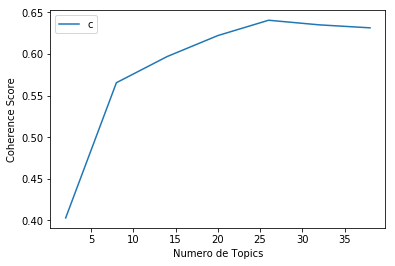

In [220]:
ldamodel_list, coherence_values = compute_coherence_values(dictionary=dictionary_tfidf, corpus=corpus_tfidf, texts=TEXT_DATA_OPTIMO,
                                                           start=2, limit=40, step=6)
%matplotlib inline
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Numero de Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

__Paso 4:__ Se procederá a probar el modelo con el corpus_tfidf y numero de topics óptimo

In [221]:
NUM_TOPICS_OPTIMO = 25
ldamodel = gensim.models.LdaModel(corpus_tfidf, num_topics=NUM_TOPICS_OPTIMO, id2word=dictionary_tfidf, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_tfidf.gensim')

In [222]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(24, '0.014*"aqu" + 0.013*"rubi" + 0.012*"marcial" + 0.010*"univers"')
(19, '0.014*"segu" + 0.013*"tap" + 0.012*"reform" + 0.011*"@omarsac"')
(20, '0.036*"mamani" + 0.017*"@alangarciaperu" + 0.013*"gan" + 0.012*"tras"')
(1, '0.016*"bien" + 0.016*"cobr" + 0.014*"omar" + 0.013*"ques"')
(7, '0.014*"period" + 0.014*"tres" + 0.014*"tem" + 0.011*"arrib"')
(14, '0.030*"convers" + 0.020*"lav" + 0.015*"equip" + 0.012*"toc"')
(8, '0.025*"arranc" + 0.021*"10:15" + 0.018*"richard" + 0.014*"diciembr"')
(13, '0.021*"@heduardo50" + 0.017*"heduardicidi" + 0.015*"dij" + 0.010*"pen"')
(9, '0.022*"@martinvizcarrac" + 0.018*"met" + 0.012*"@poder_judicial" + 0.011*"anunci"')
(6, '0.012*"comun" + 0.011*"palaci" + 0.011*"lueg" + 0.011*"mar"')
(5, '0.019*"alan" + 0.014*"hech" + 0.013*"pens" + 0.012*"gent"')
(11, '0.033*"pucp" + 0.016*"activ" + 0.015*"estudi" + 0.013*"men"')
(22, '0.019*"sig" + 0.019*"jef" + 0.017*"@peru21notici" + 0.014*"fals"')
(0, '0.014*"@litolob" + 0.012*"qued" + 0.011*"acus" + 0.010*"her

In [223]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=TEXT_DATA_OPTIMO, dictionary=dictionary_tfidf, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6083886803897072


In [224]:
dictionary_tfidf = gensim.corpora.Dictionary.load('dictionary_tfidf.gensim')
corpus_tfidf = pickle.load(open('corpus_tfidf.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_tfidf.gensim')

lda_display = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary_tfidf, sort_topics=False)
pyLDAvis.display(lda_display)